# EDA on prepped data

In [14]:
# set up path to import my python scripts
import sys
import os
src_path = os.path.abspath(os.path.join('..'))
if src_path not in sys.path:
    sys.path.append(src_path+"/src")
    
%load_ext autoreload
%autoreload 2
import prep_data as prep
import main
import myplots

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Establish required info
# link for data files
base_url = "http://kopiko.ifa.hawaii.edu/weather/archivedata/"

# Define reasonable ranges for each column
acceptable_ranges = {
    'temperature': (-273,40),
    'humidity': (0,100),
    'wind_speed': (0,100),
    'visibility': (0,100000),
    'precipitation': (0,100),
    'dewpoint': (-273,40)
    }
# Define the thresholds for ('Green', 'Red') weather - plan to use config file in future
thresholds = {
        'humidity': (75,85),
        'wind_sust': (10,12),
        'wind_gust': (15,15),
        'visibility': (50000,40000),
        'precipitation': (0,0),
        'dewpoint_delta': (6,3)
        }

In [30]:
# Run from jupyter
data_path_for_notebook = '../data/status_hours/run_0000'
# get list of all data file urls
csv_urls = prep.get_csv_file_links(base_url)

In [3]:
# prep all data if not done already
for url in csv_urls:
    year = url.split('/')[-1].split('.')[0]
    # for now skip 2020-2021 becuase I know the formating is not correct. Skip 1993 because it is empty.
    if year in ['1993','2020','2021']:
        continue
    # if prepped data file already exist for that year skip it
    elif main.prepped_data_exists(year,base_path=data_path_for_notebook):
        continue
    else:
        main.get_and_prep_data(url,acceptable_ranges,thresholds,save_results=True,save_path=data_path_for_notebook)

2003 data read, processing now.


NameError: name 'results_run_dir' is not defined

In [31]:
# combine the daily status hours for all years into one df
df = prep.combine_status_hour_dfs(base_path=data_path_for_notebook)
df = prep.normalize_daily_hours_to_24(df)
prep.add_month_year_columns(df)



In [ ]:
df

In [86]:

df.describe()

Green       Yellow          Red         year
count  8965.000000  8965.000000  8965.000000  8965.000000
mean     12.864422     2.840526     8.295052  2006.789069
std       8.864368     2.882648     8.682301     7.277076
min       0.000000     0.000000     0.000000  1994.000000
25%       3.372034     0.424779     0.360042  2000.000000
50%      14.502931     2.289162     4.532742  2007.000000
75%      21.048263     4.027972    16.607295  2013.000000
max      24.000000    24.000000    24.000000  2019.000000

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8965 entries, 1994-09-11 to 2019-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Green   8965 non-null   float64 
 1   Yellow  8965 non-null   float64 
 2   Red     8965 non-null   float64 
 3   month   8965 non-null   category
 4   year    8965 non-null   int64   
dtypes: category(1), float64(3), int64(1)
memory usage: 359.3 KB


<br>

-------------------------------------


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format='retina'
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams.update({'font.size':16,'axes.labelcolor': '#000000','ytick.color': '#000000','xtick.color': '#000000'})

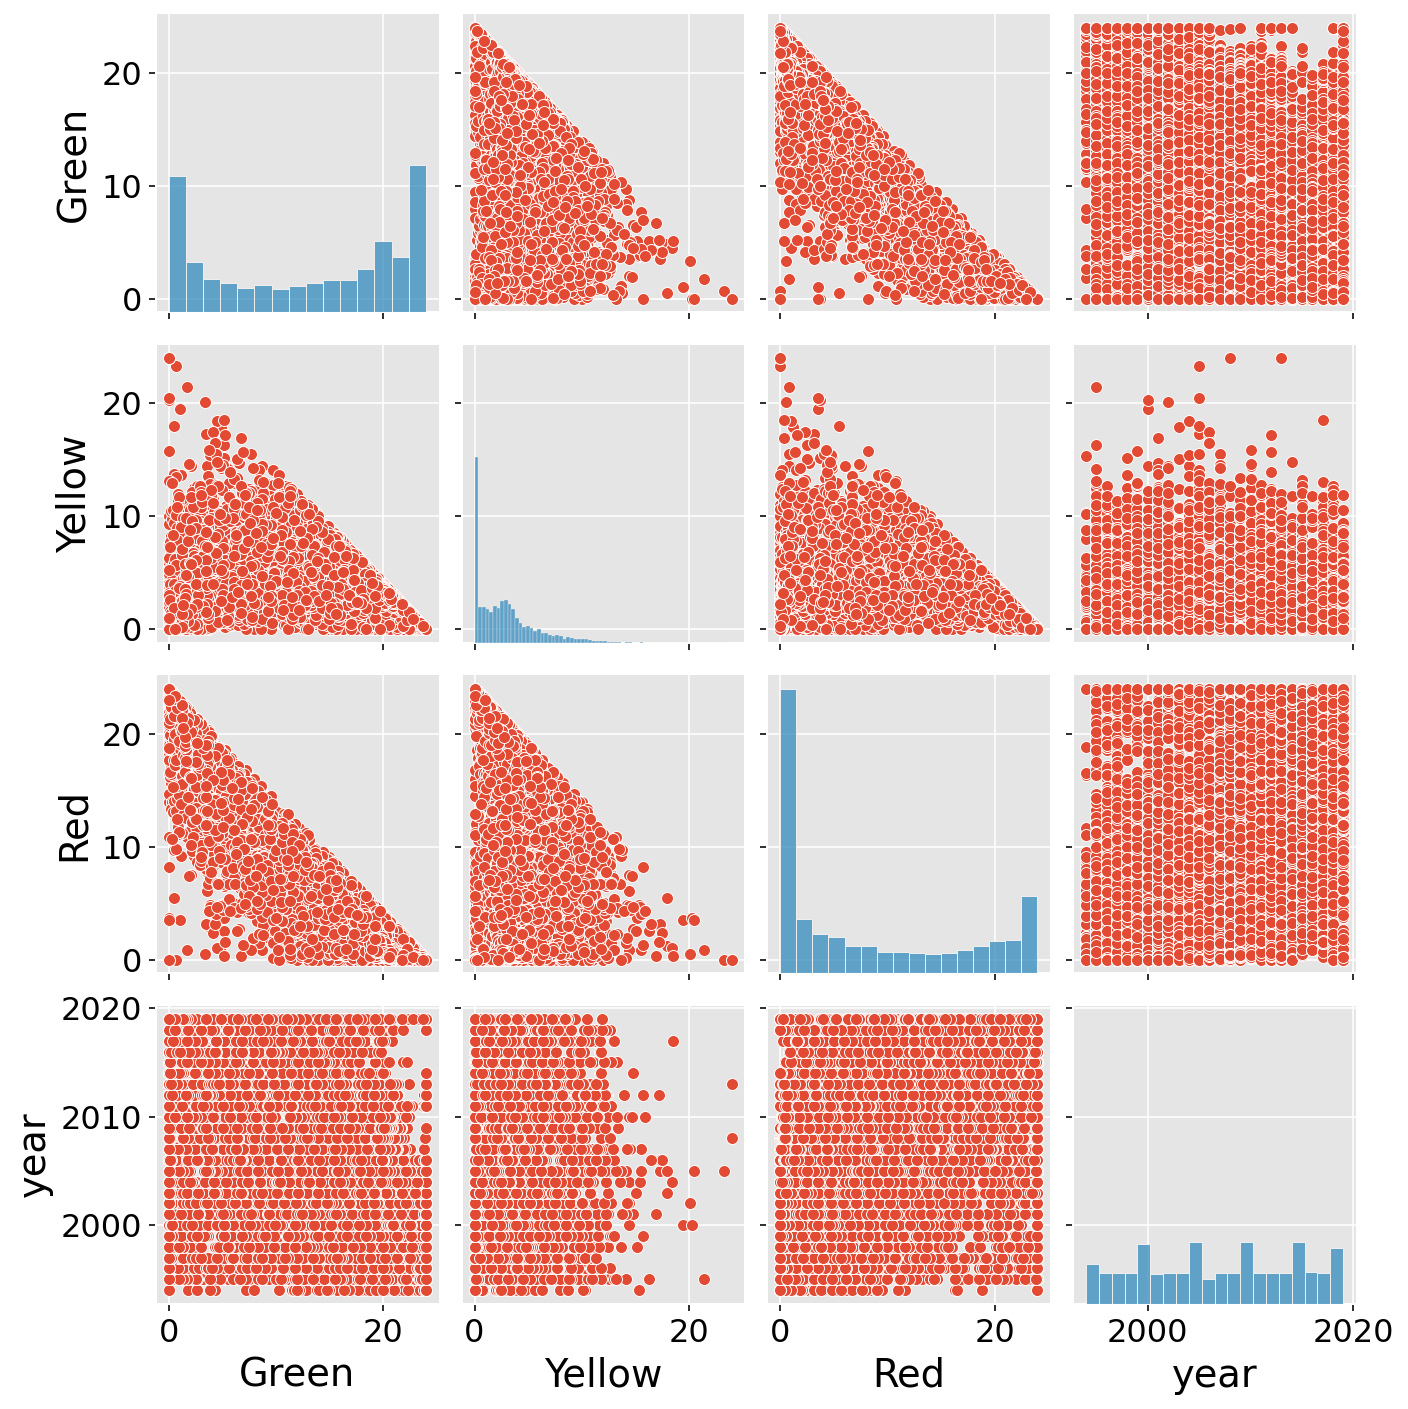

In [89]:
sns.pairplot(df)

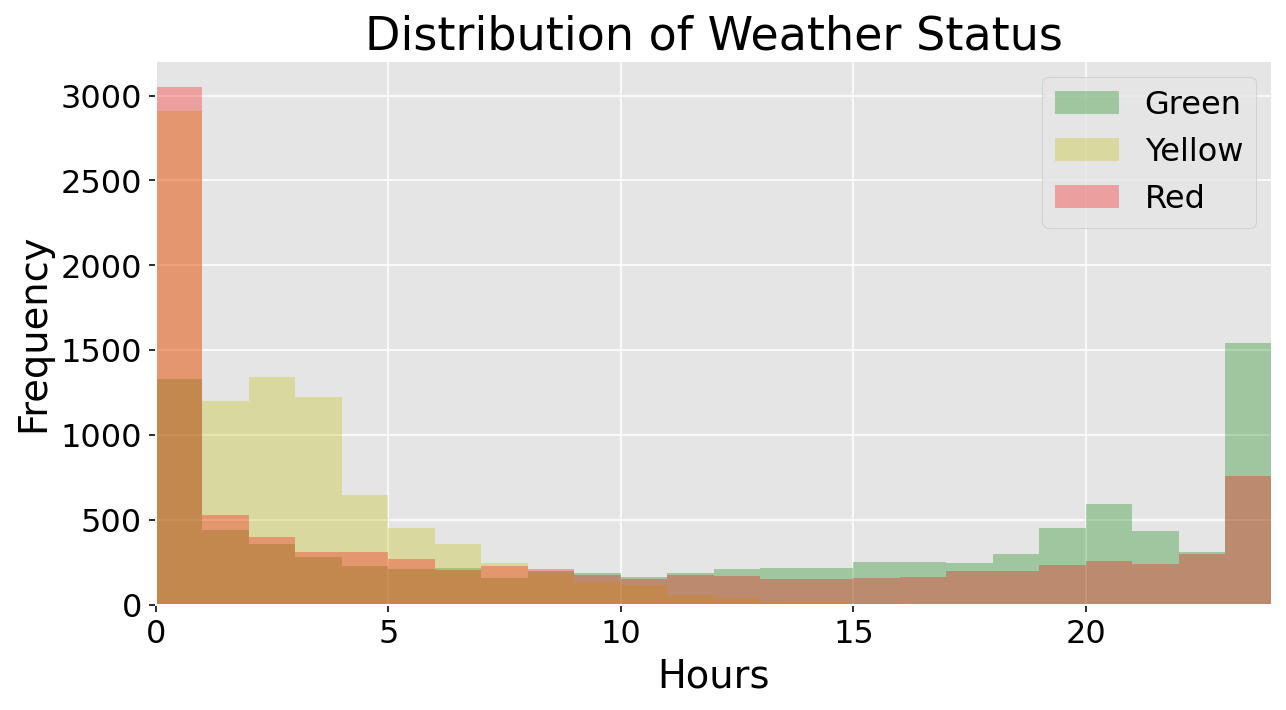

In [72]:
fig,ax = plt.subplots(figsize=(10,5))
df.Green.hist(bins=24,ax=ax,alpha=0.3,color='g',label='Green')
df.Yellow.hist(bins=24,ax=ax,alpha=0.3,color='y',label='Yellow')
df.Red.hist(bins=24,ax=ax,alpha=0.3,color='r',label='Red')
ax.set_xlim(0,24)
ax.set_xlabel('Hours')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Weather Status')
ax.legend();

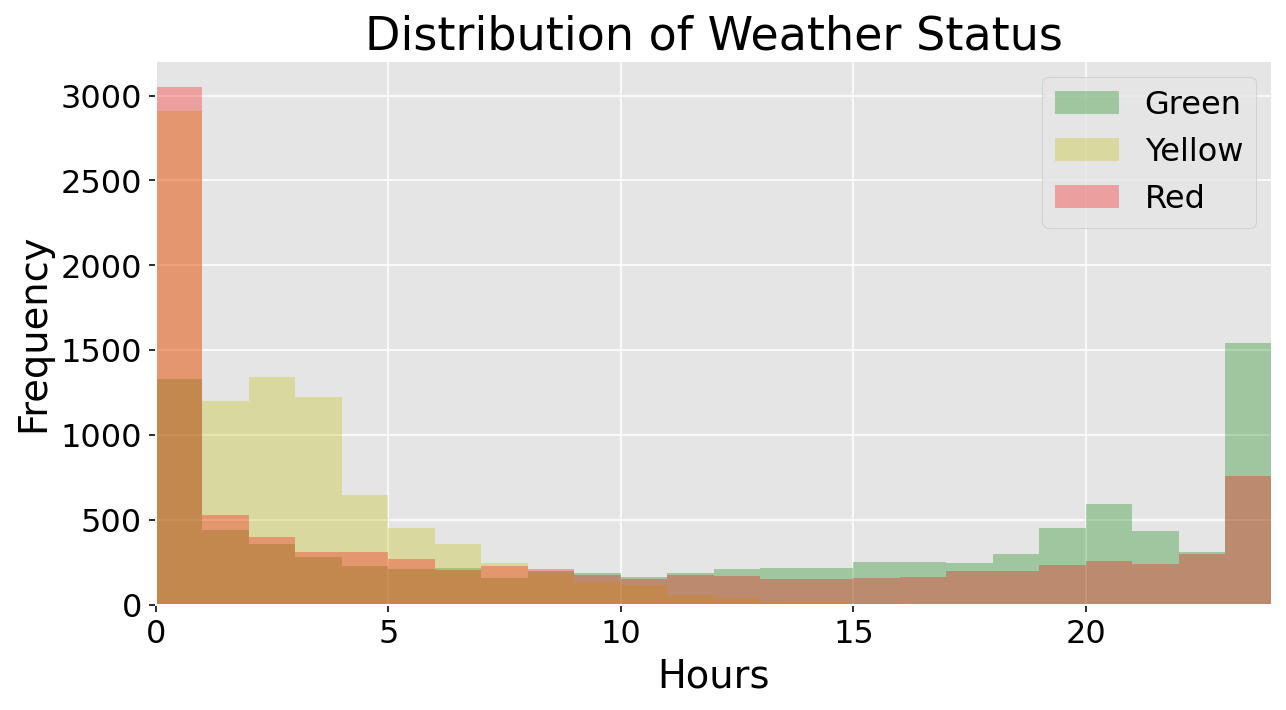

In [176]:
myplots.plot_combined_distribution_wx(df,statuses='All')

In [171]:
statuses = 'Green'
type(statuses) == str

True

In [174]:
statuses.split()

['Green']

In [168]:
# plt.rcParams

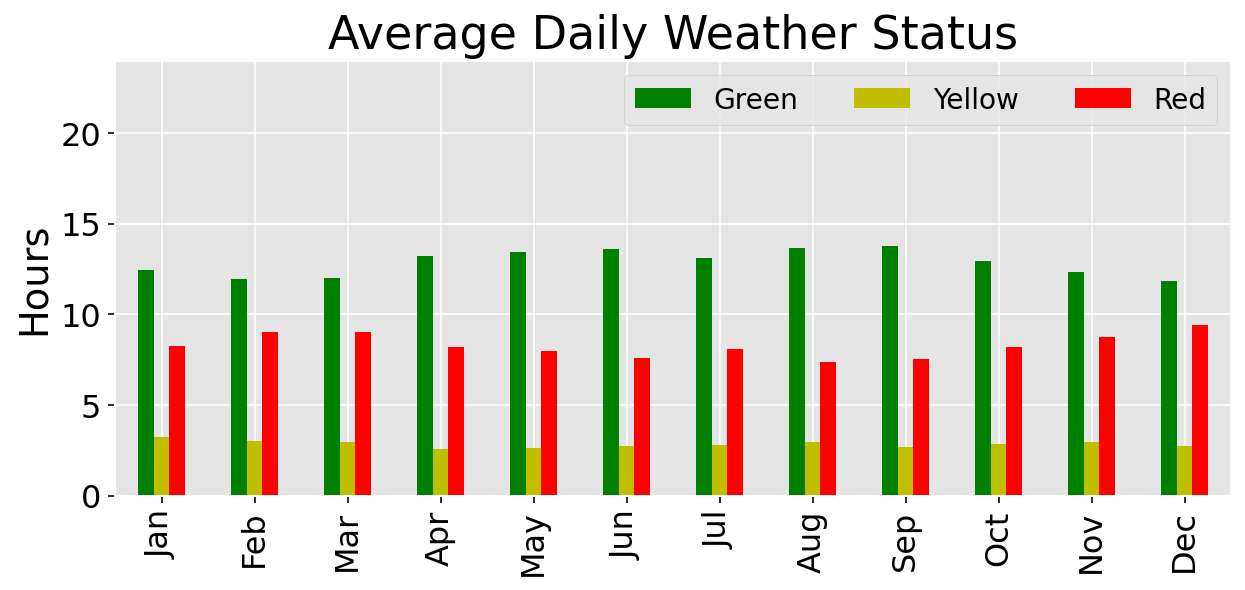

In [33]:
# Take a look at the mean for each month
fig,ax = plt.subplots(figsize=(10,4))
df.drop('year',axis=1).groupby(['month']).mean().plot.bar(color=['g','y','r'],ax=ax)
ax.set_ylim(0,24)
ax.set_xlabel(None)
ax.set_ylabel('Hours')
ax.set_title('Average Daily Weather Status')
ax.legend(ncol=3,fontsize=14)


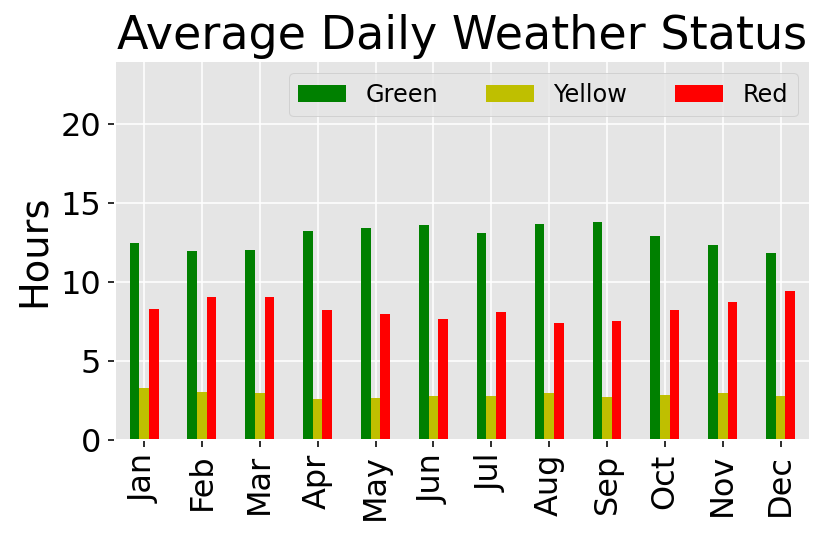

In [34]:
myplots.avg_daily_hours(df,'..')

In [155]:
df.groupby('year')['Green'].mean()

year
1994    20.288540
1995    18.455295
1996    18.109922
1997    16.545125
1998    17.807258
1999    16.766874
2000    16.178436
2001    16.349764
2002    17.295230
2003    17.134541
2004    14.959317
2005    15.800460
2006    15.957672
2007    11.883182
2008    14.946891
2009    14.941688
2010    14.730256
2011    15.378253
2012    10.885162
2013     5.329061
2014     5.530963
2015     4.261621
2016     3.553494
2017     4.779505
2018     4.938846
2019     6.576513
Name: Green, dtype: float64

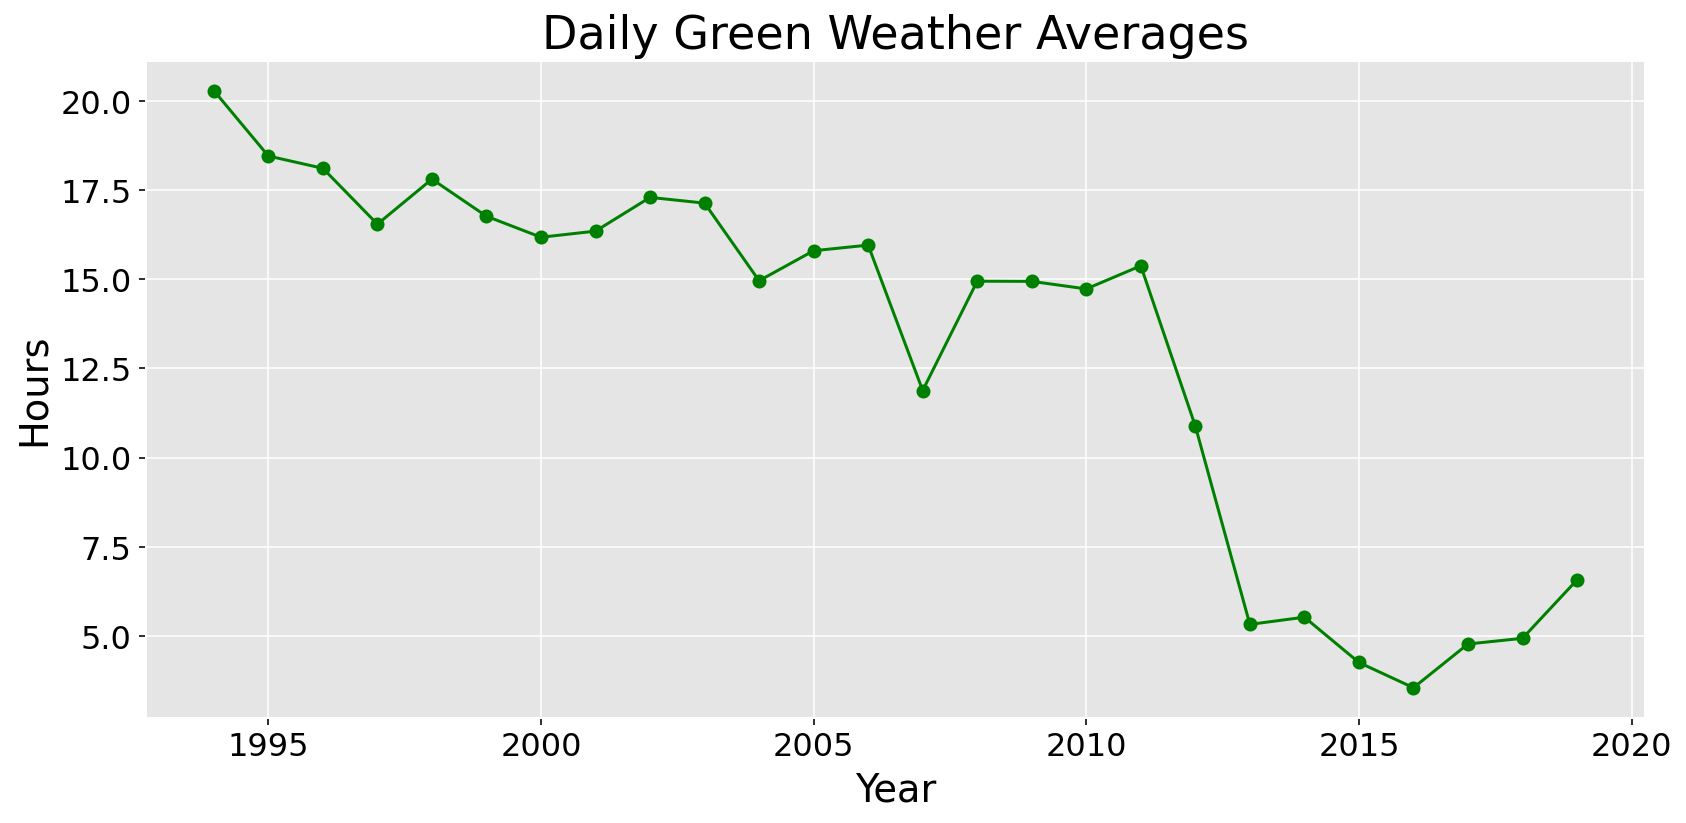

In [150]:
fig,ax = plt.subplots(figsize=(12,6))
ax.set_prop_cycle('color',plt.cm.Paired(range(12)))


df.groupby('year')['Green'].mean().plot(ax=ax,marker='o',color='g')

ax.set_xlabel('Year')
ax.set_ylabel('Hours')
ax.set_title('Daily Green Weather Averages')
fig.tight_layout()

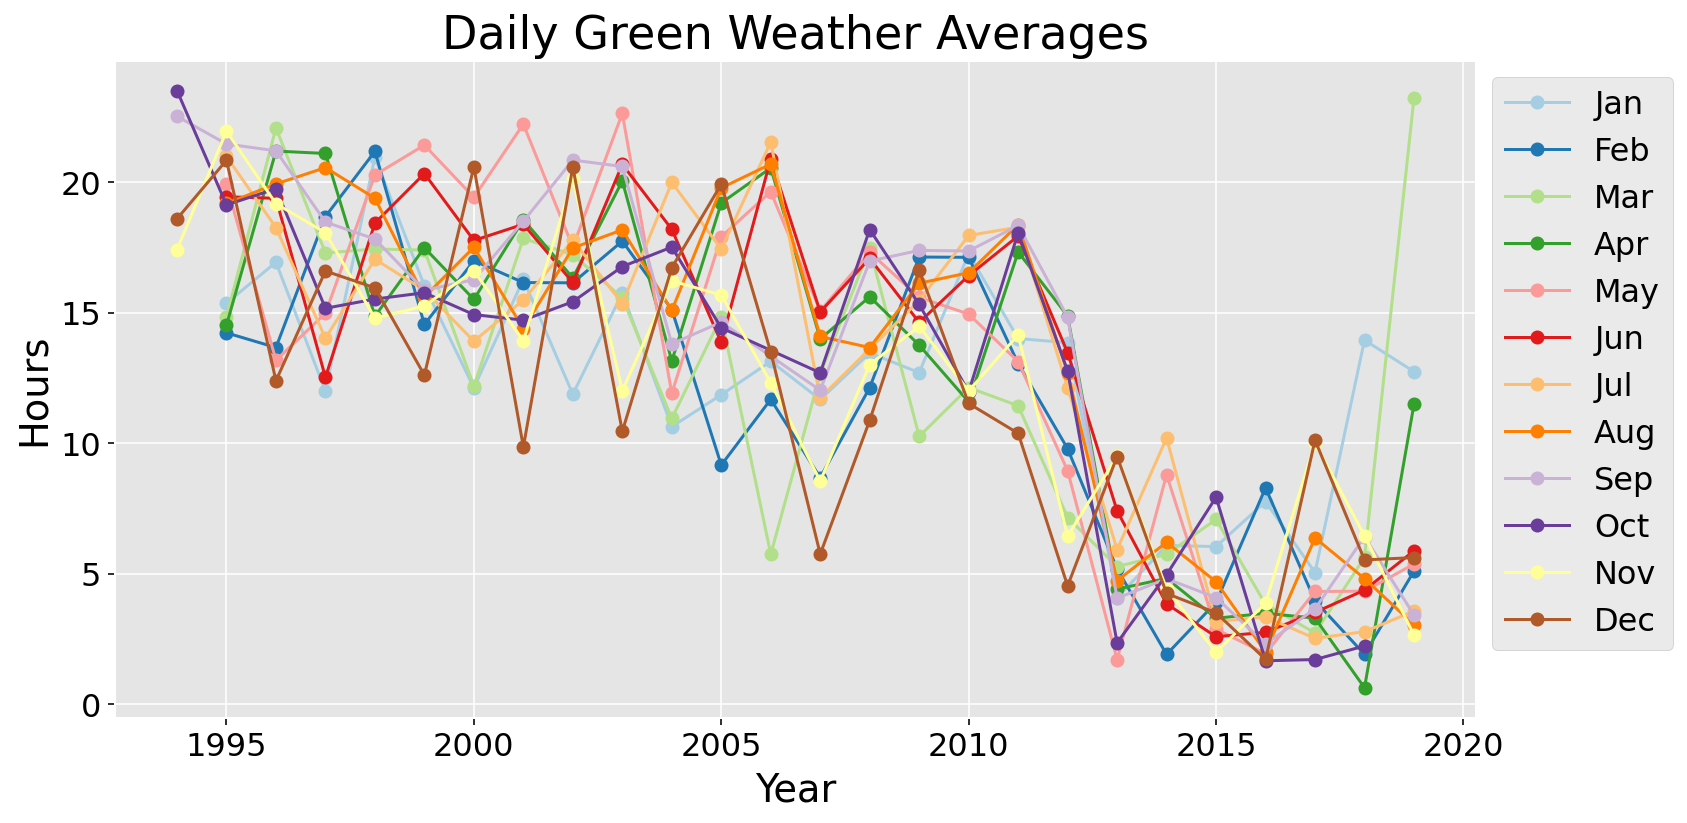

In [67]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]


fig,ax = plt.subplots(figsize=(12,6))
ax.set_prop_cycle('color',plt.cm.Paired(range(12)))

for month in months:
    df[df['month']==month].groupby('year')['Green'].mean().plot(ax=ax,label=month,marker='o')

ax.set_xlabel('Year')
ax.set_ylabel('Hours')
ax.set_title('Daily Green Weather Averages')
ax.legend(bbox_to_anchor=(1,1))
fig.tight_layout()

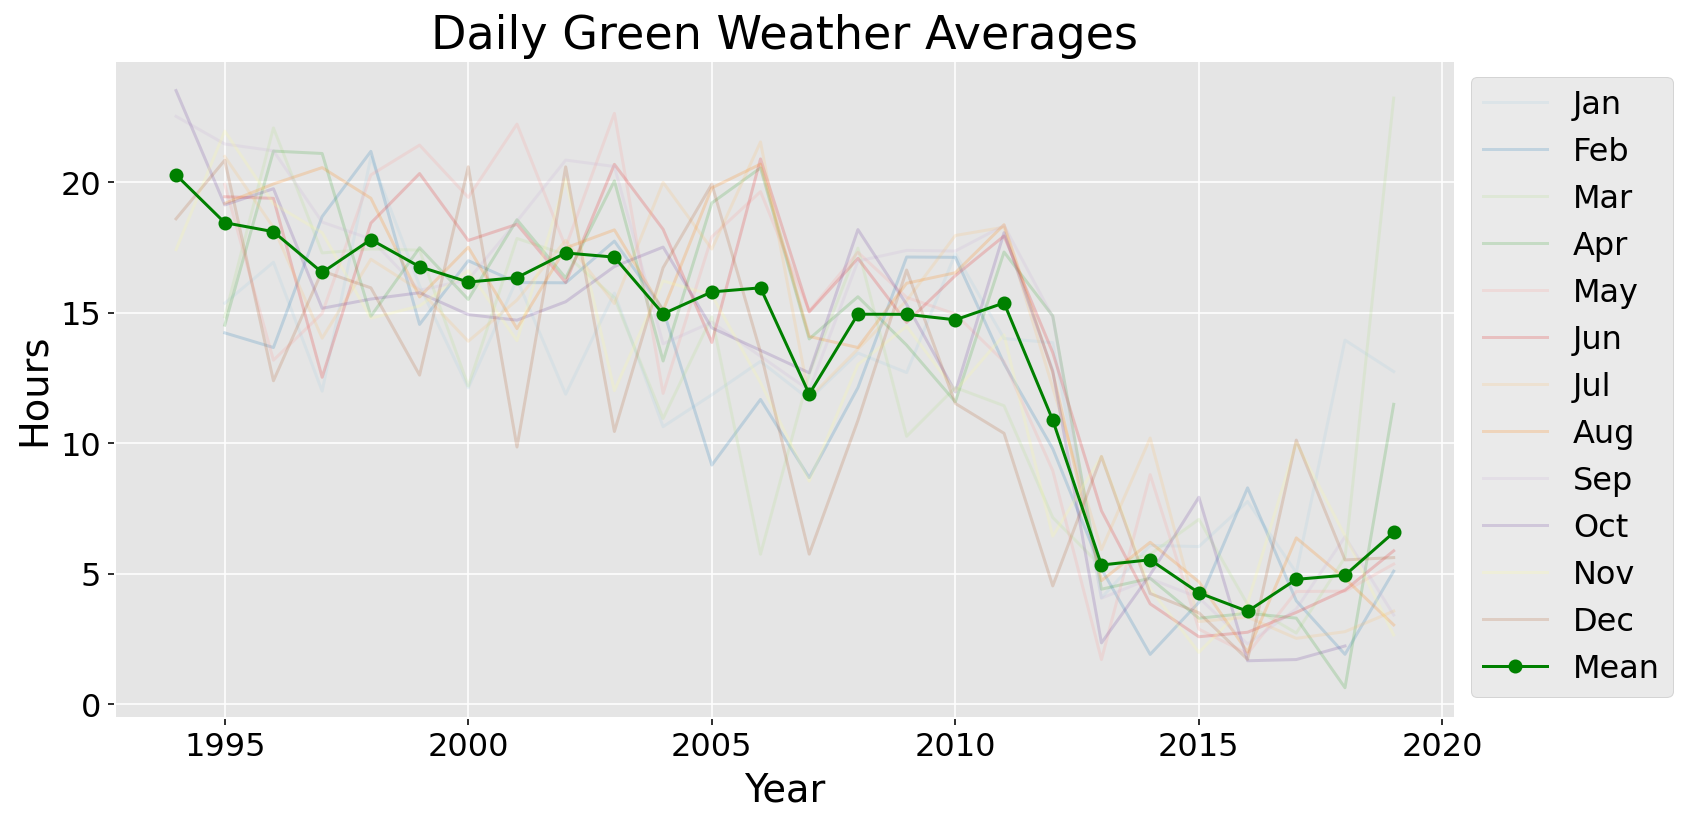

In [163]:
myplots.daily_green_weather_over_time(df,save_path='..',marker='o',show_comb_avg=True)

In [94]:
for month in sorted(df.month.unique()):
    print(f'{month}: {len(df[df.month==month])}')

Apr: 745
Aug: 743
Dec: 780
Feb: 683
Jan: 765
Jul: 773
Jun: 747
Mar: 747
May: 773
Nov: 756
Oct: 729
Sep: 724


In [122]:
a = 12
test = 3 if a > 4 else 2 if a == 4 else a
test2 = -(a//-test)
print(test2,test)

4 3


In [127]:
11//-3

-4

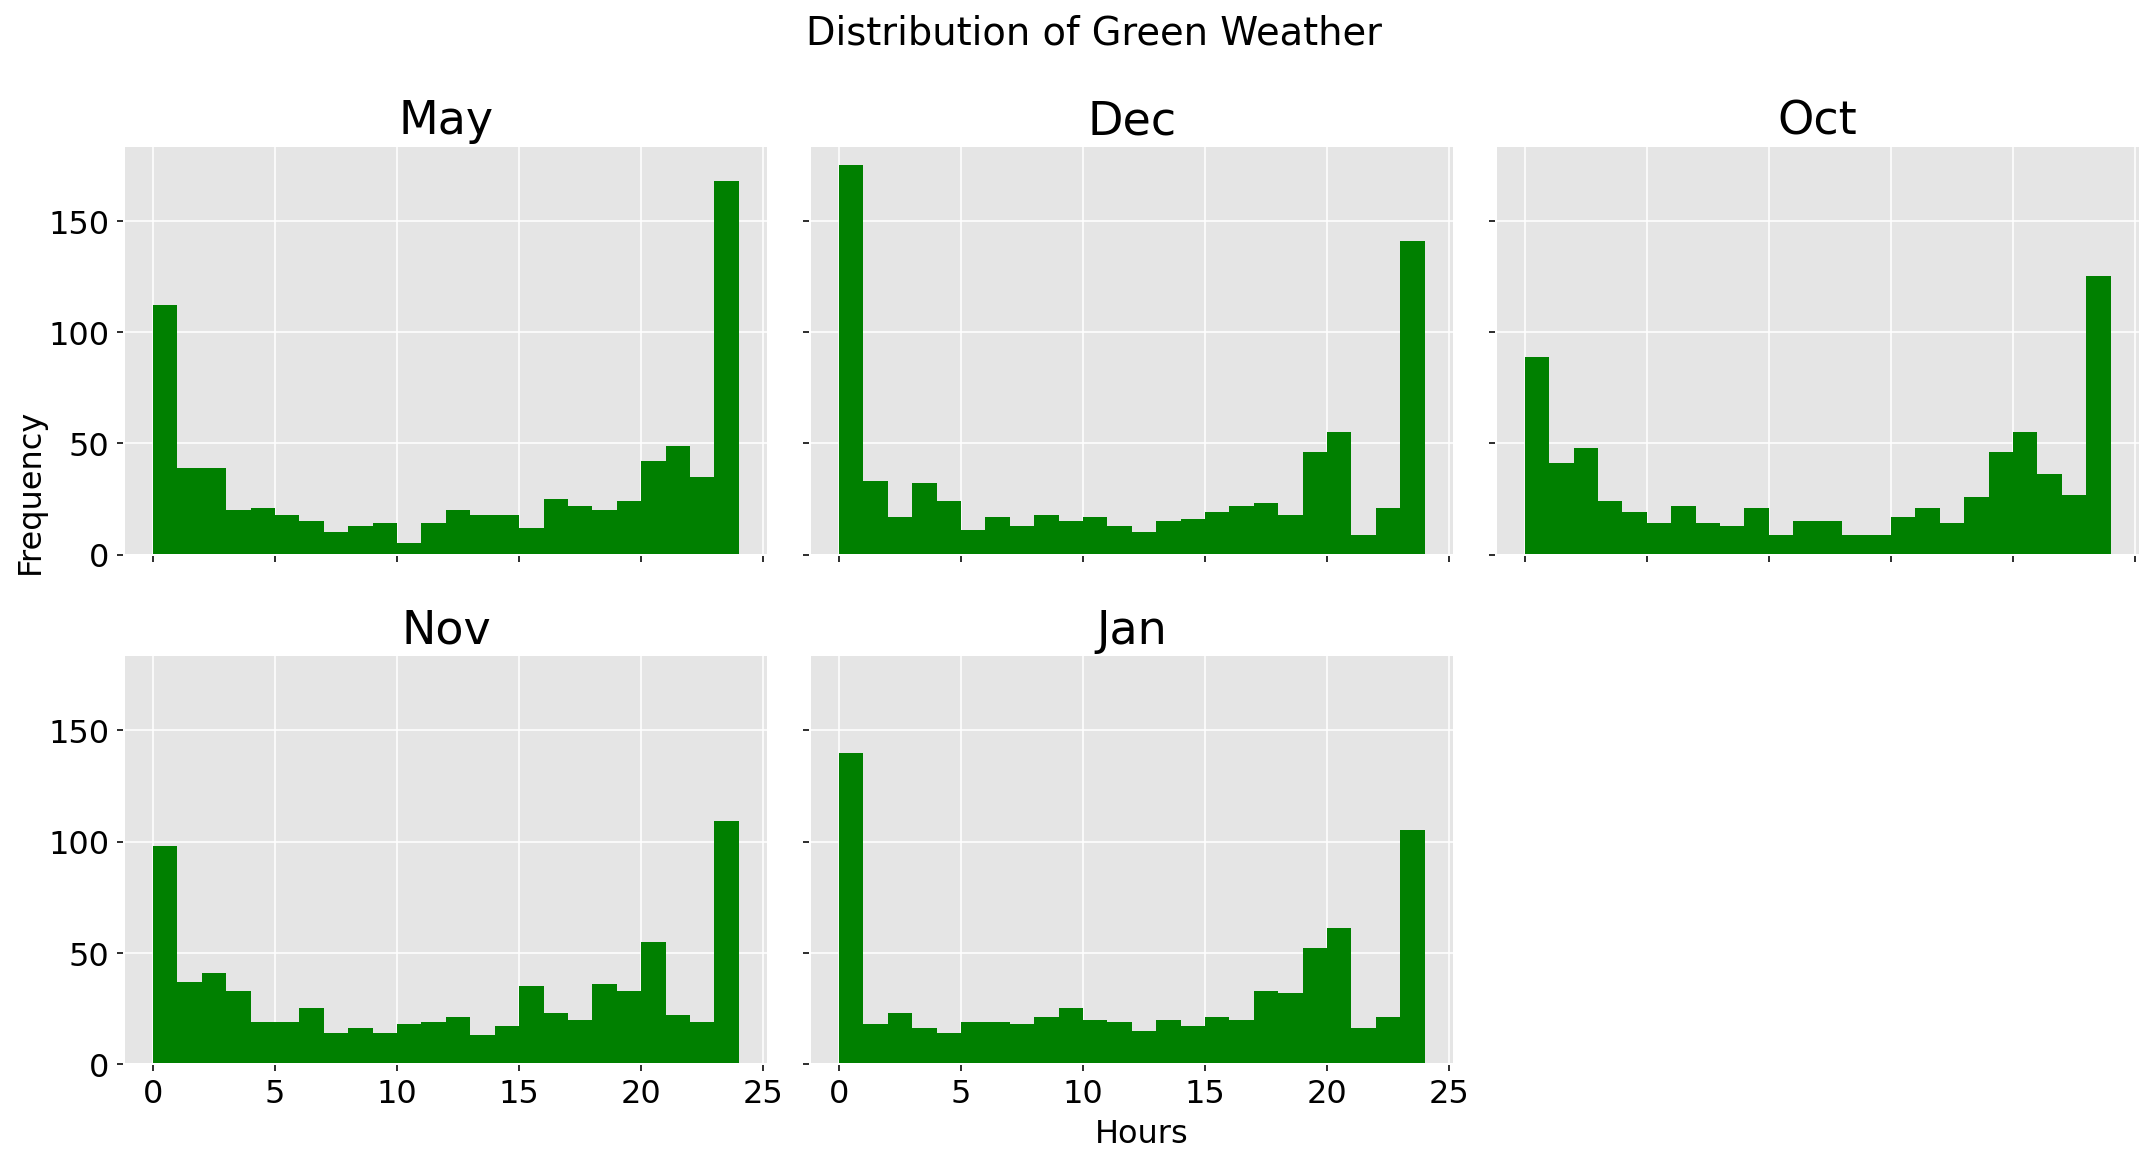

In [145]:
months = ['May','Dec','Oct','Nov','Jan']

num_ax = len(months)
num_cols = 3 if num_ax > 4 else 2 if num_ax == 4 else num_ax
num_rows = -(num_ax // -num_cols) 

fig,axs = plt.subplots(num_rows,num_cols,figsize=(num_cols*5,num_rows*4),sharex=True,sharey=True)
for i,ax in enumerate(axs.flatten()):
    if i >= num_ax:
        ax.axes.remove()
        continue
    df[df['month']==months[i]].hist('Green',ax=ax,color='g',bins=24)
    ax.set_title(months[i])
fig.suptitle('Distribution of Green Weather')
fig.text(.5,0,'Hours')
fig.text(0,0.5,'Frequency',rotation='vertical')
fig.tight_layout();


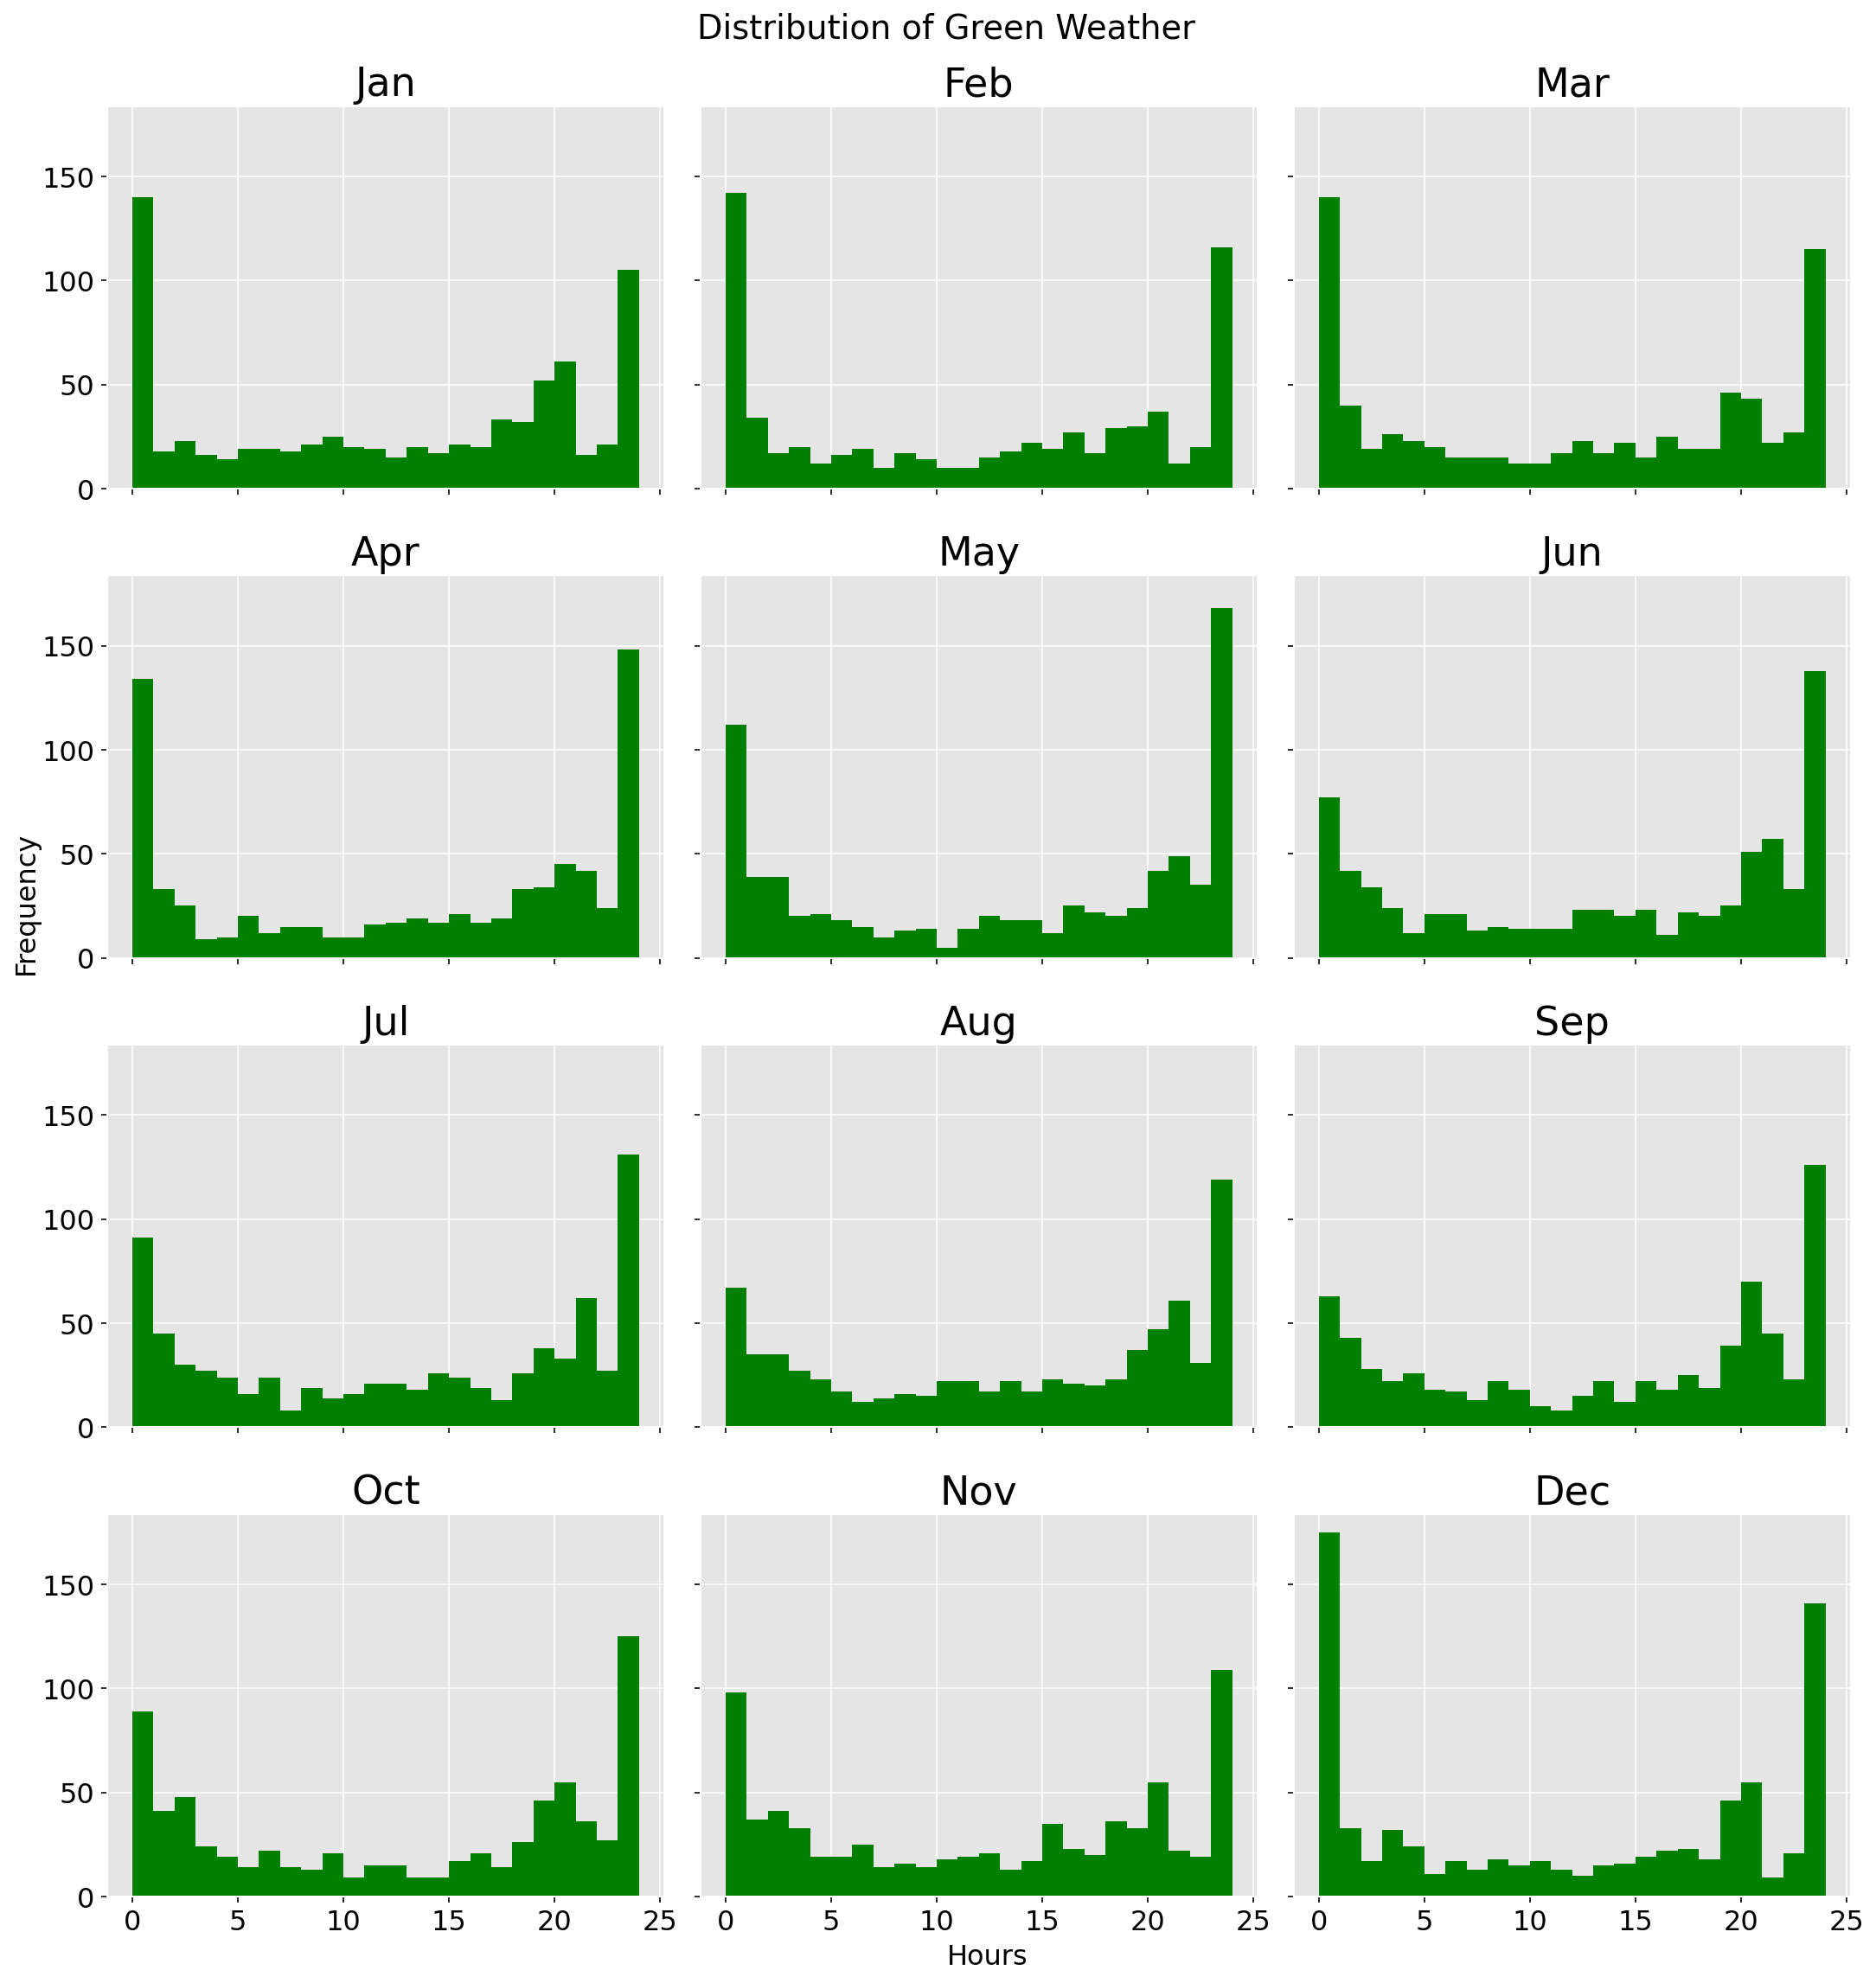

In [166]:
myplots.plot_distribution_green_wx(df,months='All')

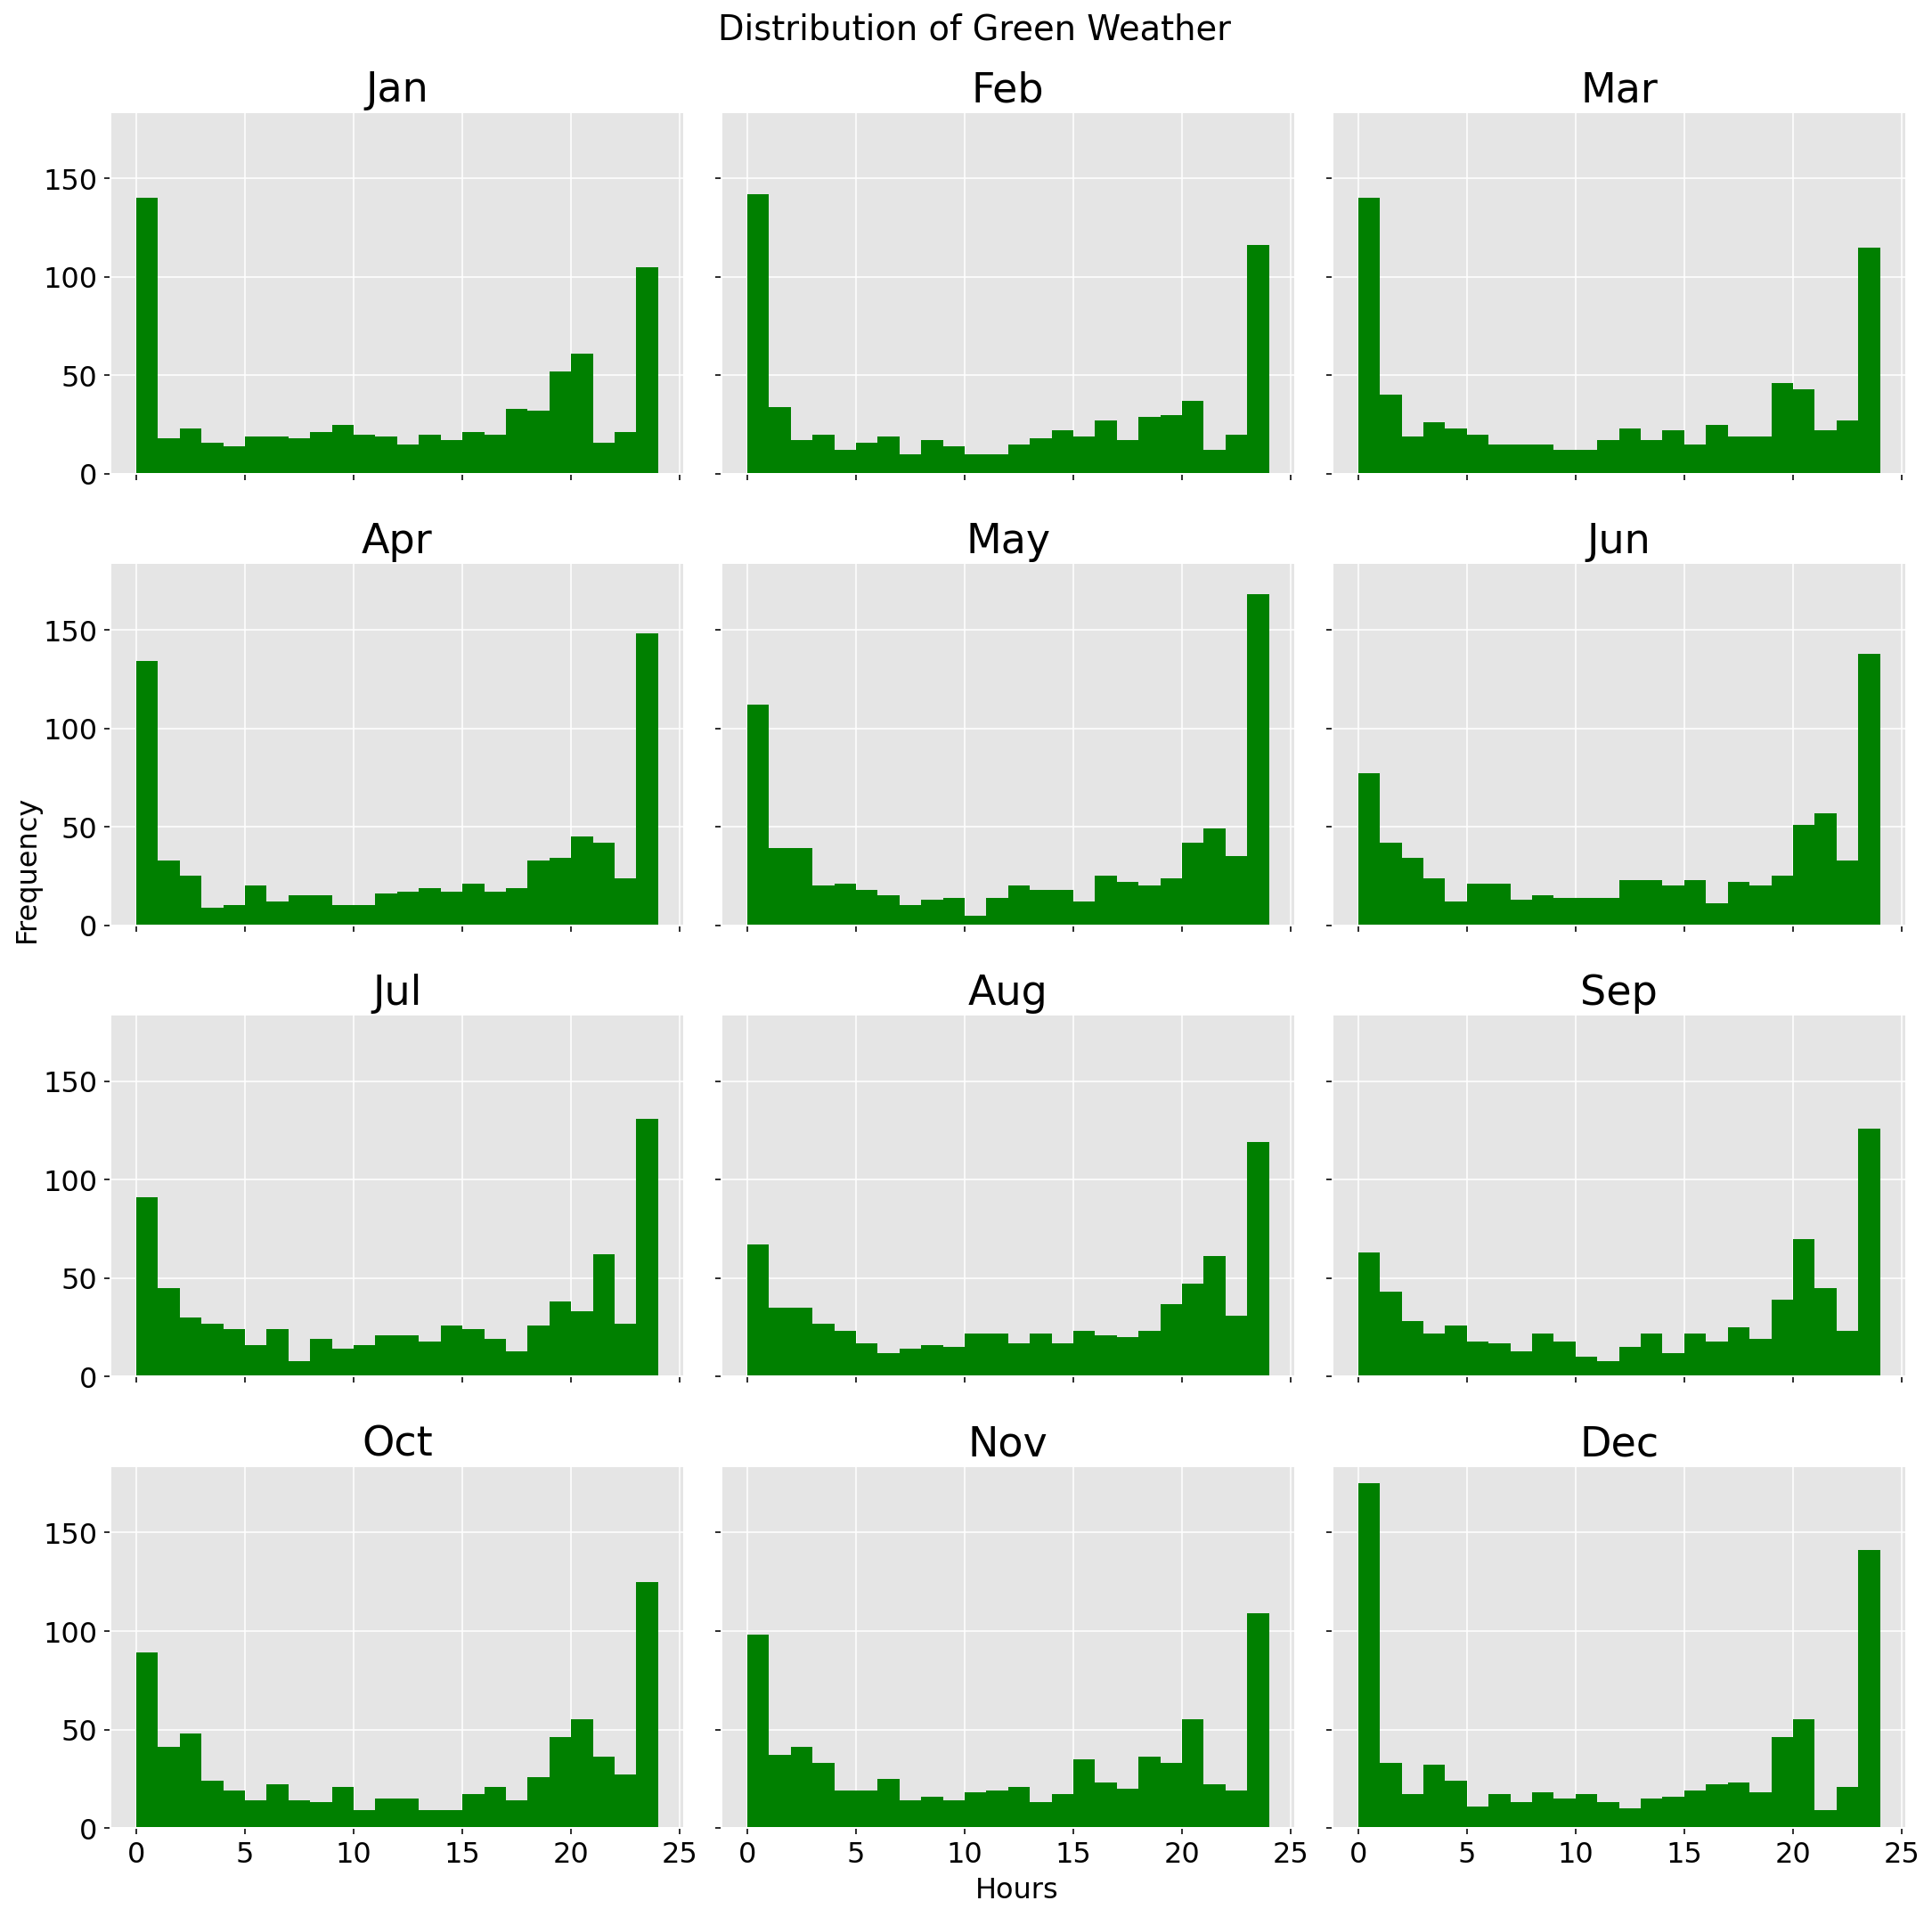

In [76]:
fig,axs = plt.subplots(4,3,figsize=(15,15),sharex=True,sharey=True)
for i,ax in enumerate(axs.flatten()):
    df[df['month']==months[i]].hist('Green',ax=ax,color='g',bins=24)
    ax.set_title(months[i])
fig.suptitle('Distribution of Green Weather')
fig.text(.5,0,'Hours')
fig.text(0,0.5,'Frequency',rotation='vertical')
fig.tight_layout();


All the distributions look similar, and definetely not normal. Plan to use Mann-Whitney U test.

array([[<AxesSubplot:title={'center':'Green'}>]], dtype=object)

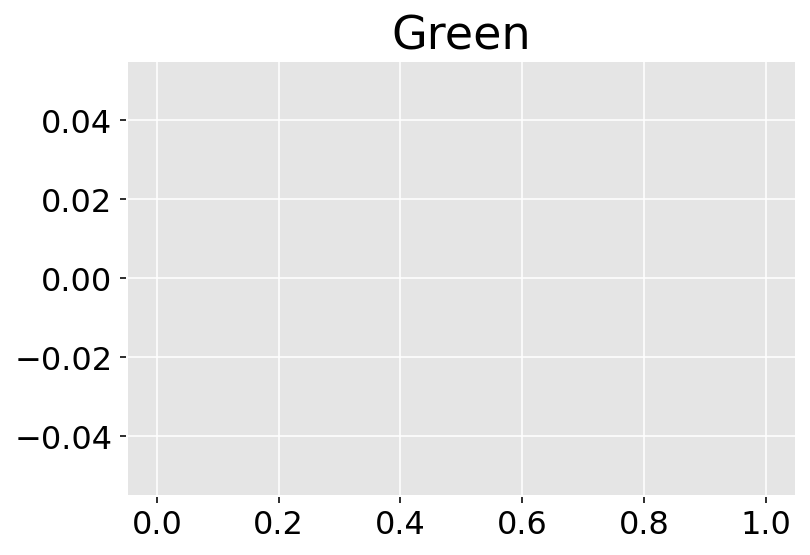

In [75]:
df[(df['month']=='Jun') & (df['year']==str(yrs[1]))].hist('Green',color='g',bins=24)

In [74]:
yrs = list(range(1995,2020,1))

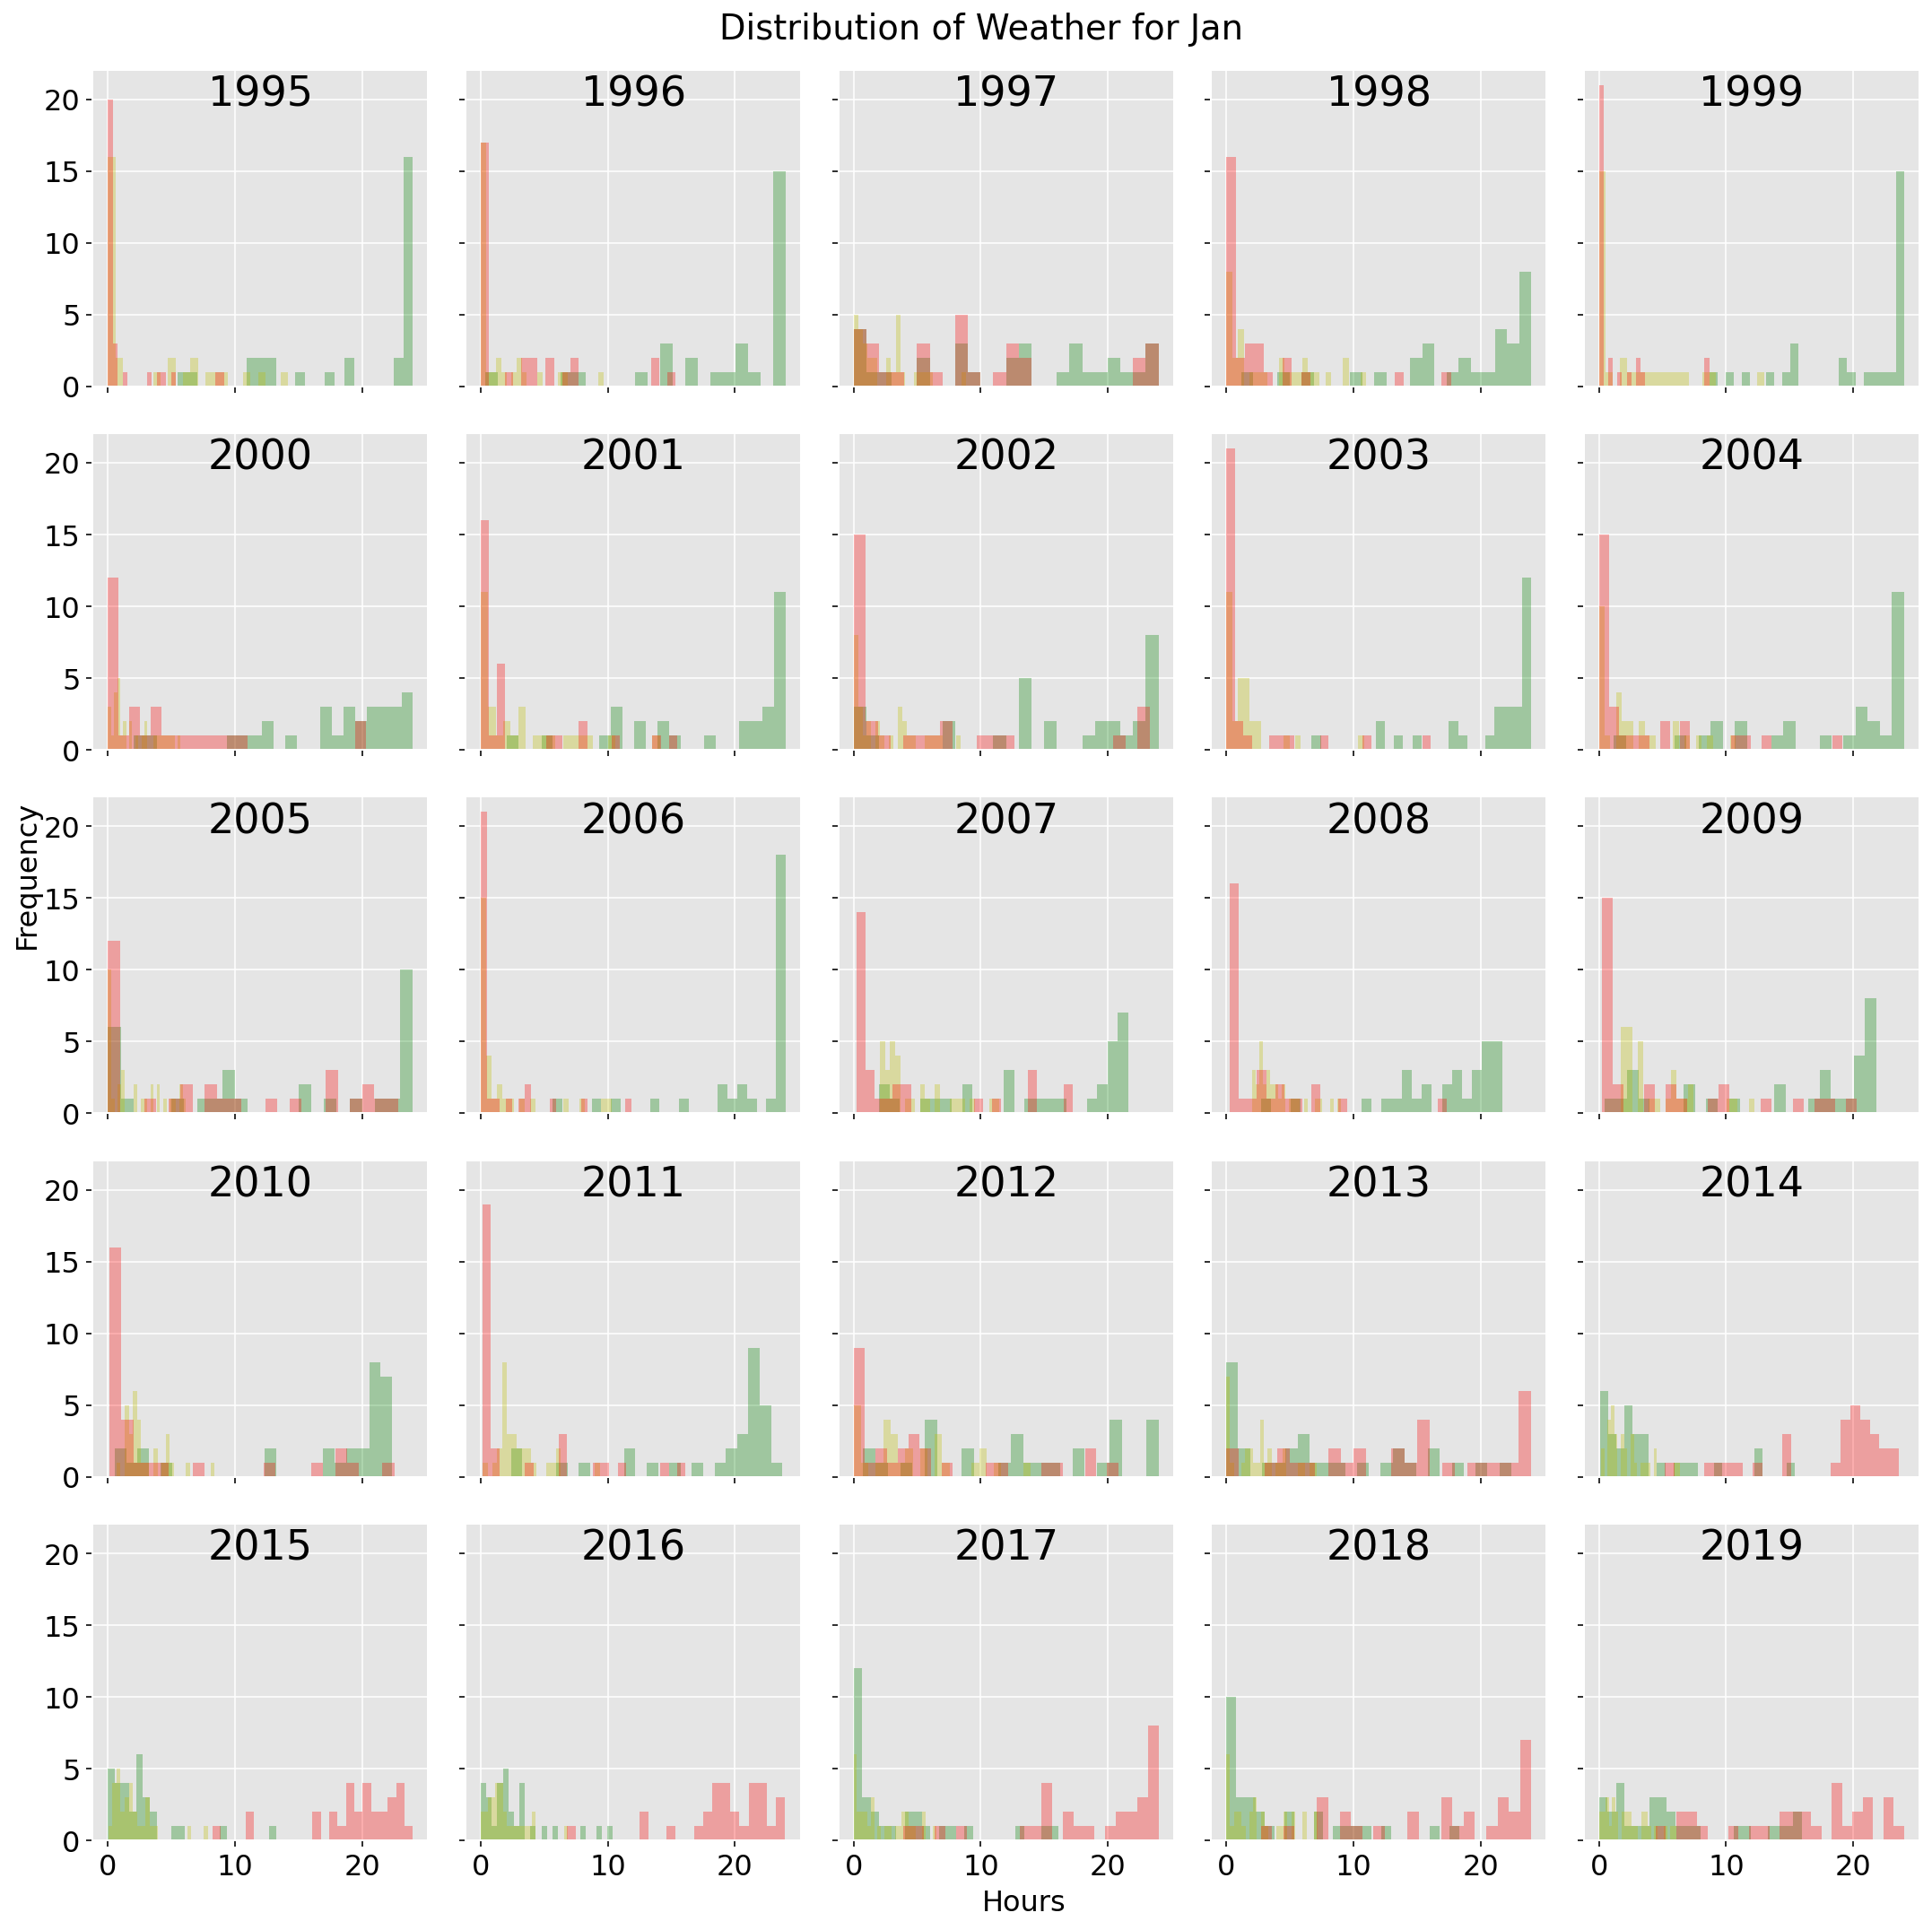

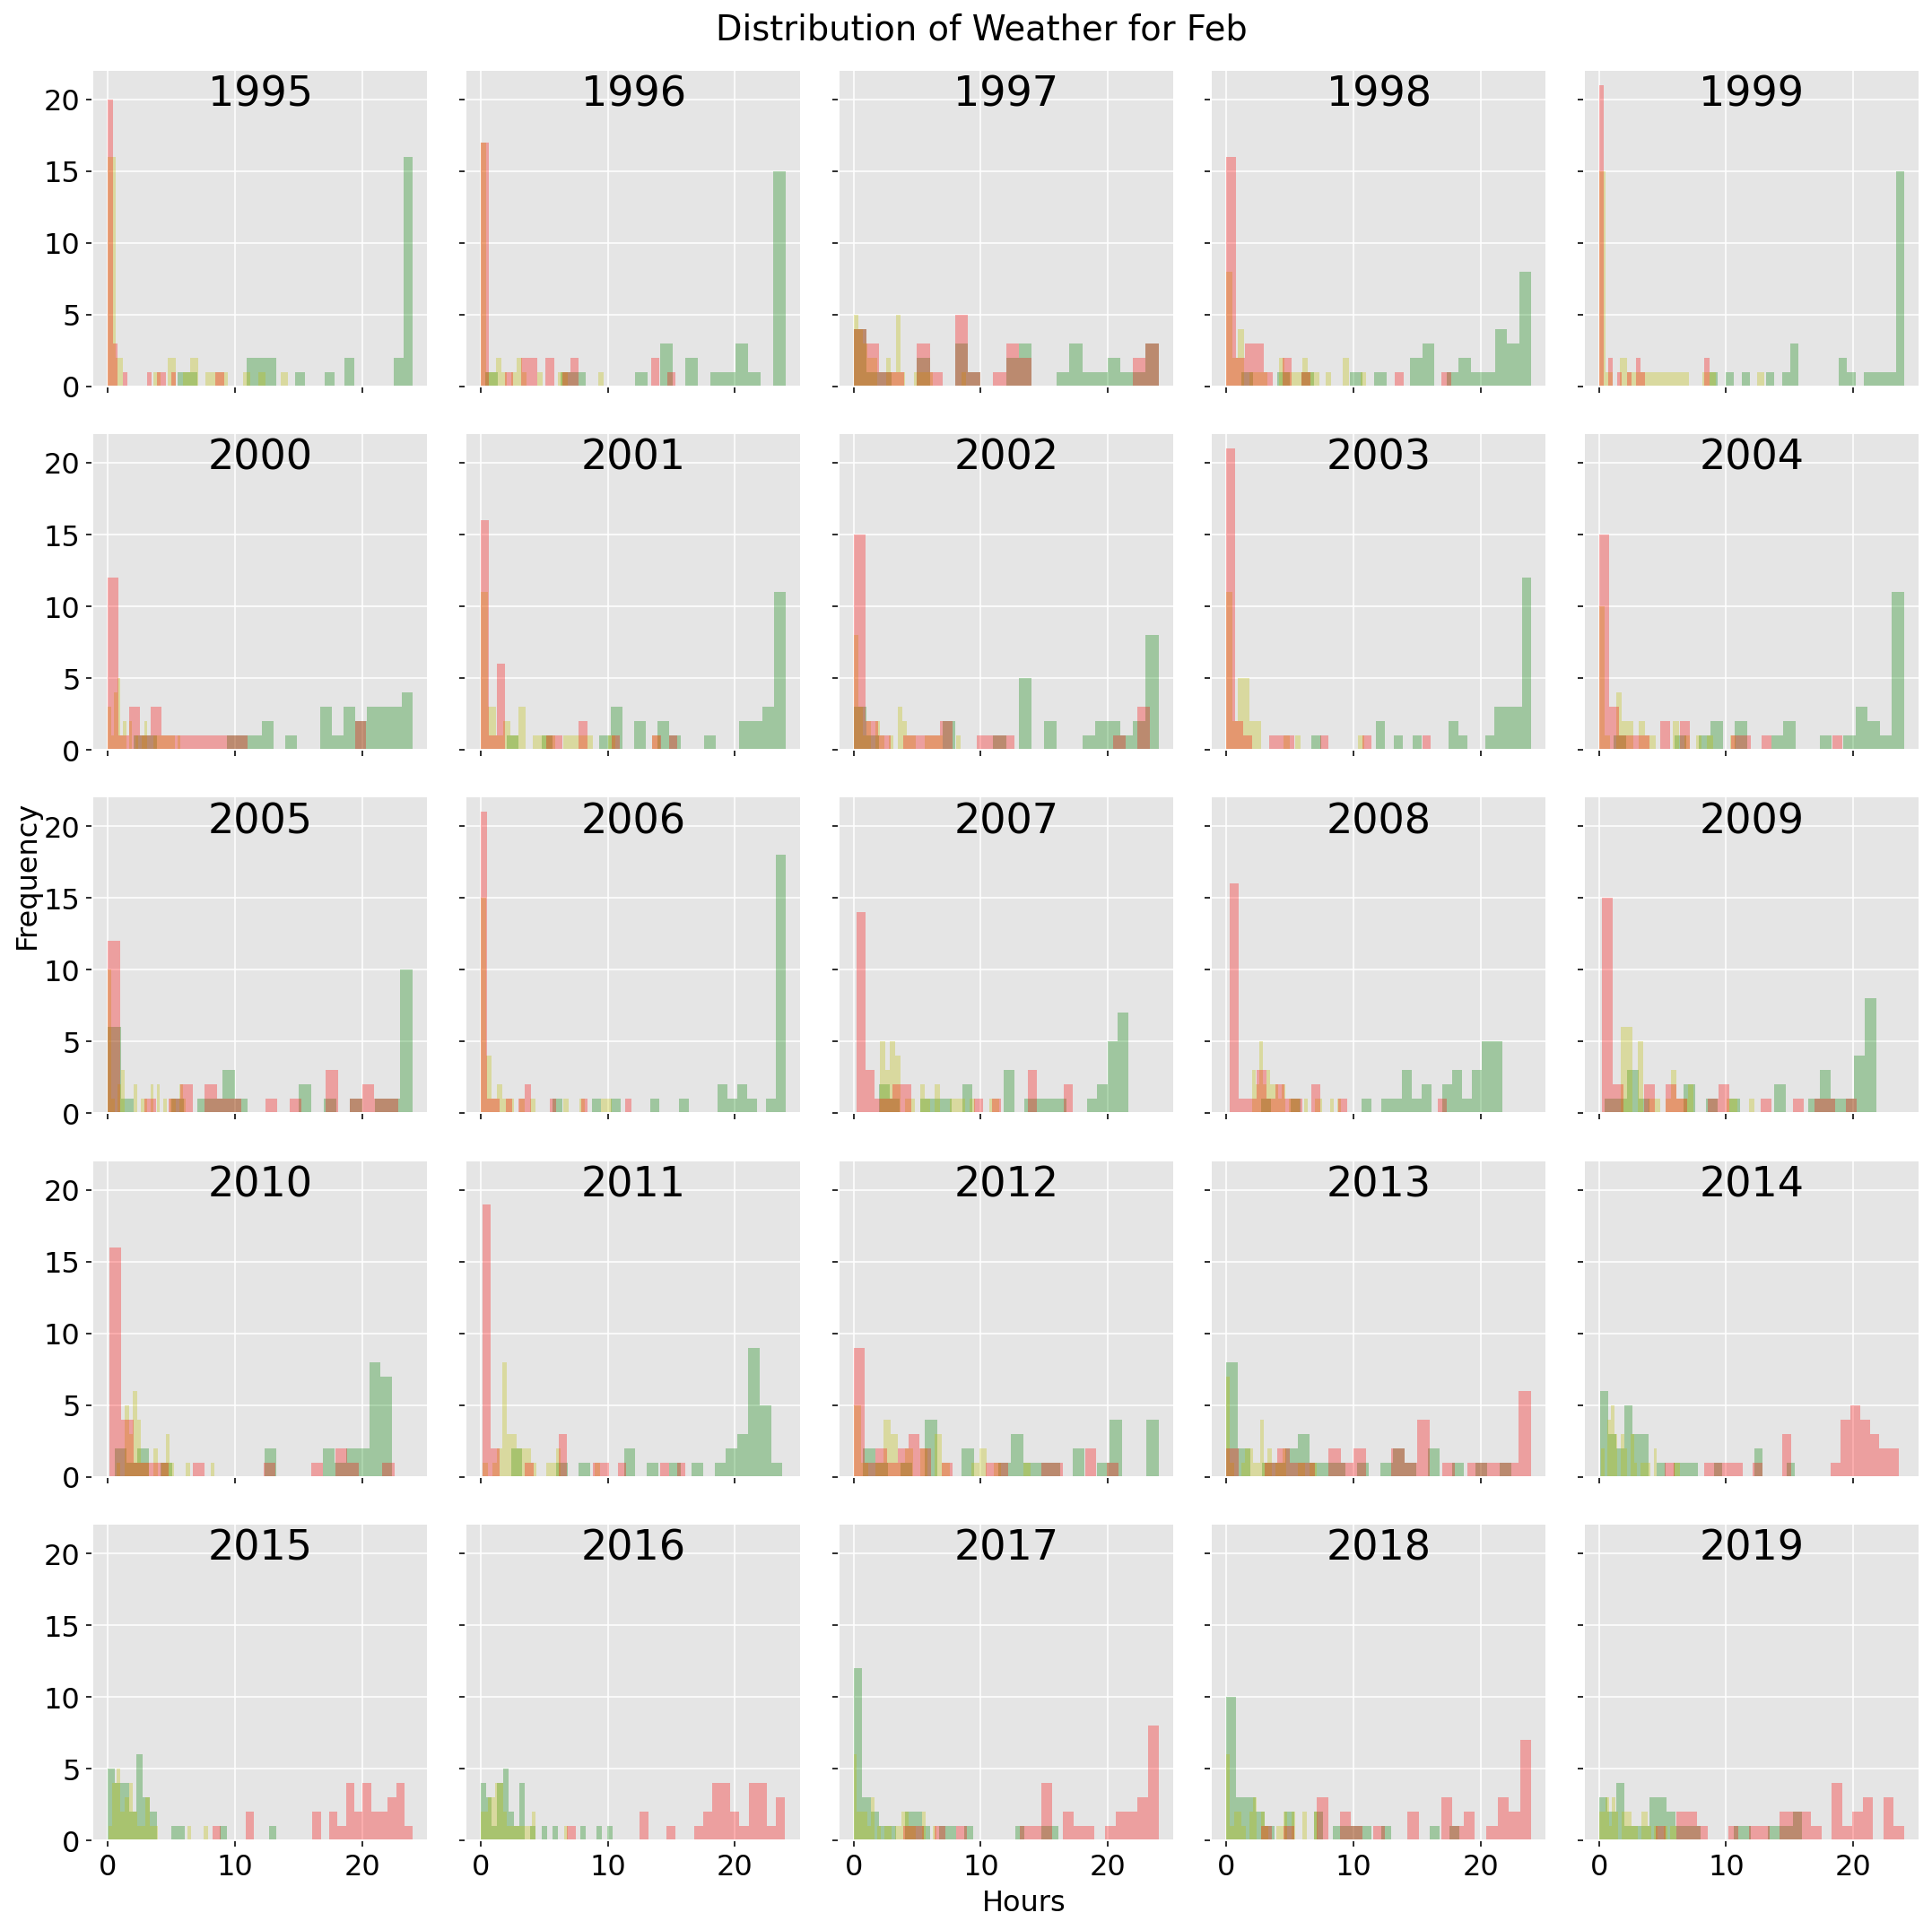

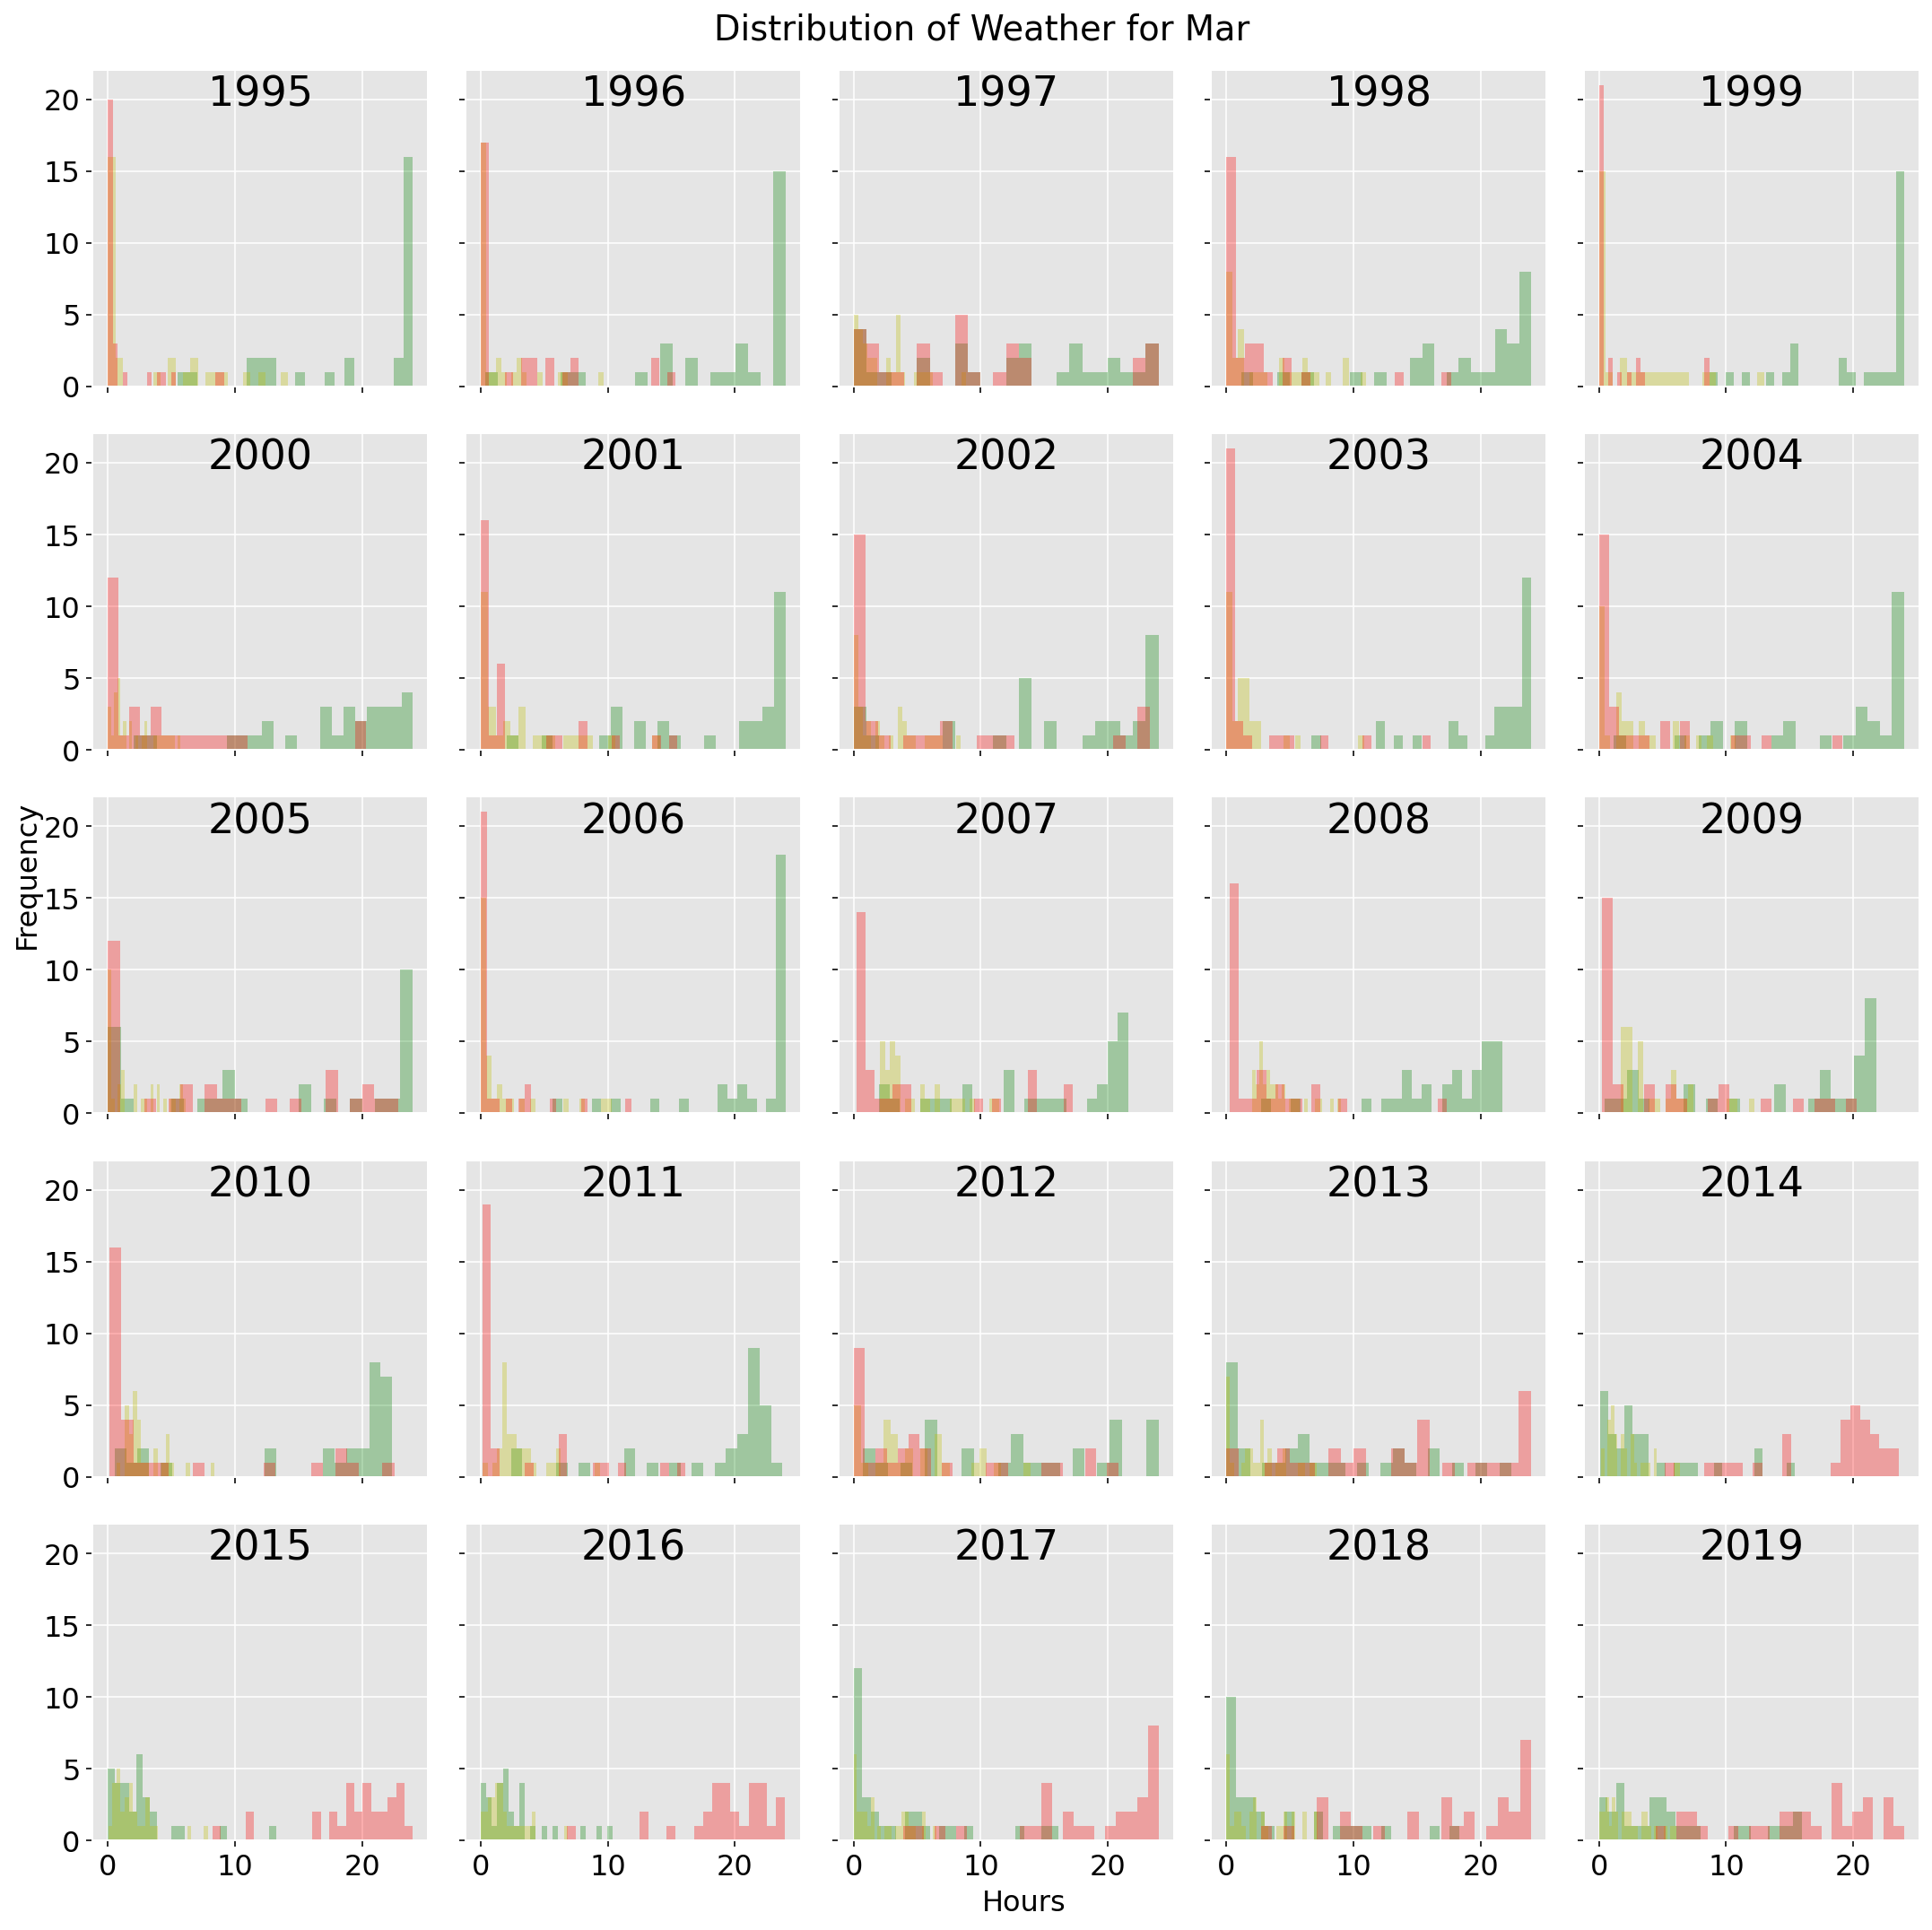

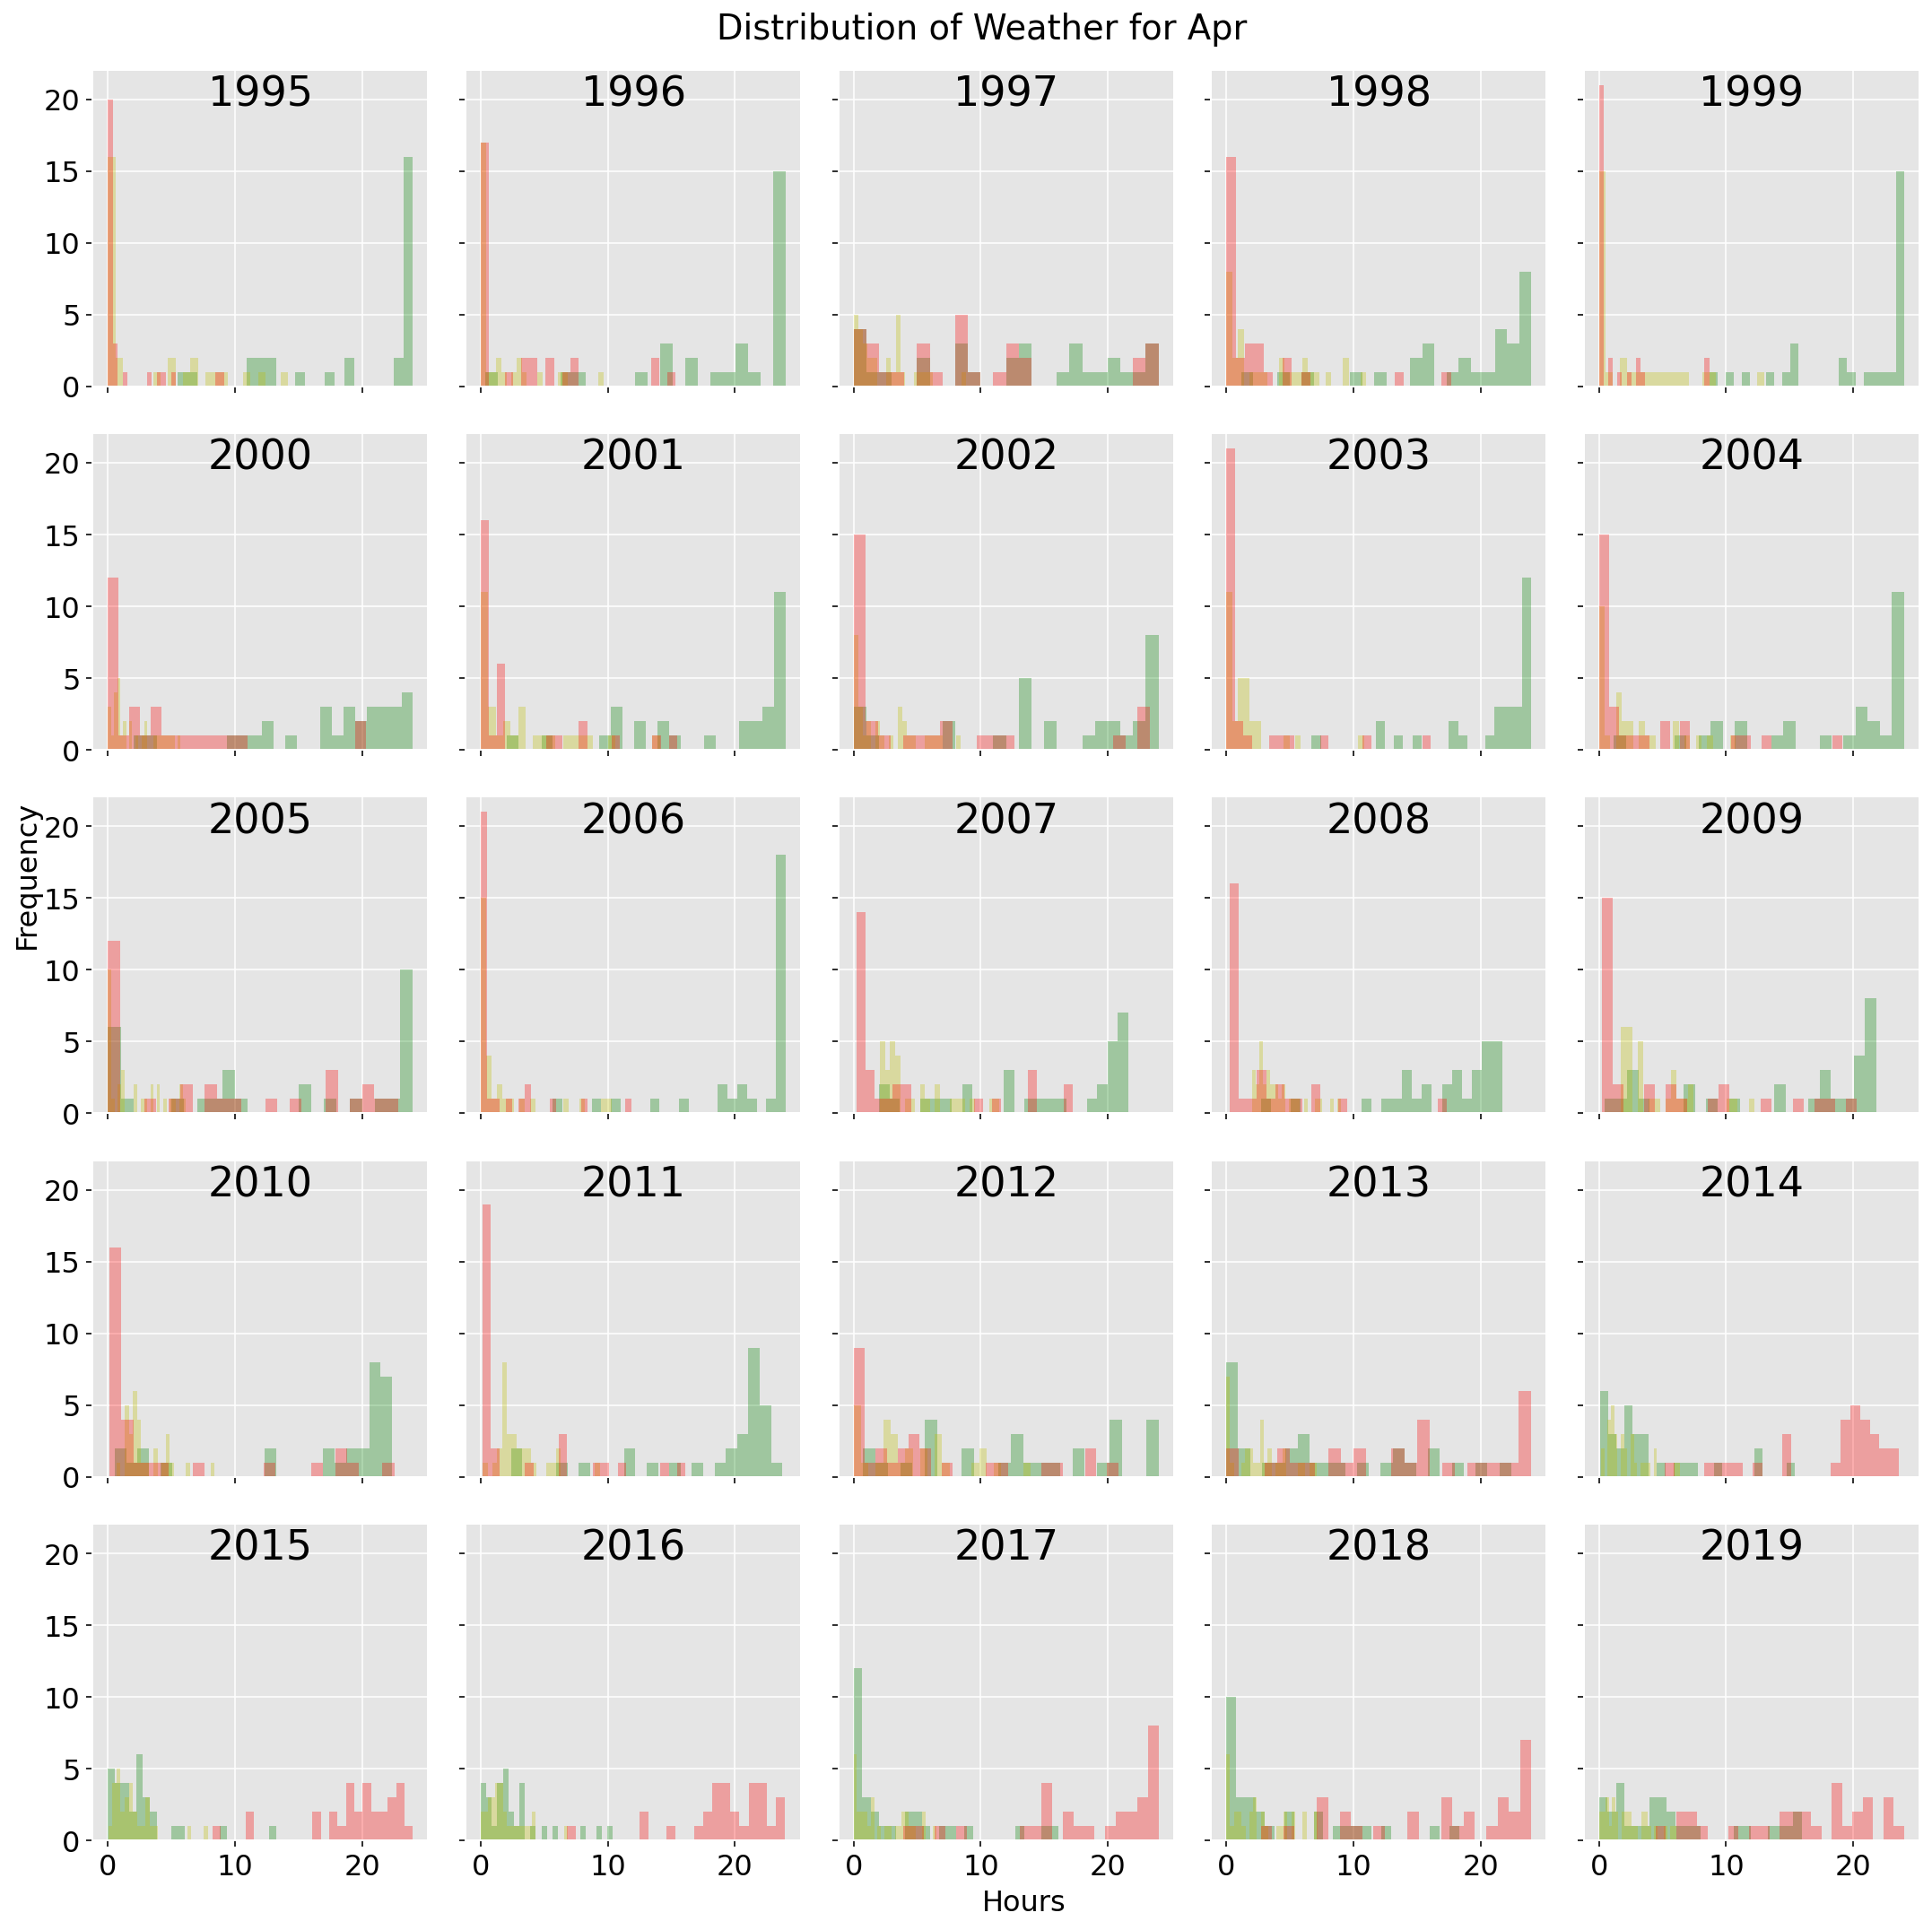

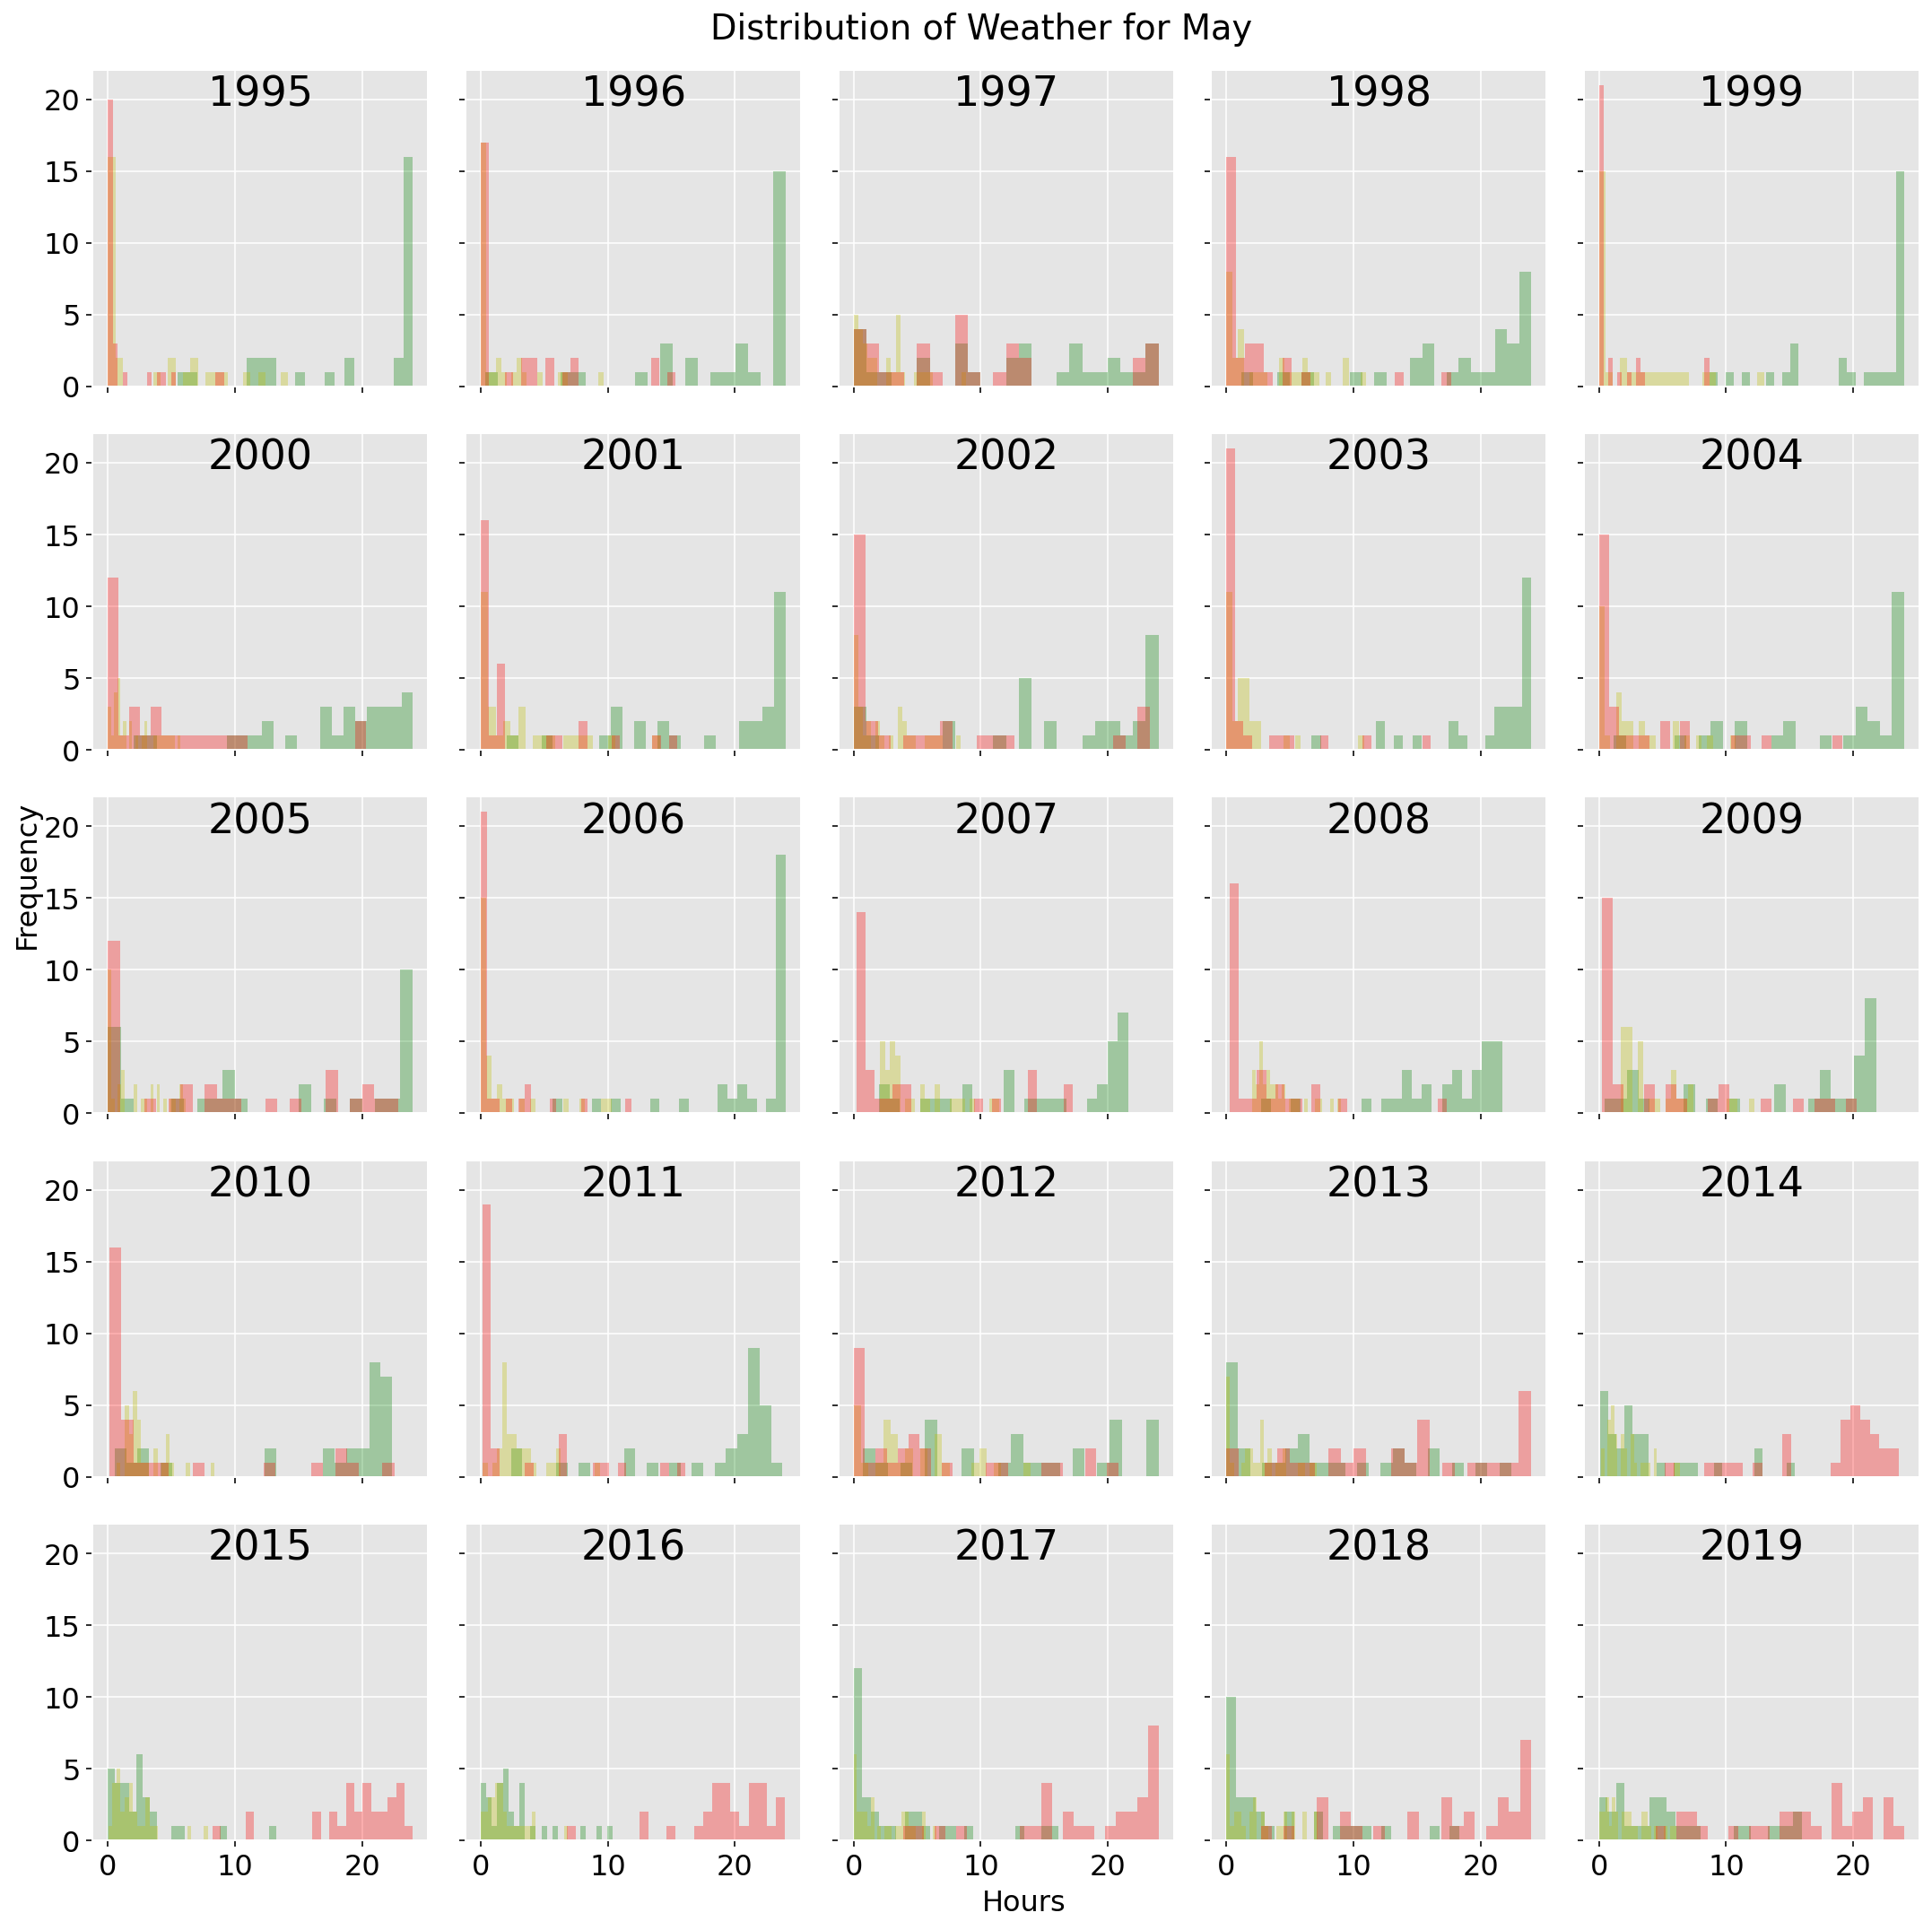

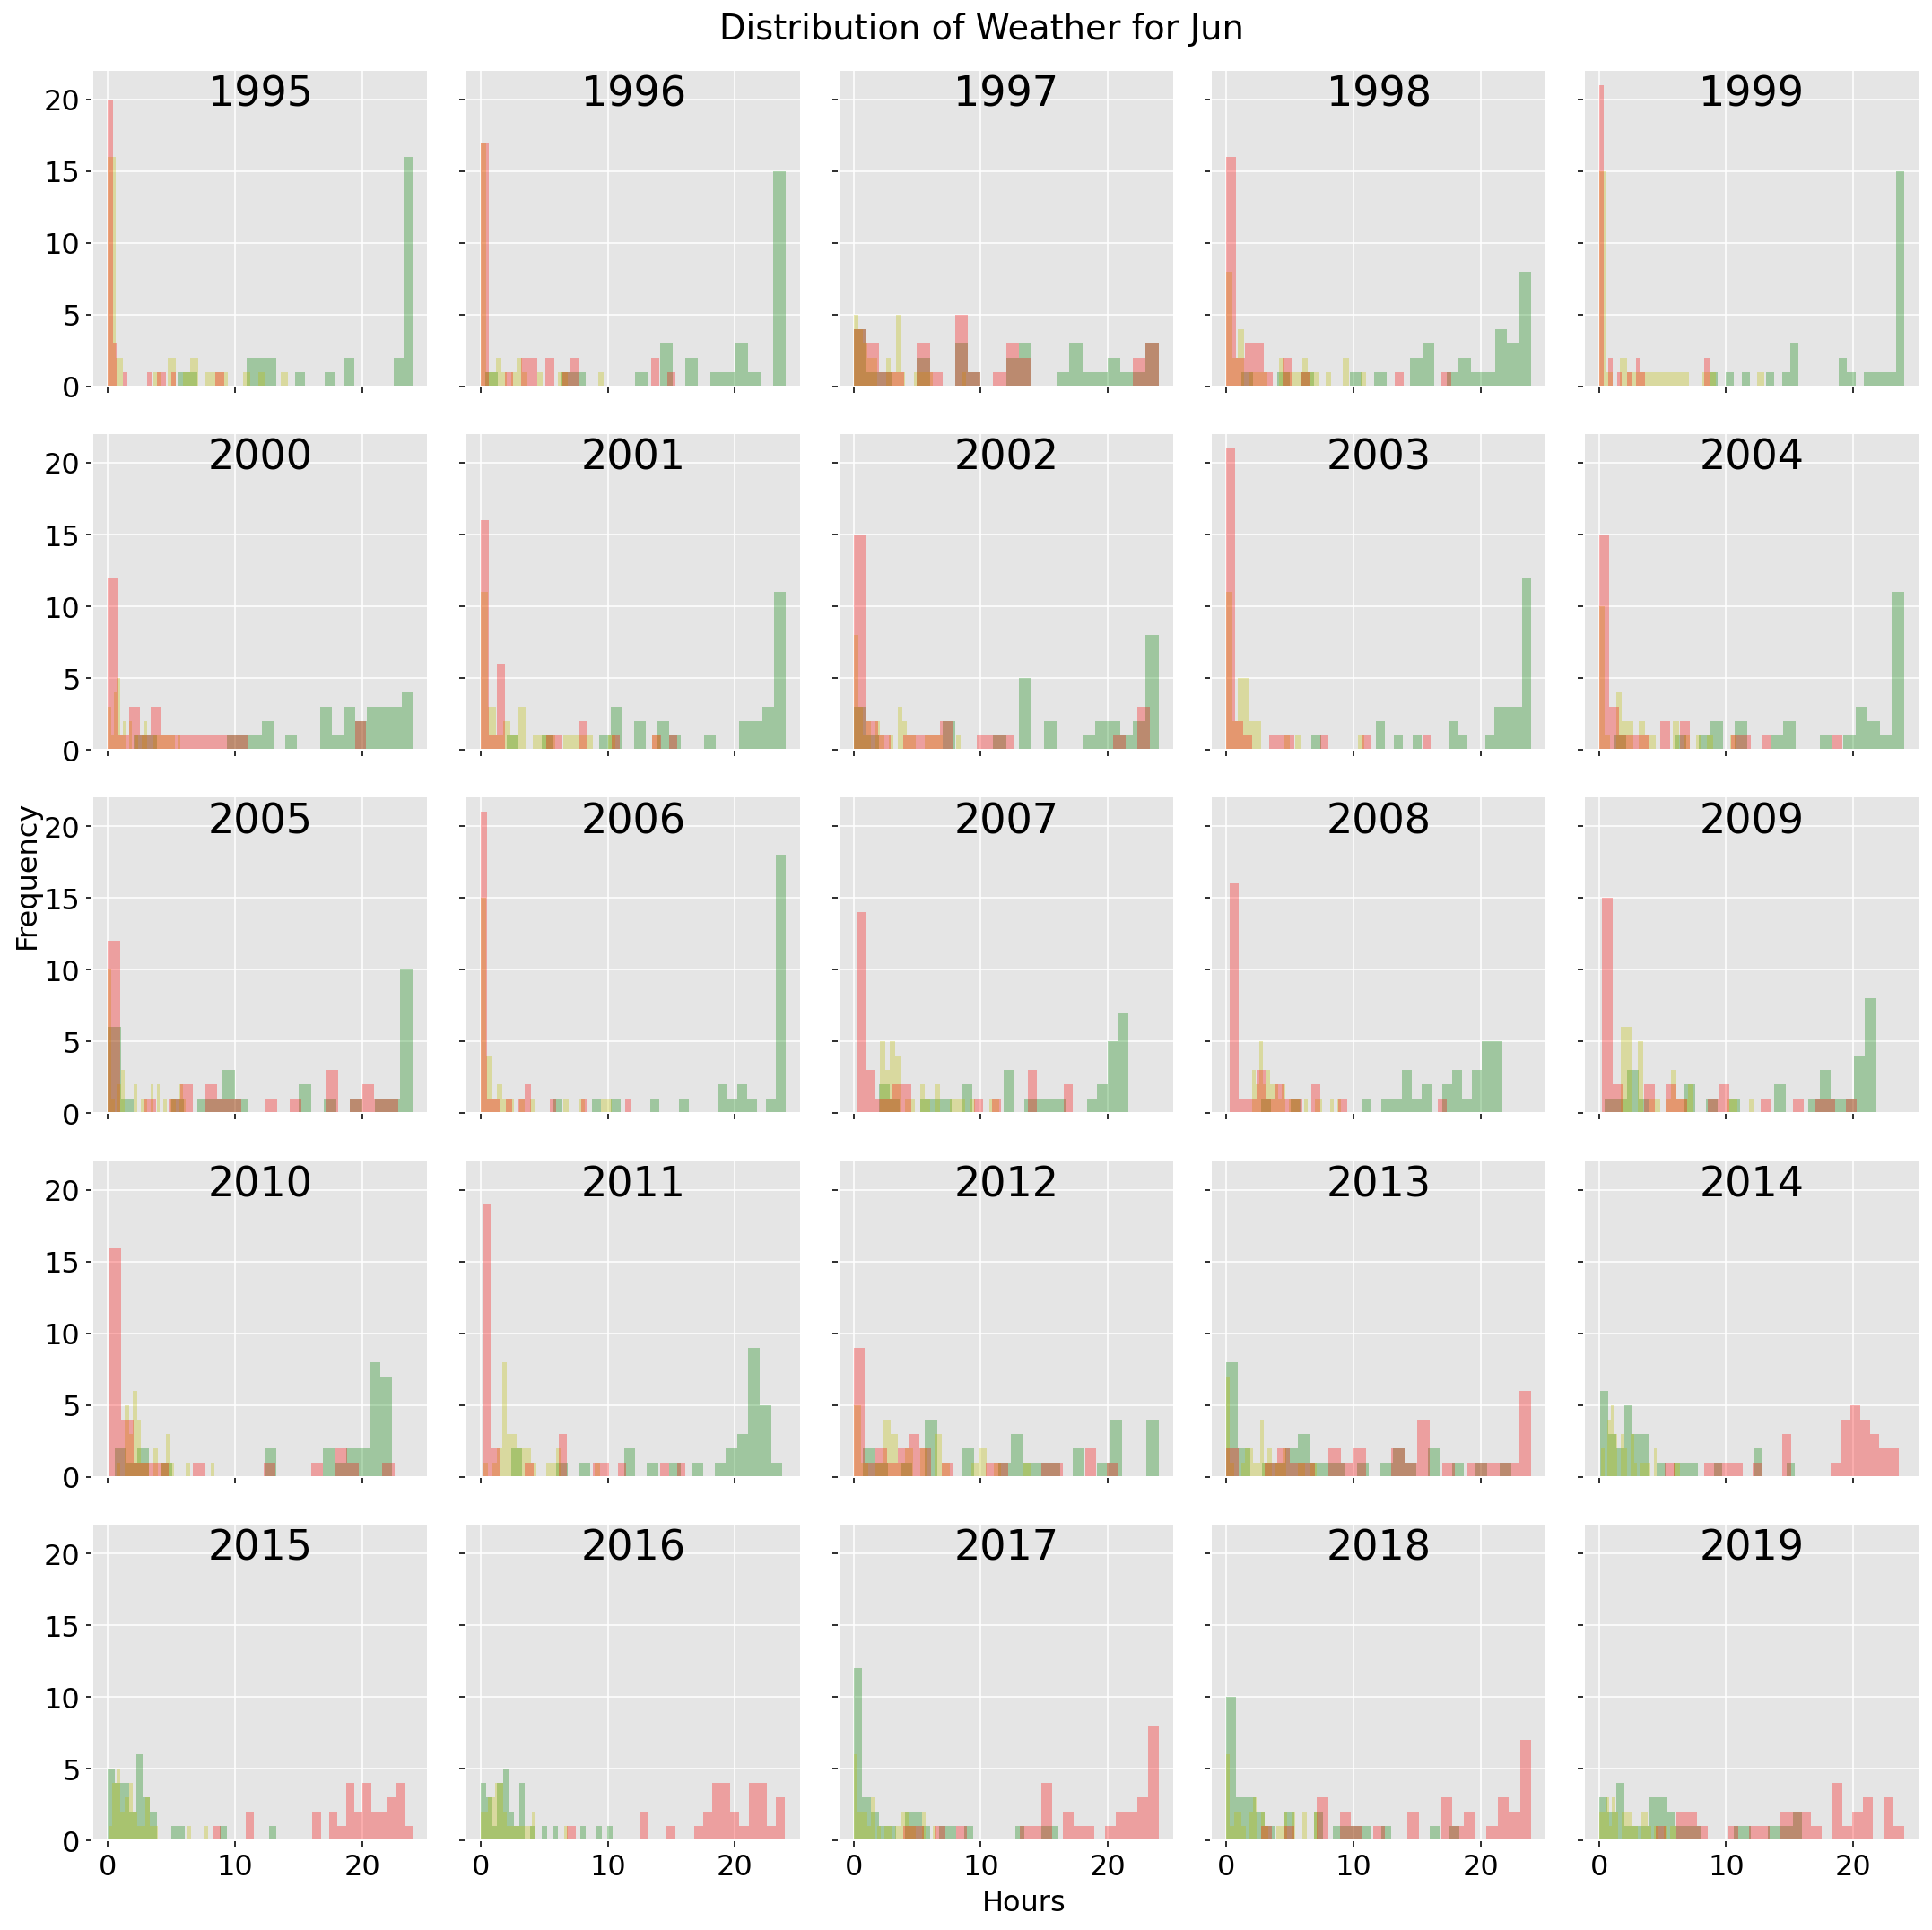

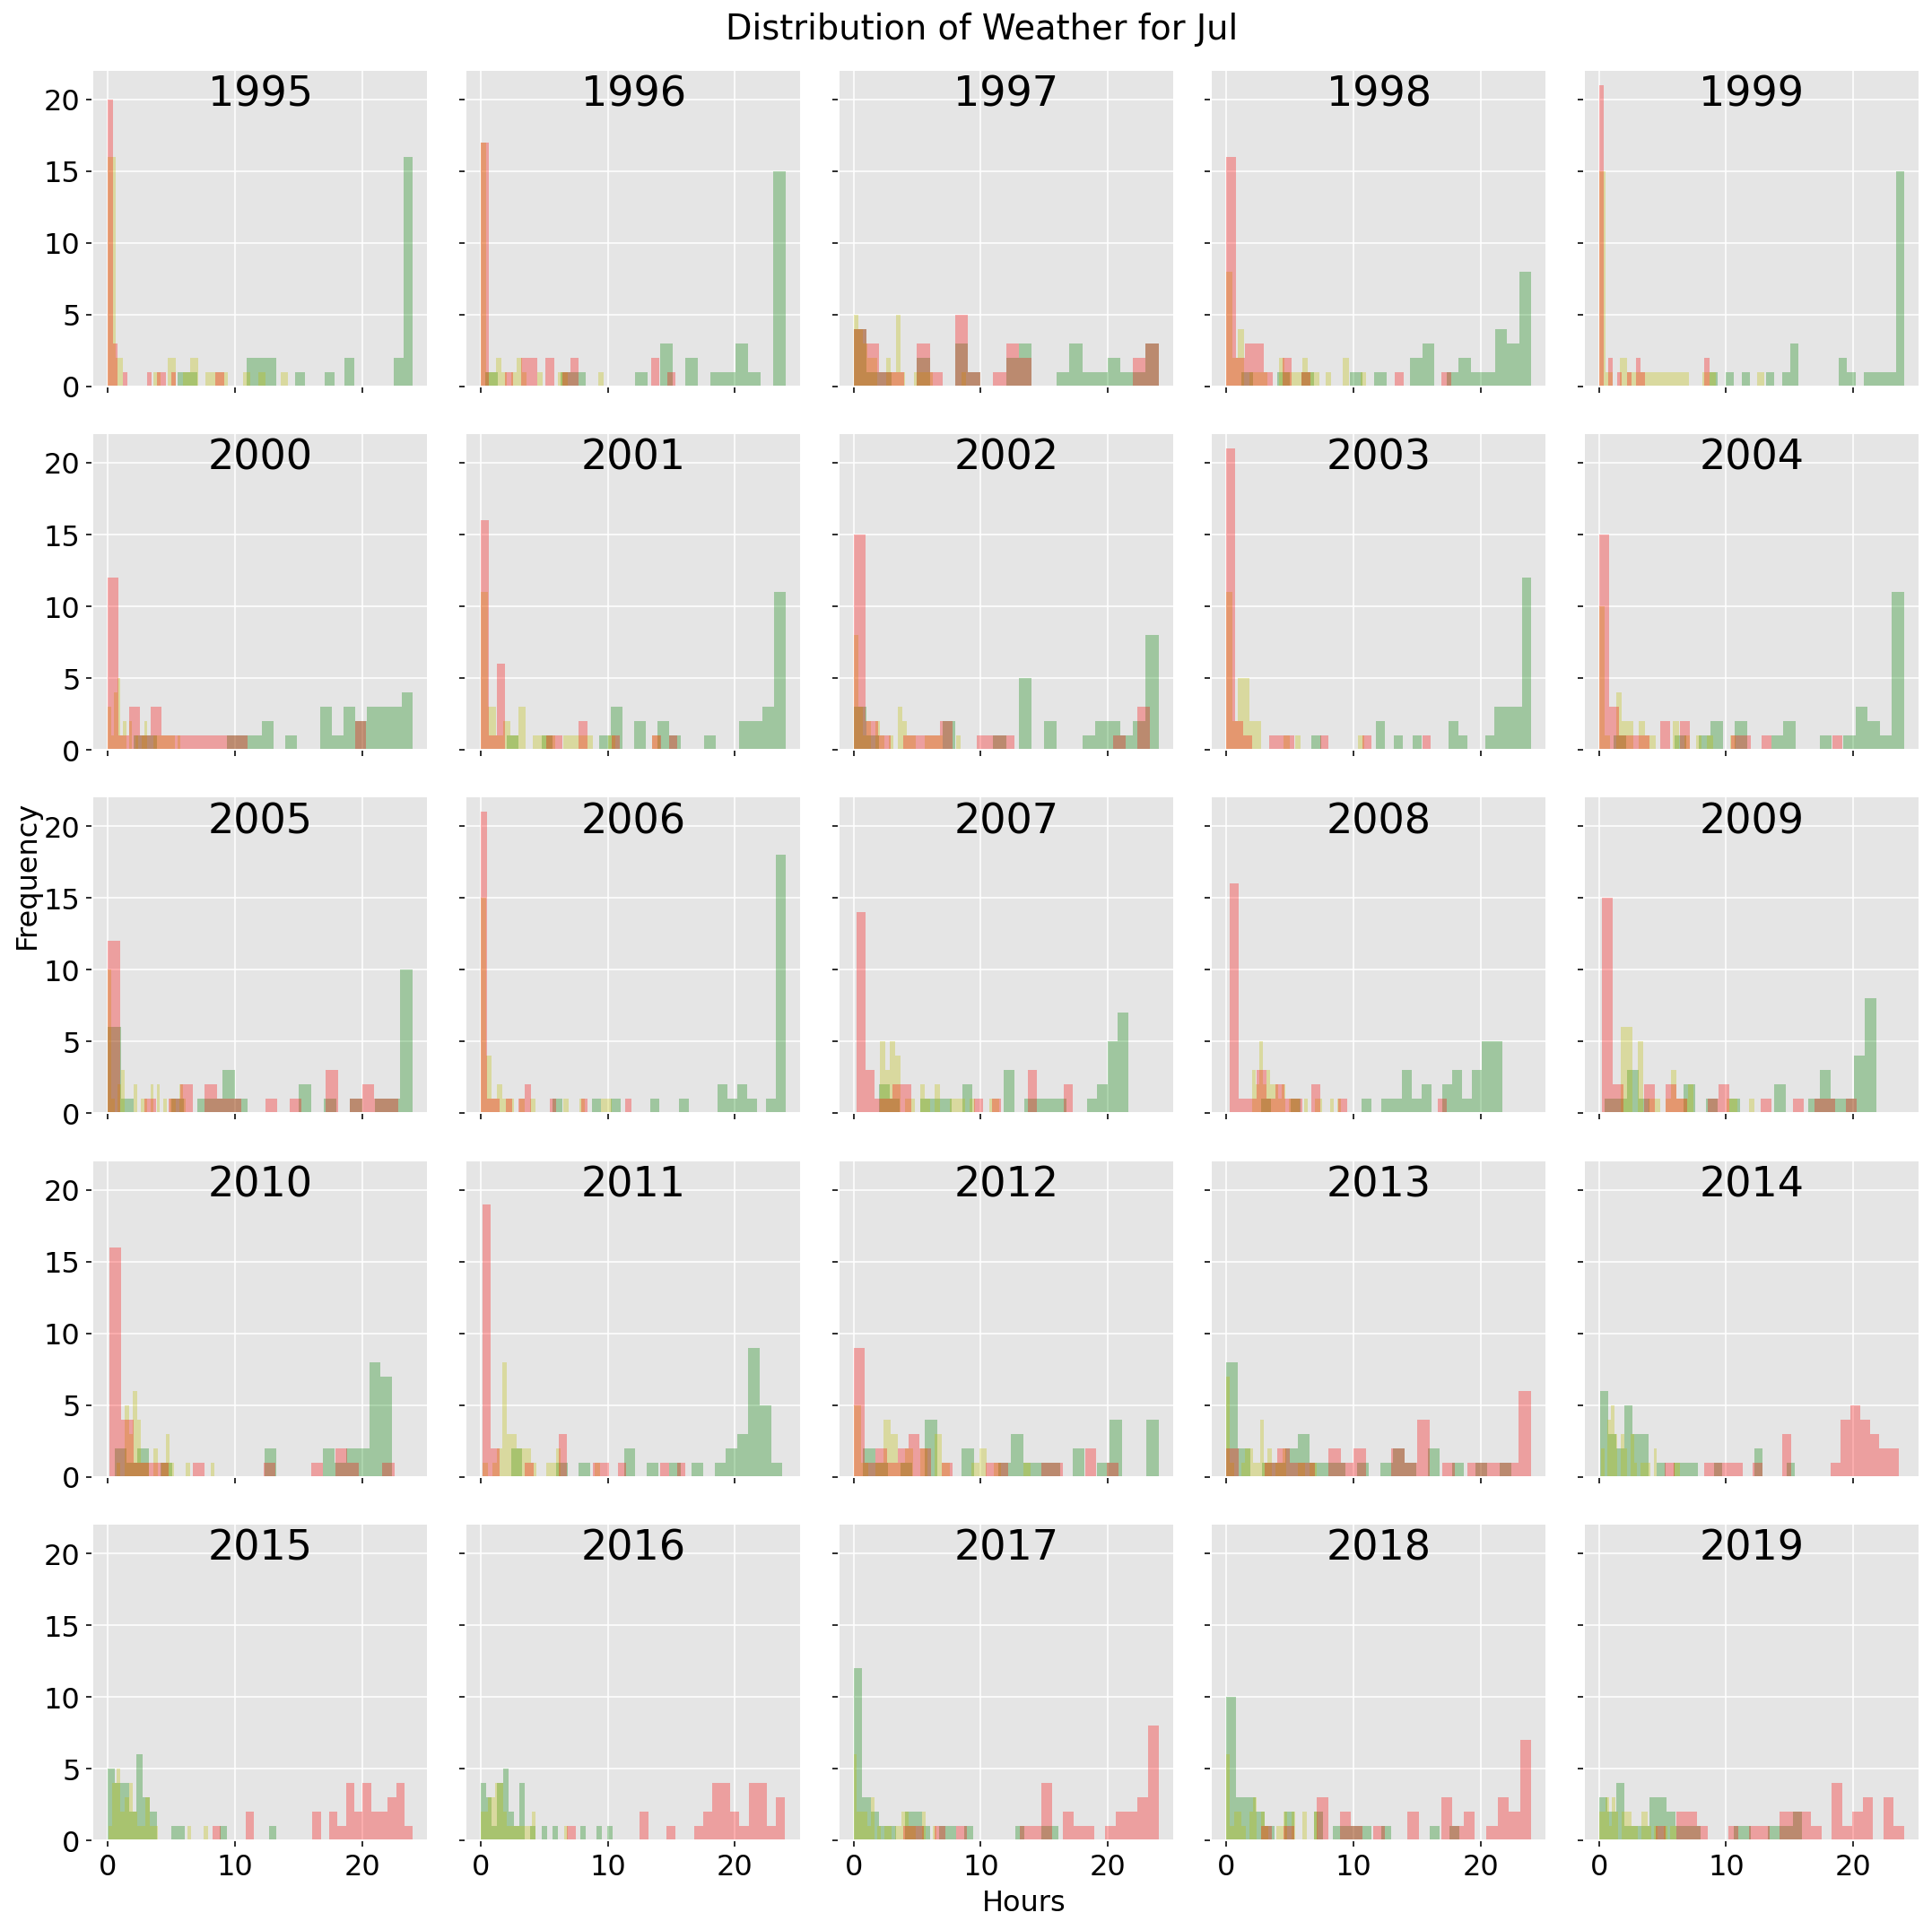

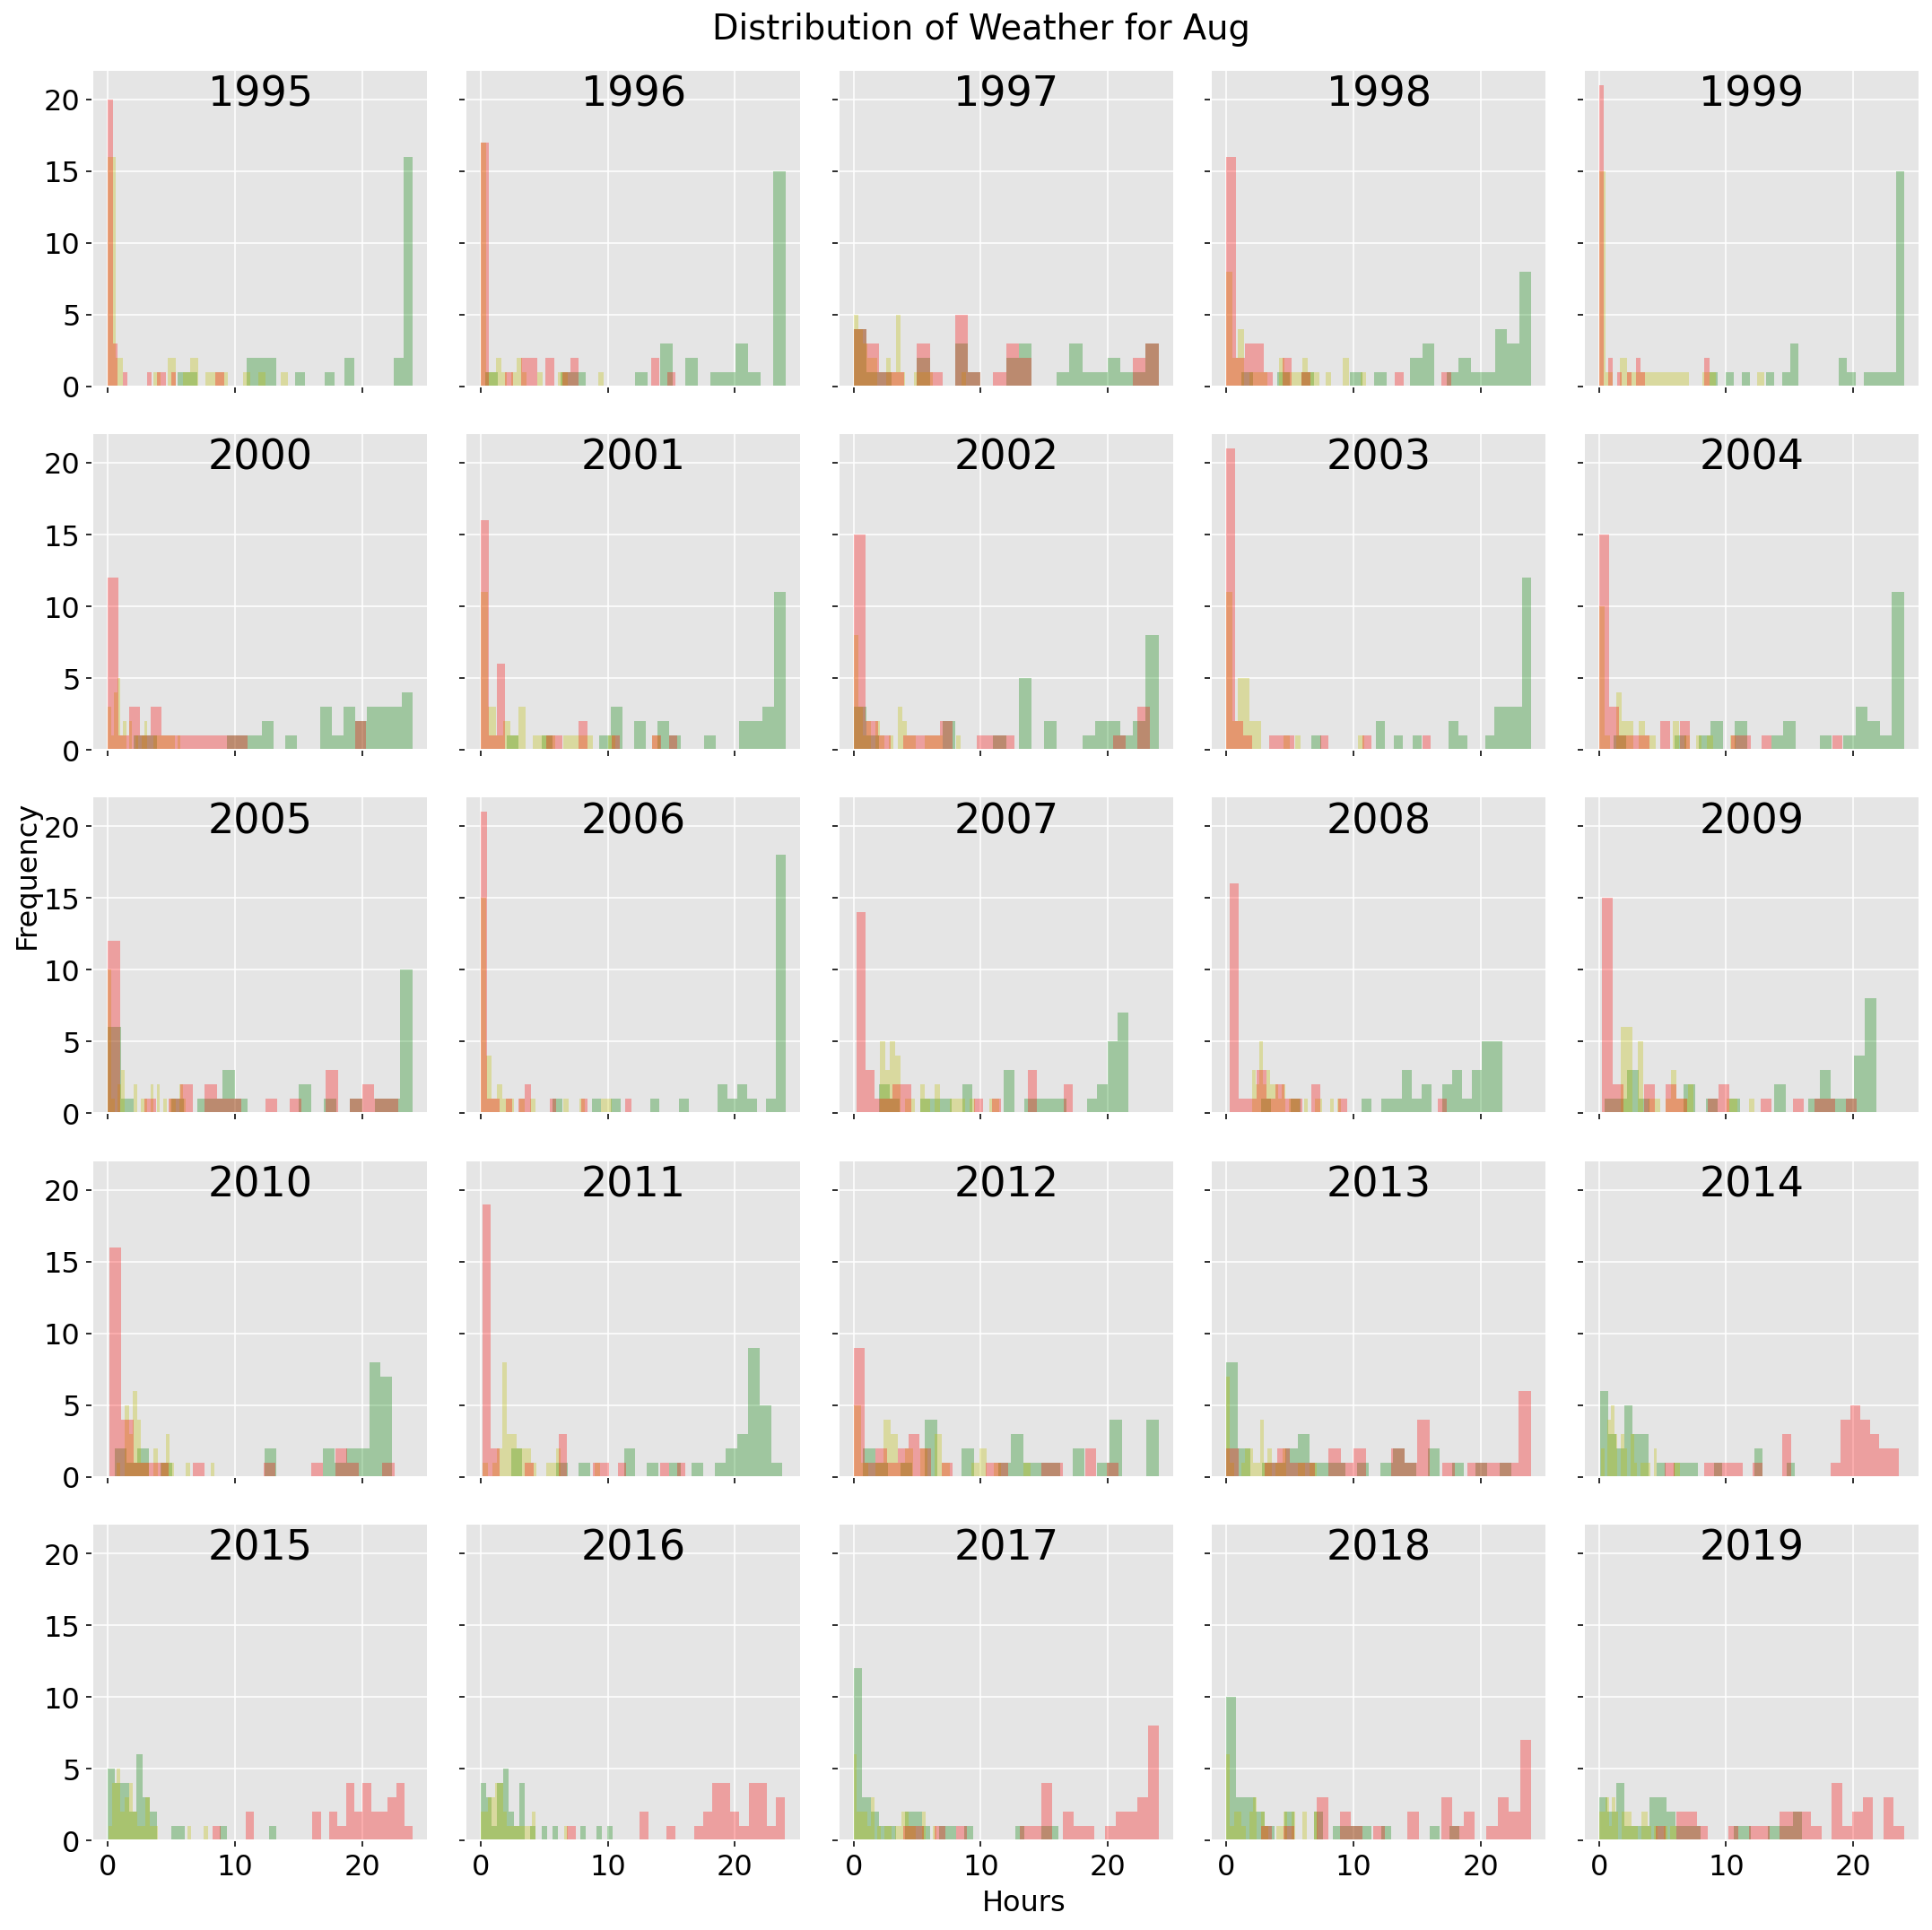

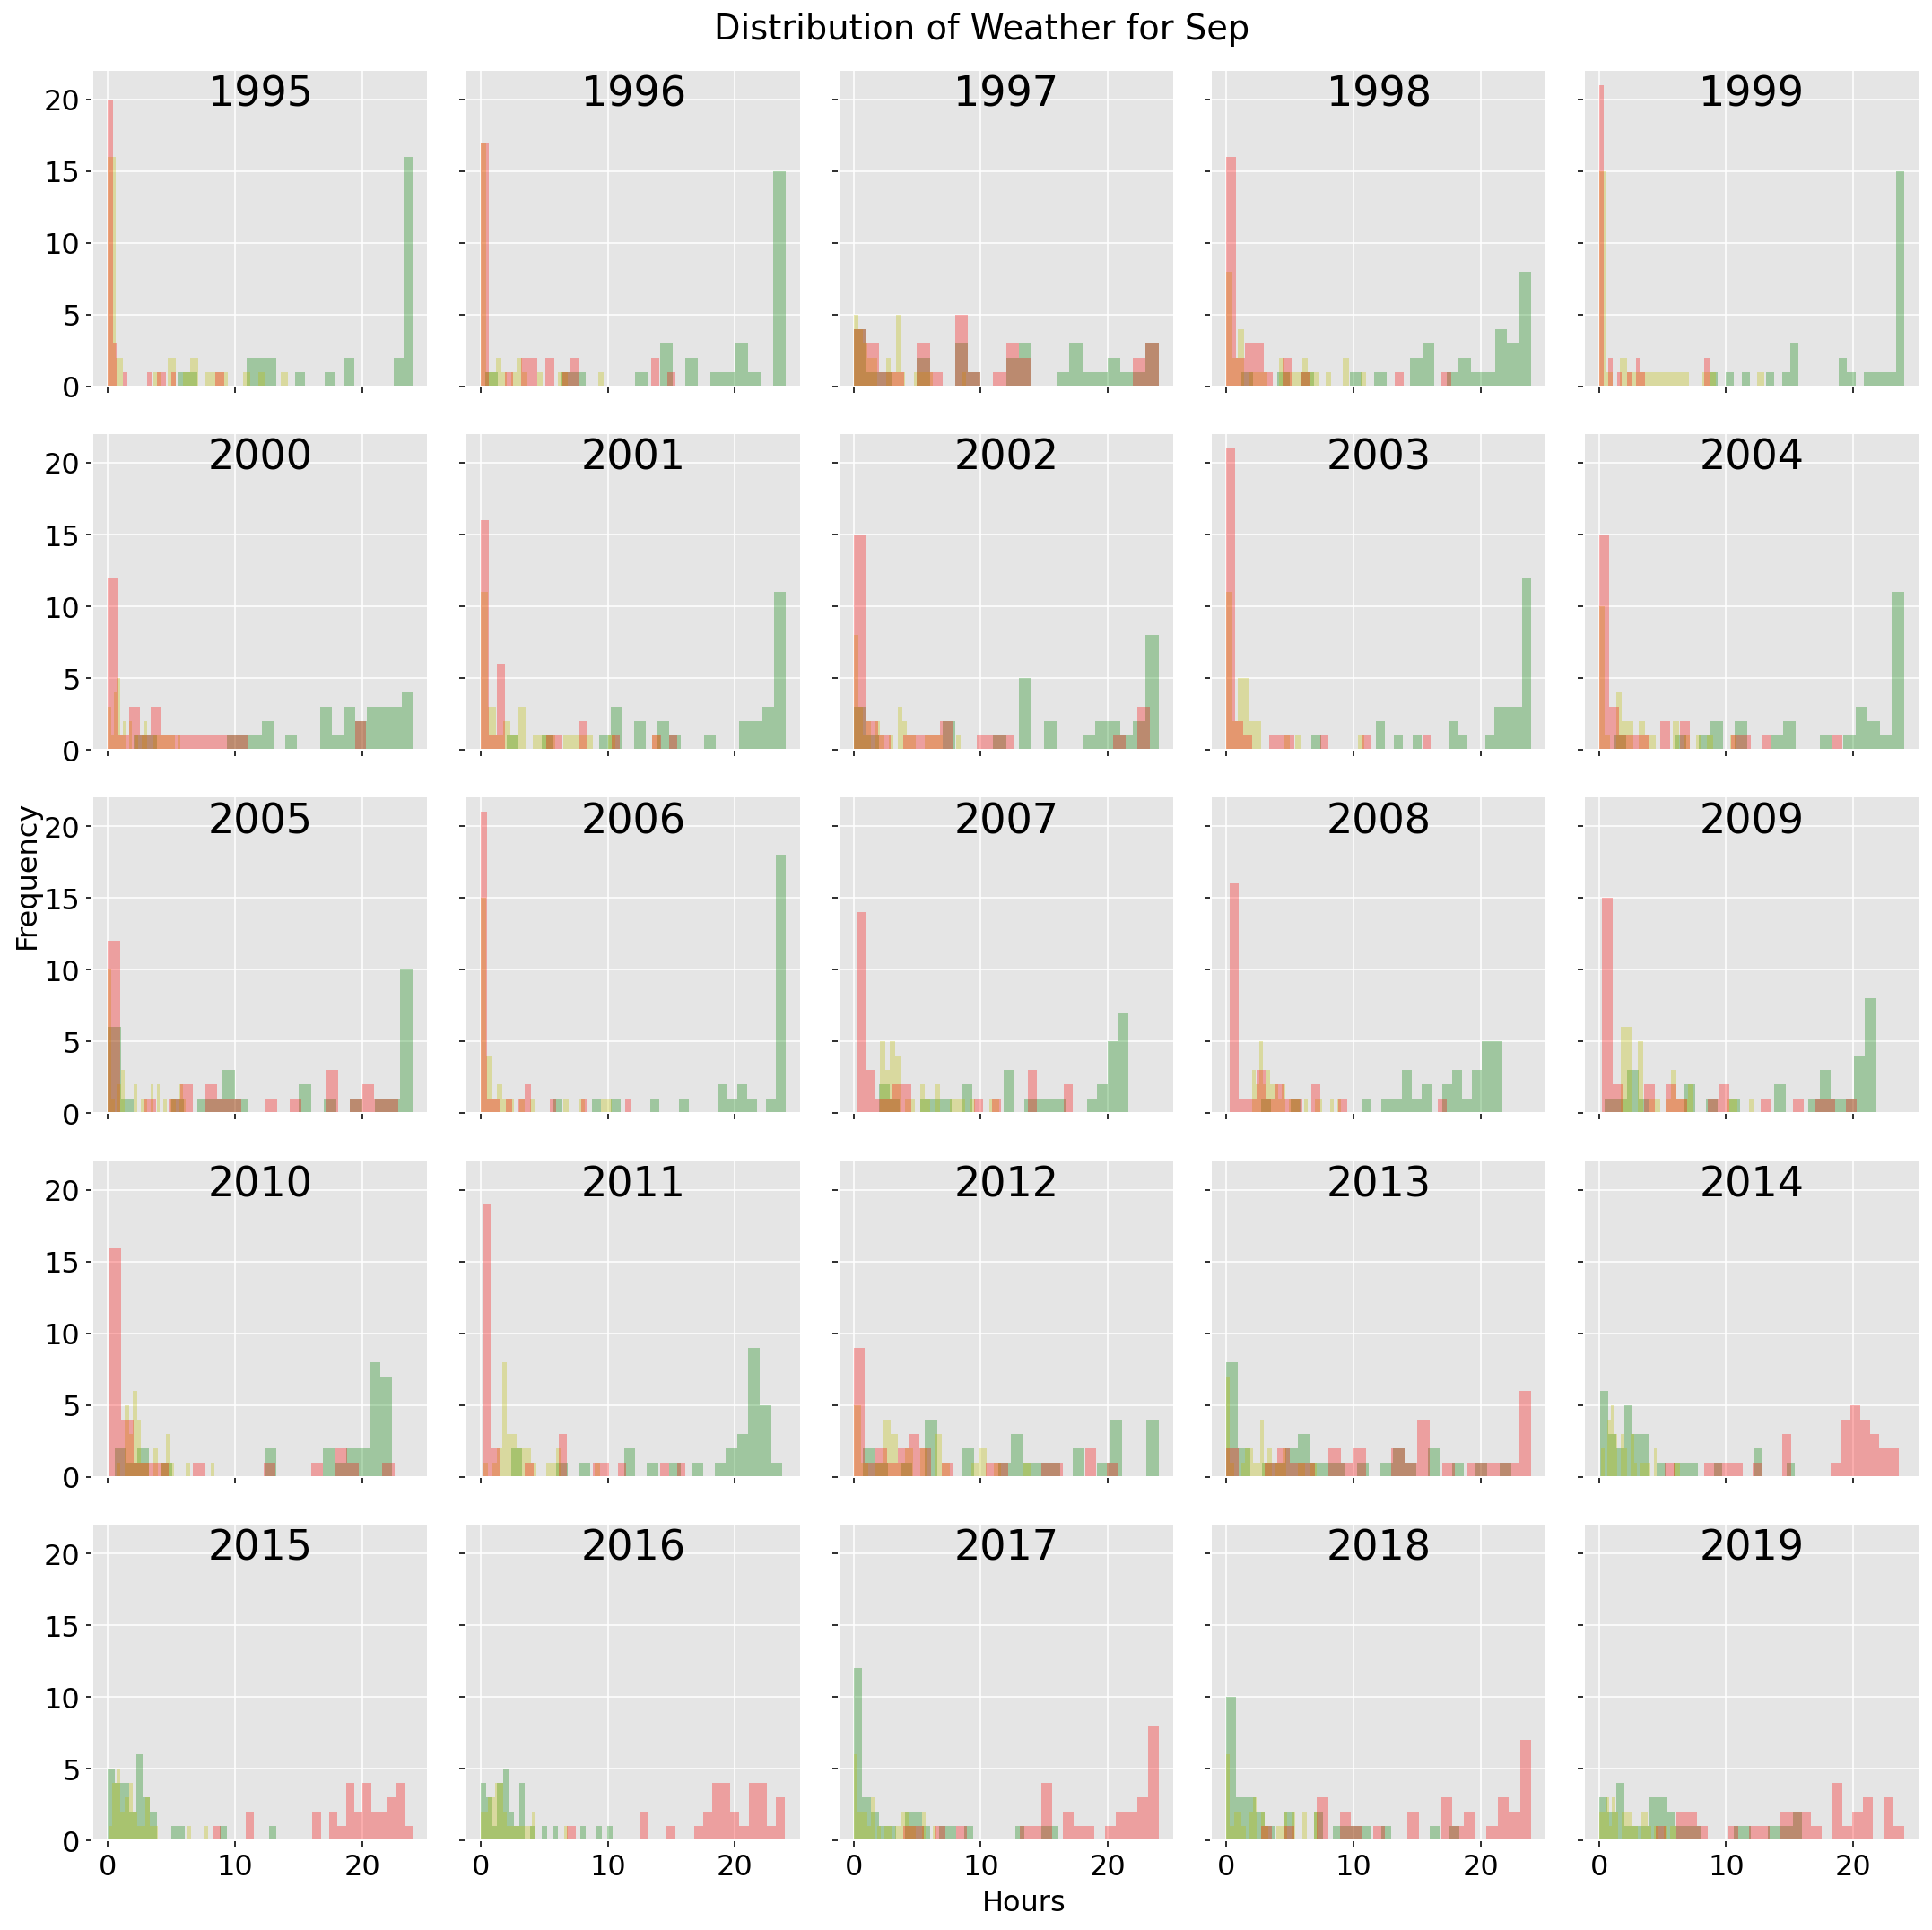

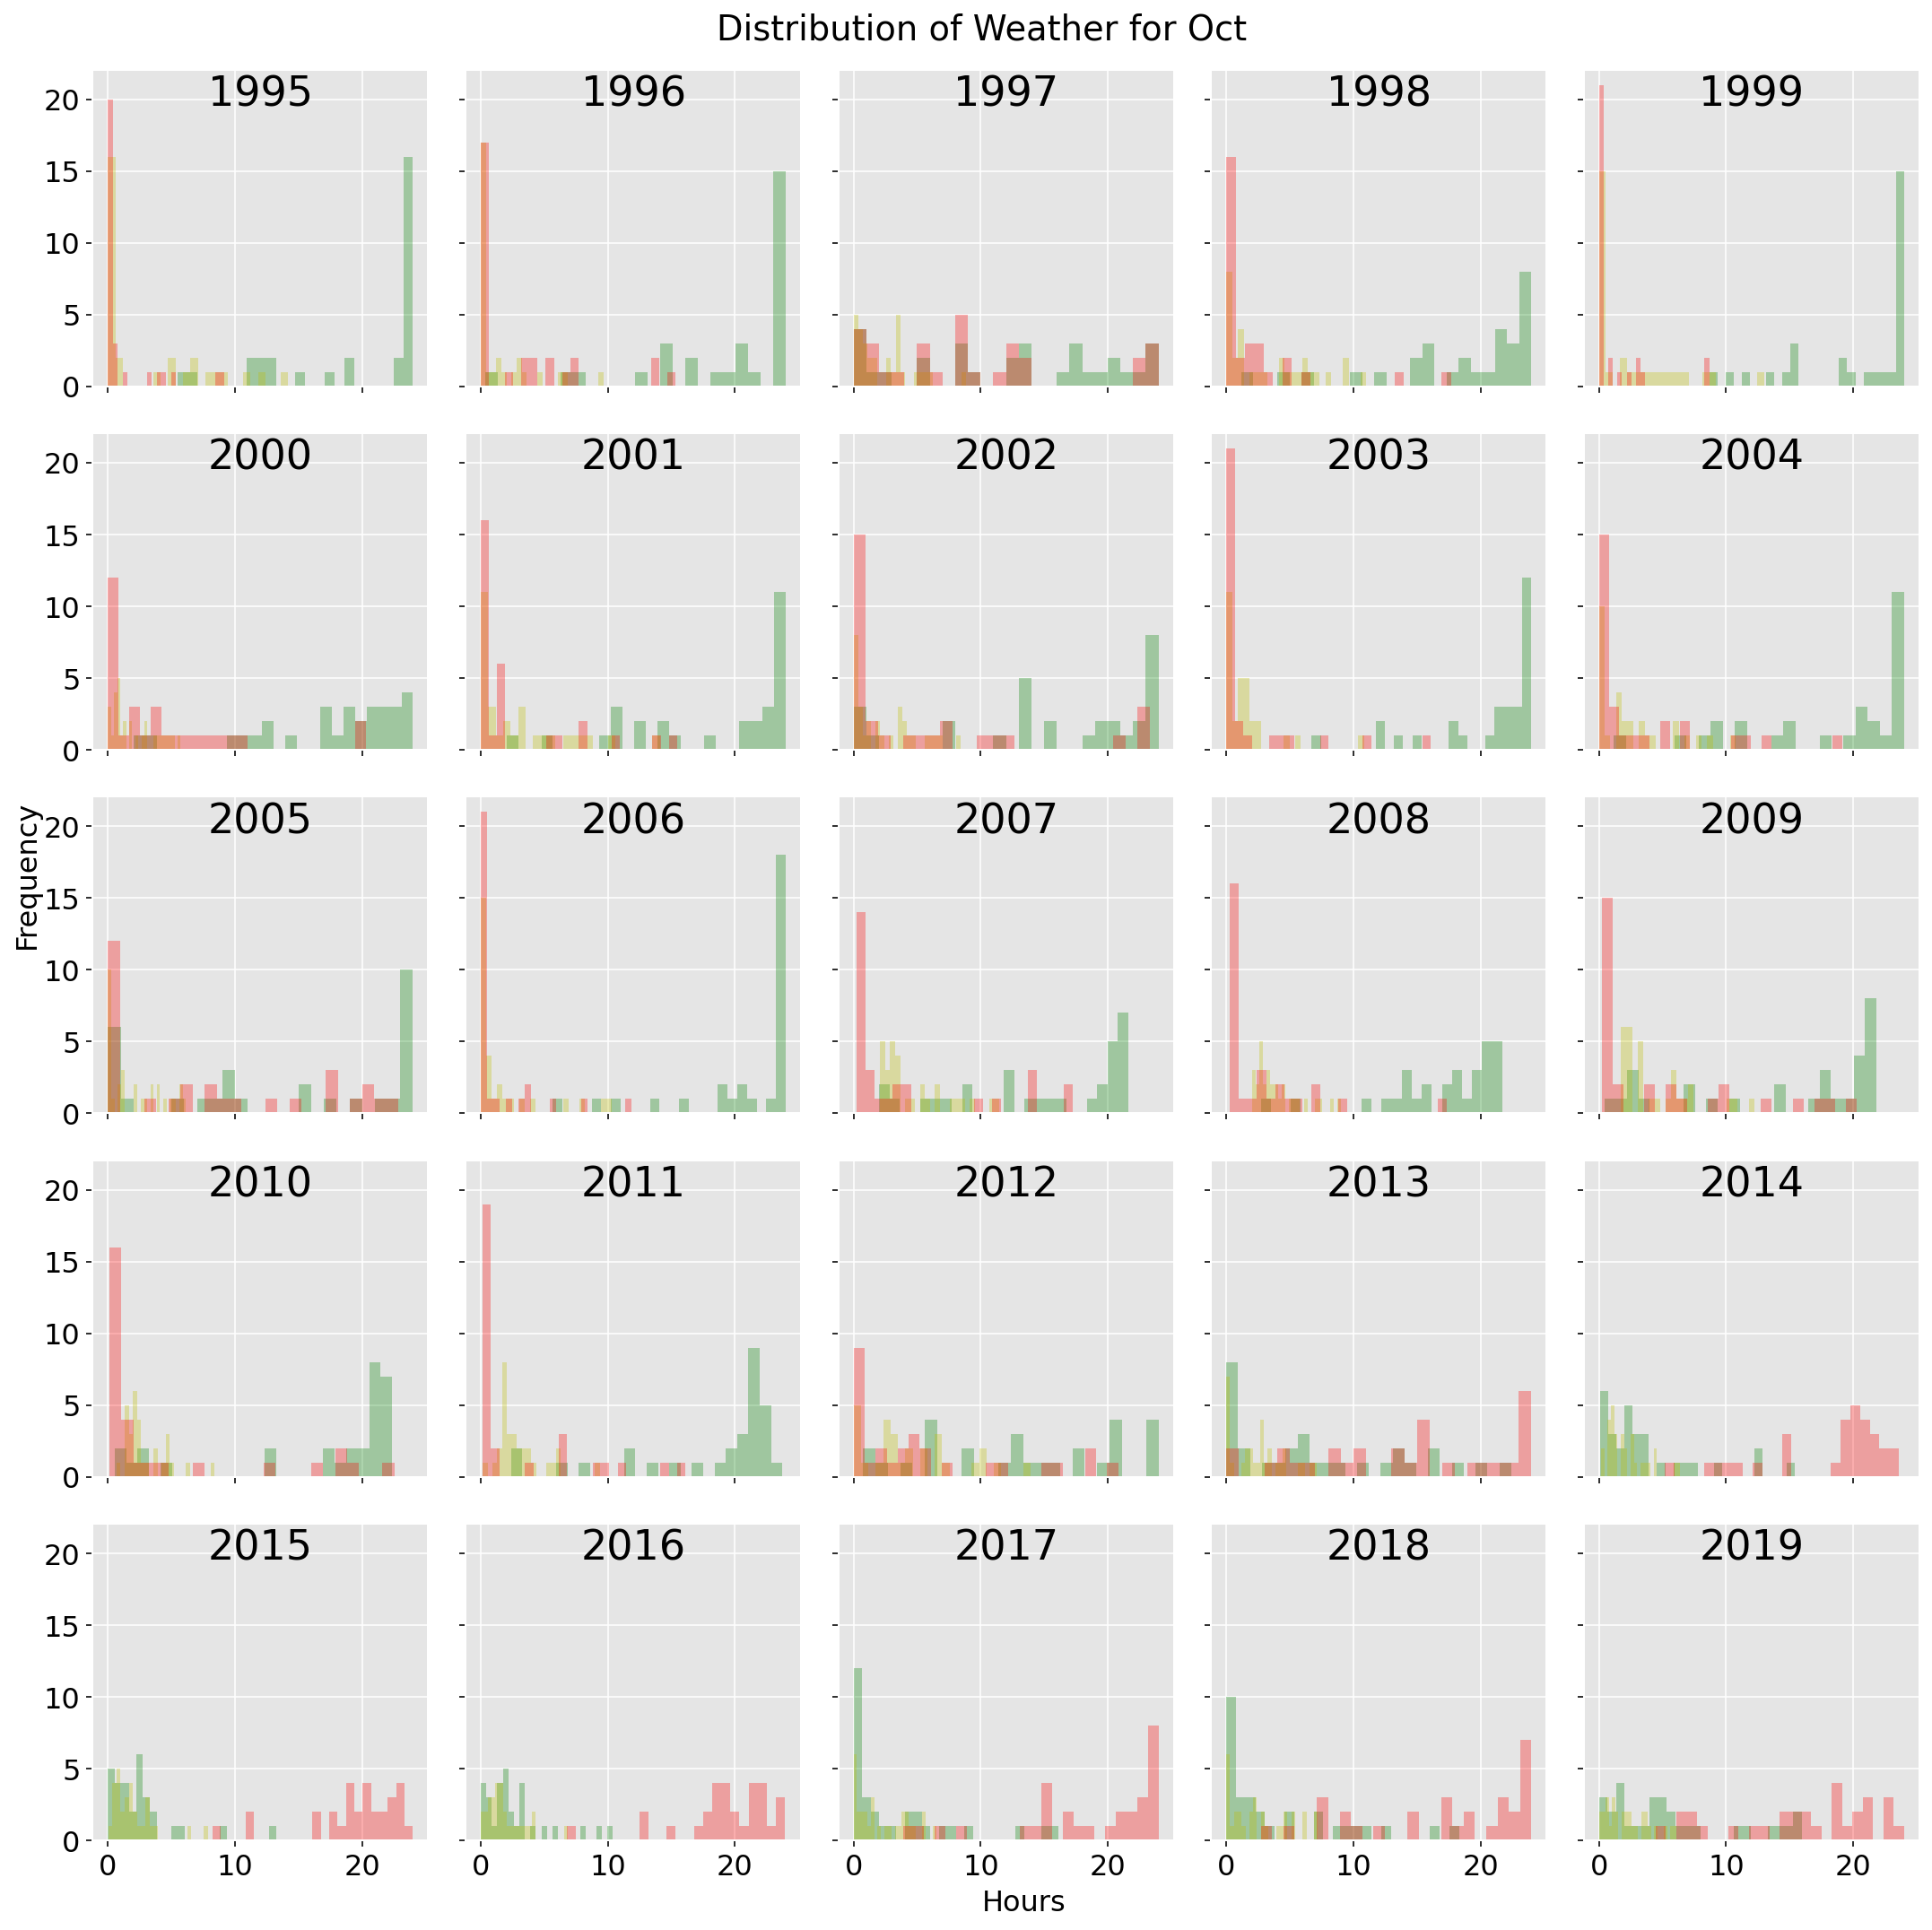

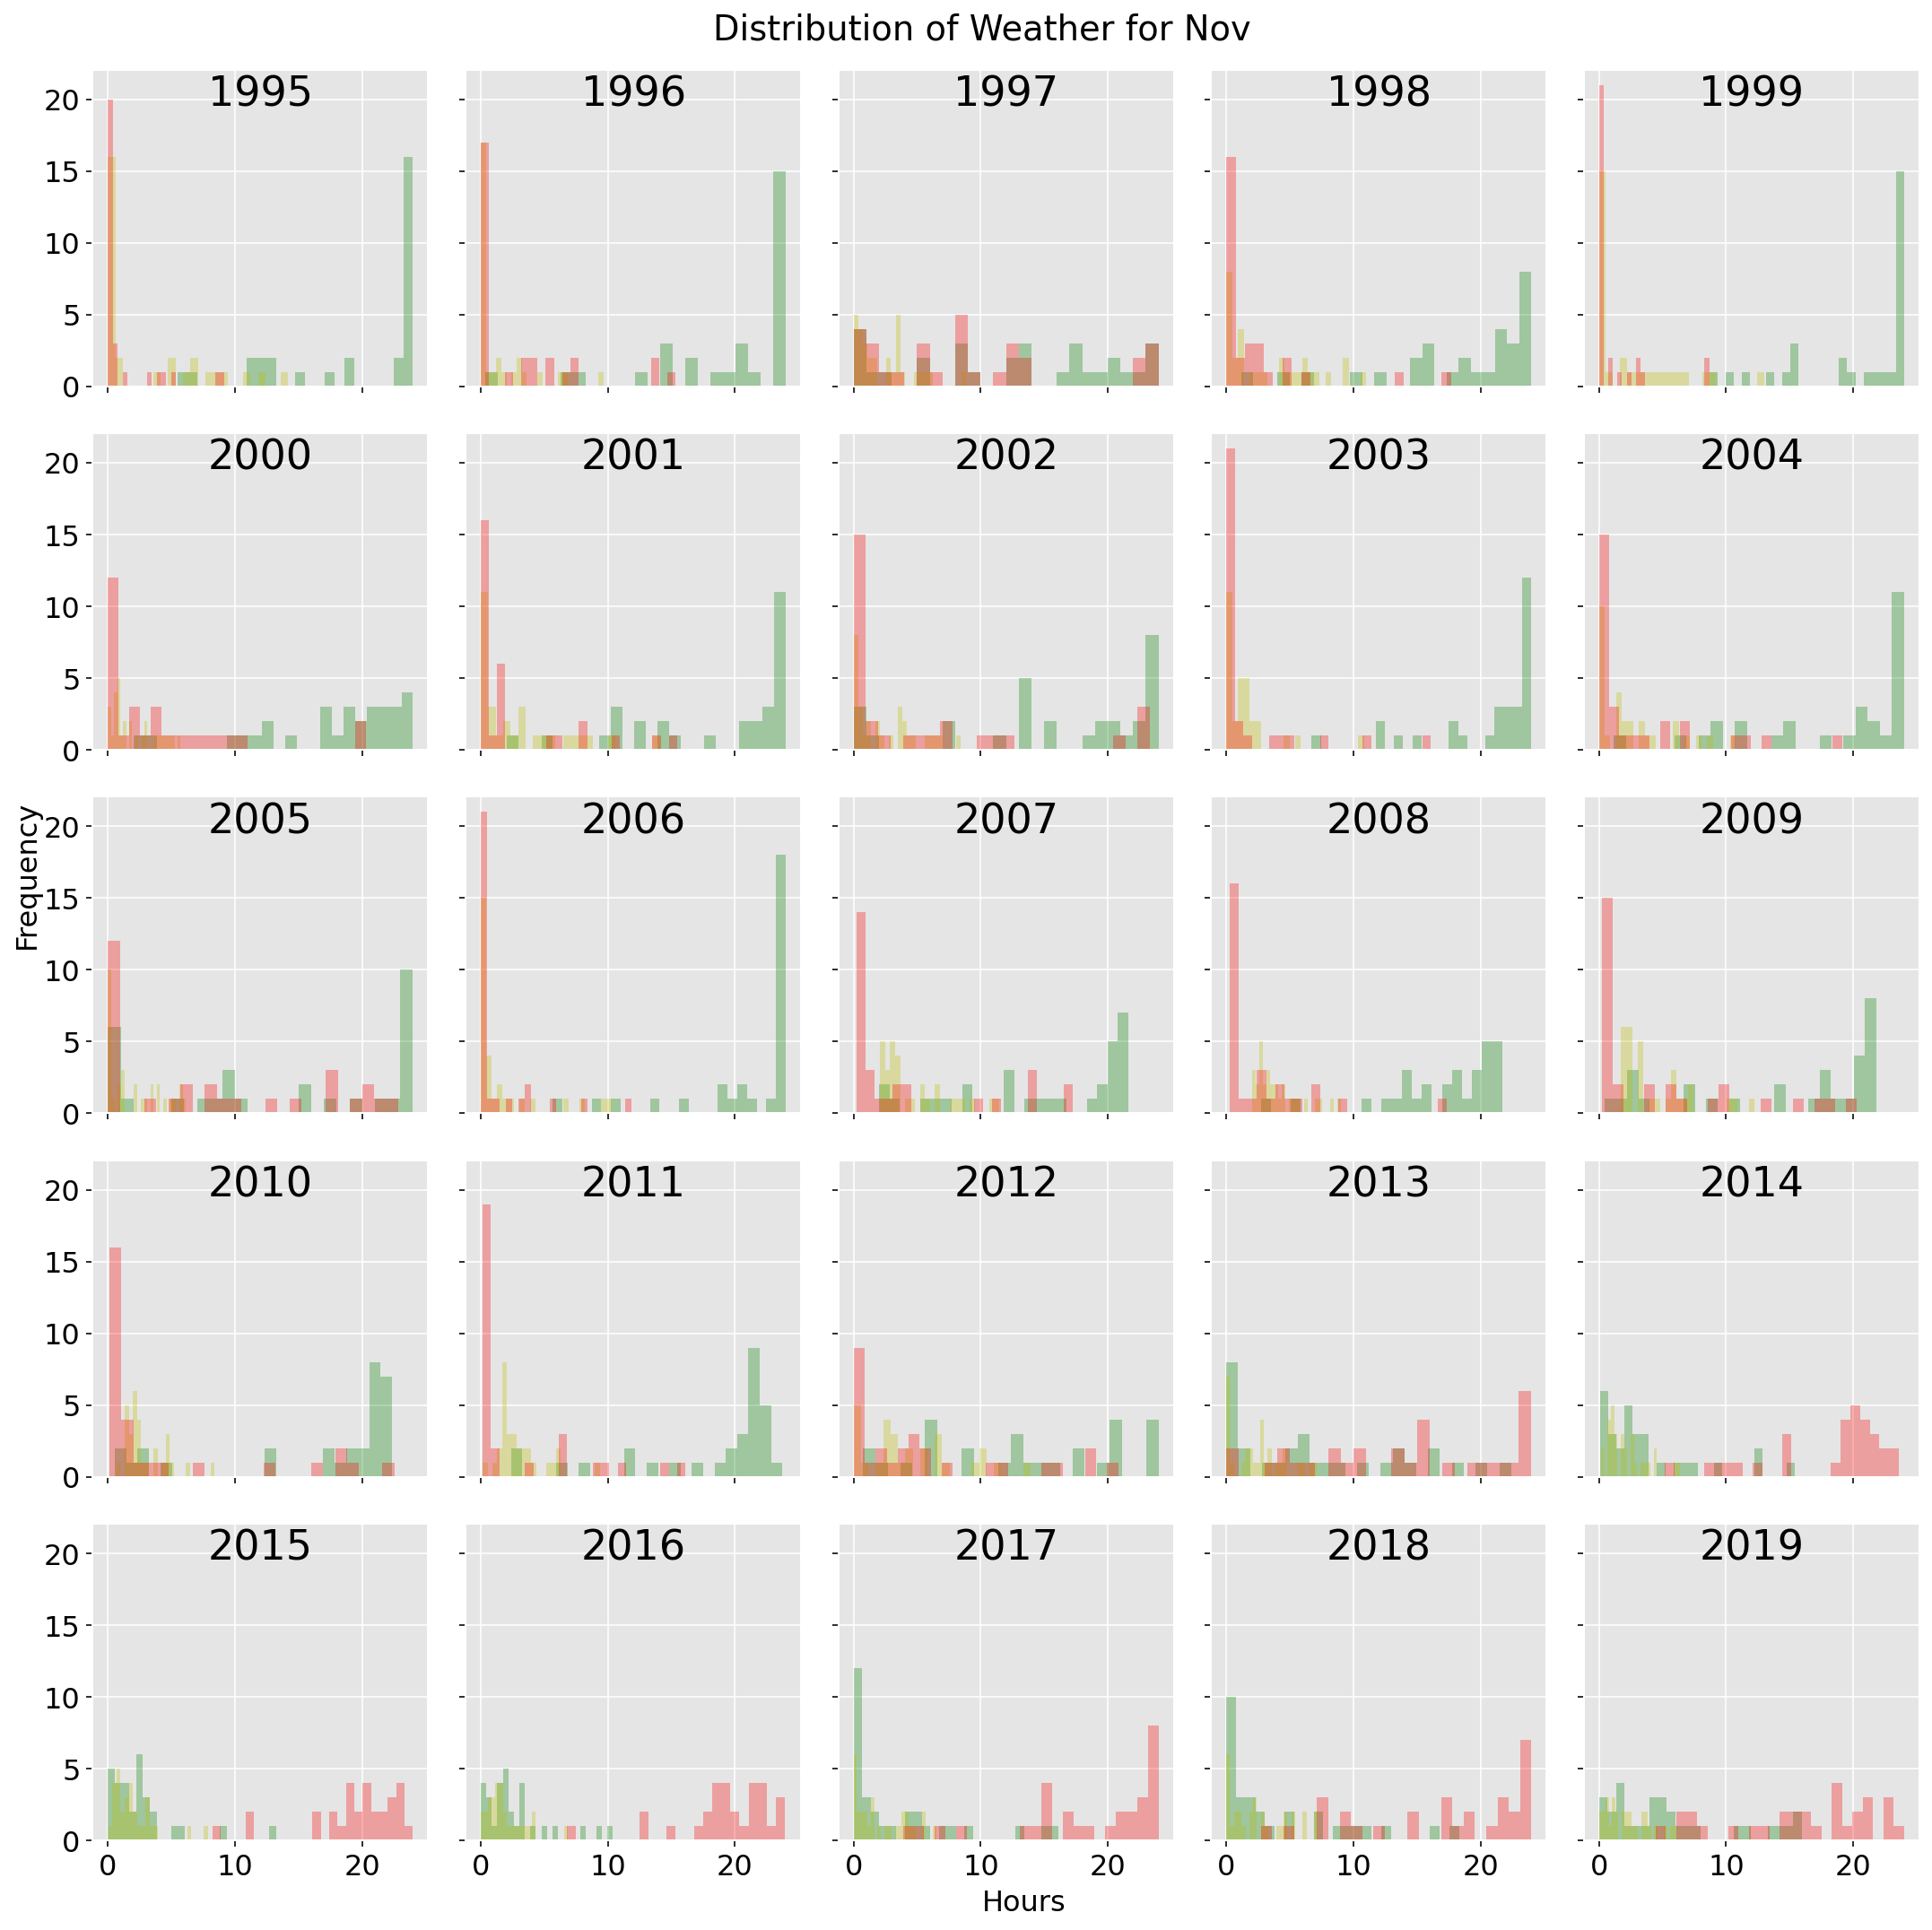

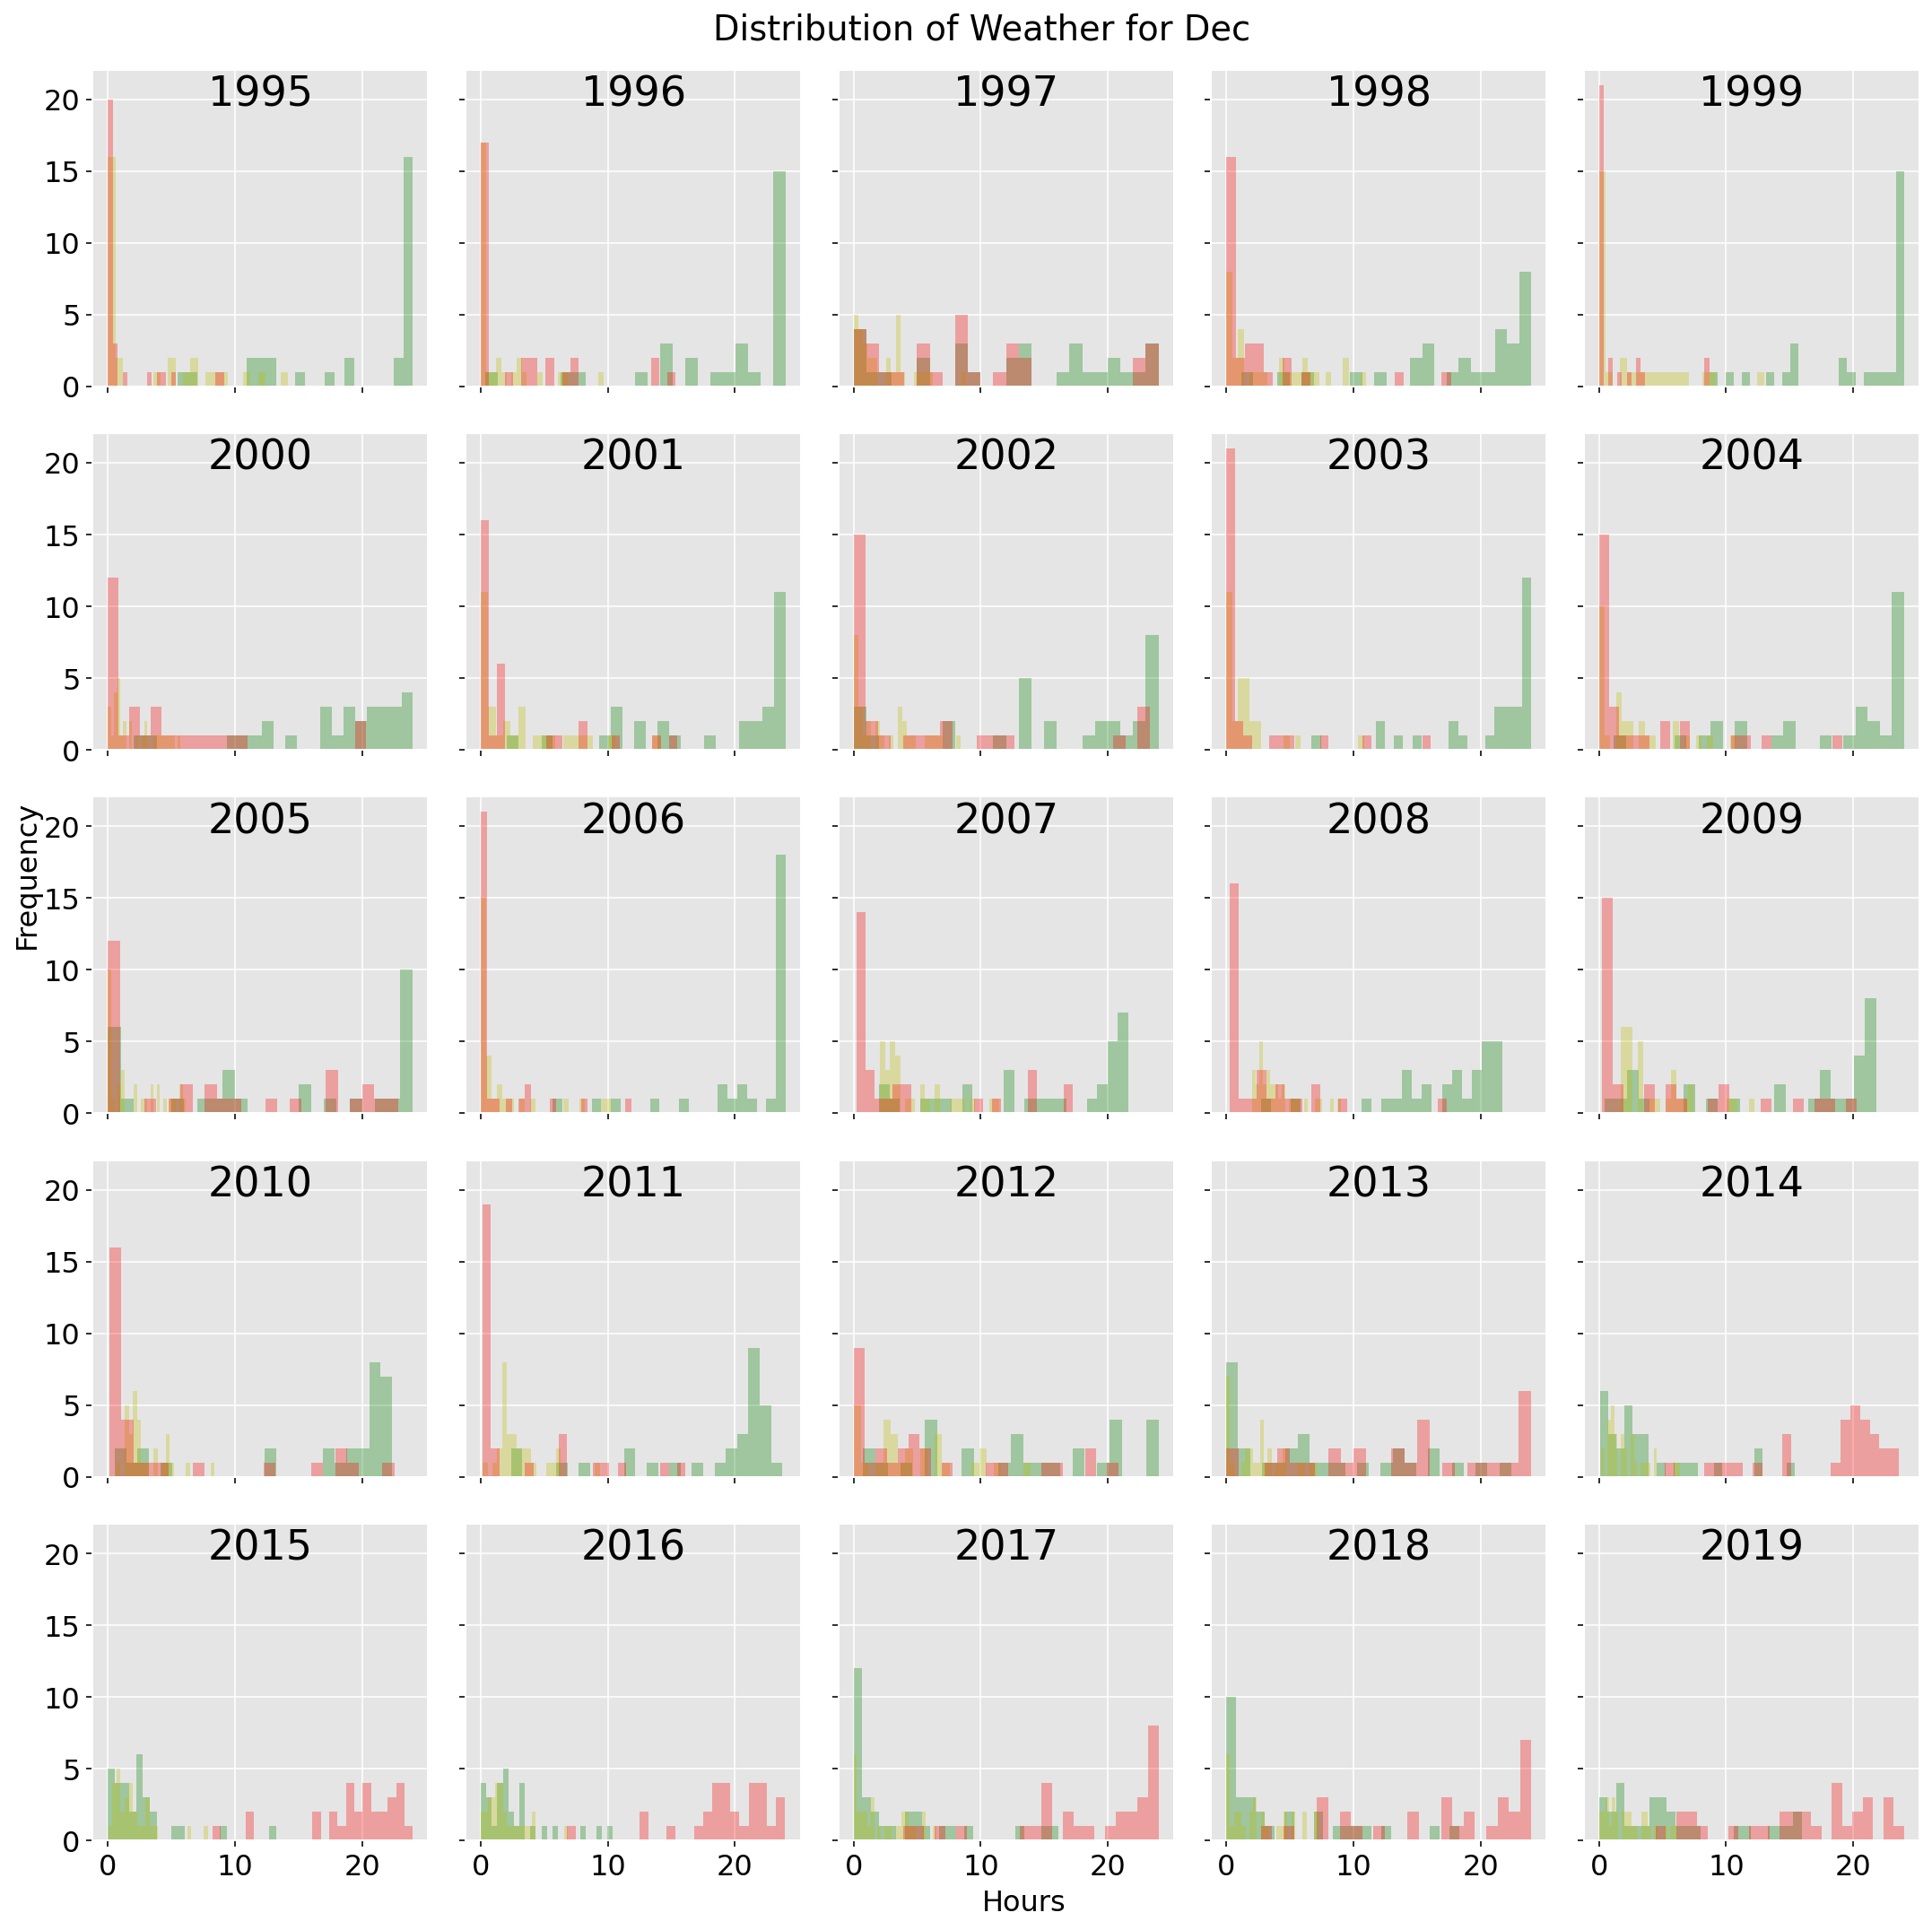

In [ ]:
for month in months:
    fig,axs = plt.subplots(5,5,figsize=(15,15),sharex=True,sharey=True)
    for i,ax in enumerate(axs.flatten()):
        df[(df['month']=='Jun') & (df['year']==yrs[i])].hist('Green',ax=ax,color='g',bins=24, alpha=0.3)
        df[(df['month']=='Jun') & (df['year']==yrs[i])].hist('Yellow',ax=ax,color='y',bins=24, alpha=0.3)
        df[(df['month']=='Jun') & (df['year']==yrs[i])].hist('Red',ax=ax,color='r',bins=24, alpha=0.3)
        ax.set_title(f'{yrs[i]}',y=1,pad=-20)
    fig.suptitle(f'Distribution of Weather for {month}')
    fig.text(.5,0,'Hours')
    fig.text(0,0.5,'Frequency',rotation='vertical')
    fig.tight_layout();

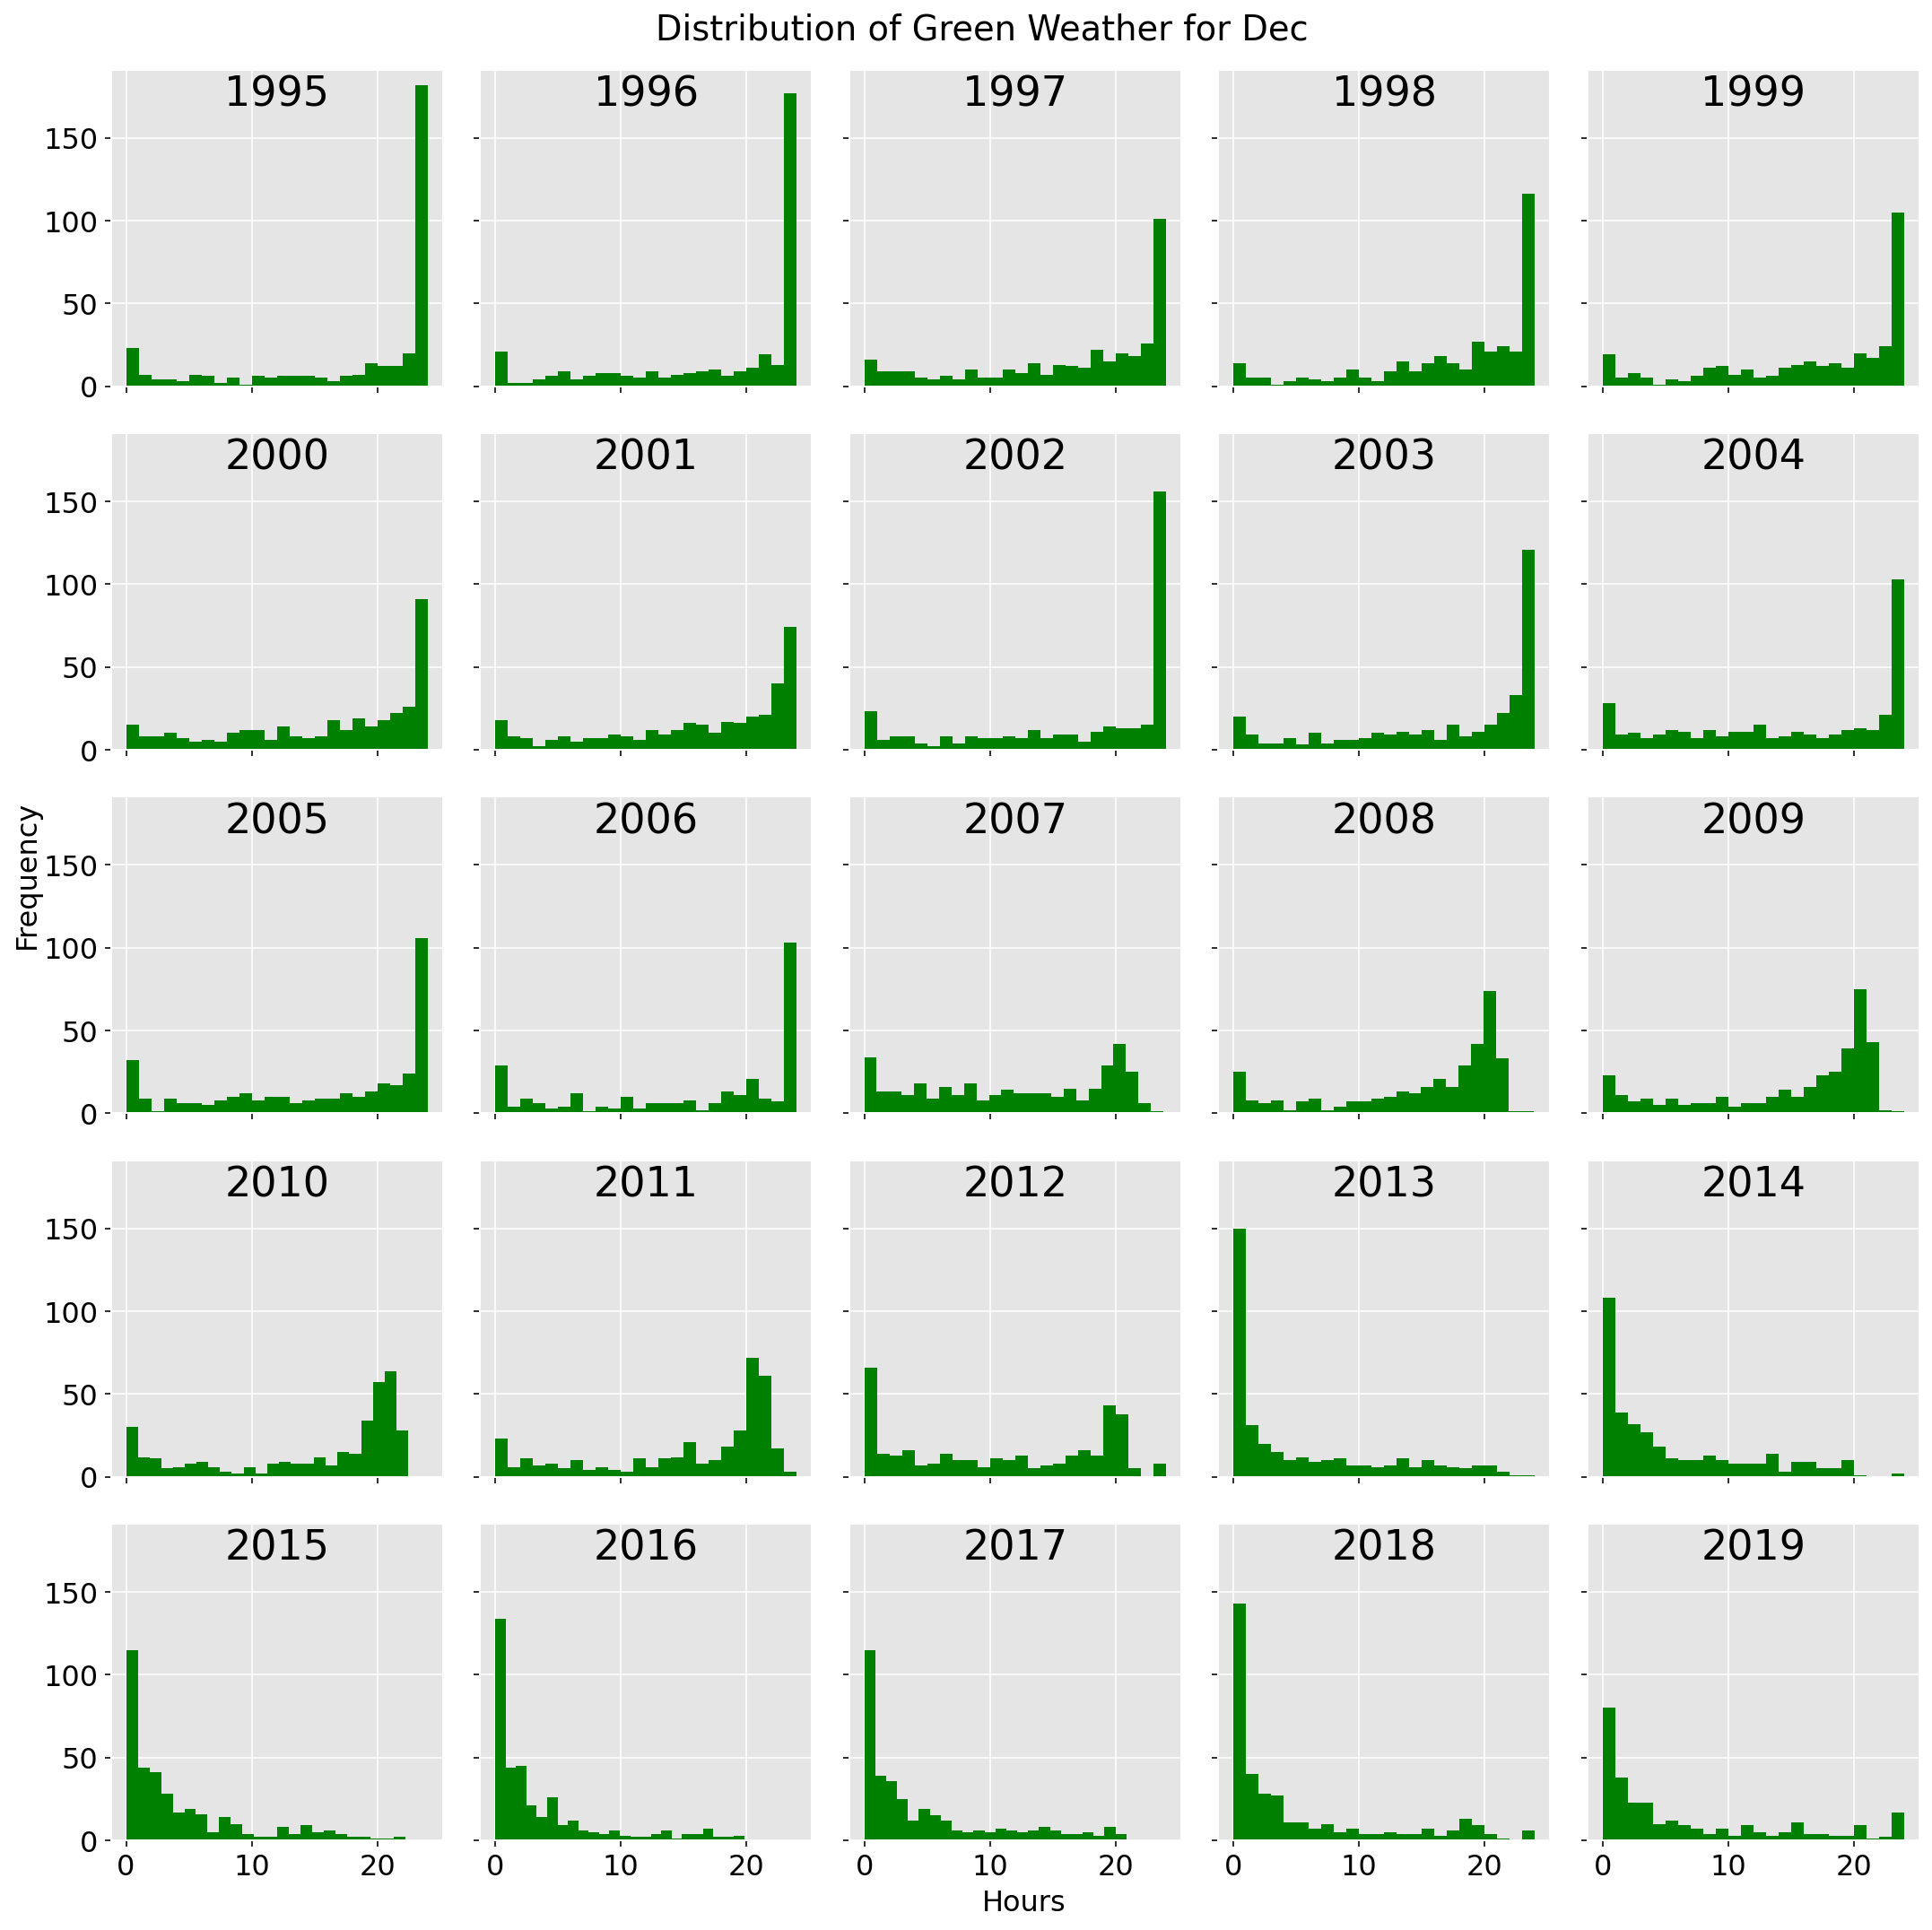

In [133]:
fig,axs = plt.subplots(5,5,figsize=(15,15),sharex=True,sharey=True)
for i,ax in enumerate(axs.flatten()):
    df[(df['year']==yrs[i])].hist('Green',ax=ax,color='g',bins=24, alpha=1)
    ax.set_title(f'{yrs[i]}',y=1,pad=-20)
fig.suptitle(f'Distribution of Green Weather for {month}')
fig.text(.5,0,'Hours')
fig.text(0,0.5,'Frequency',rotation='vertical')
fig.tight_layout();


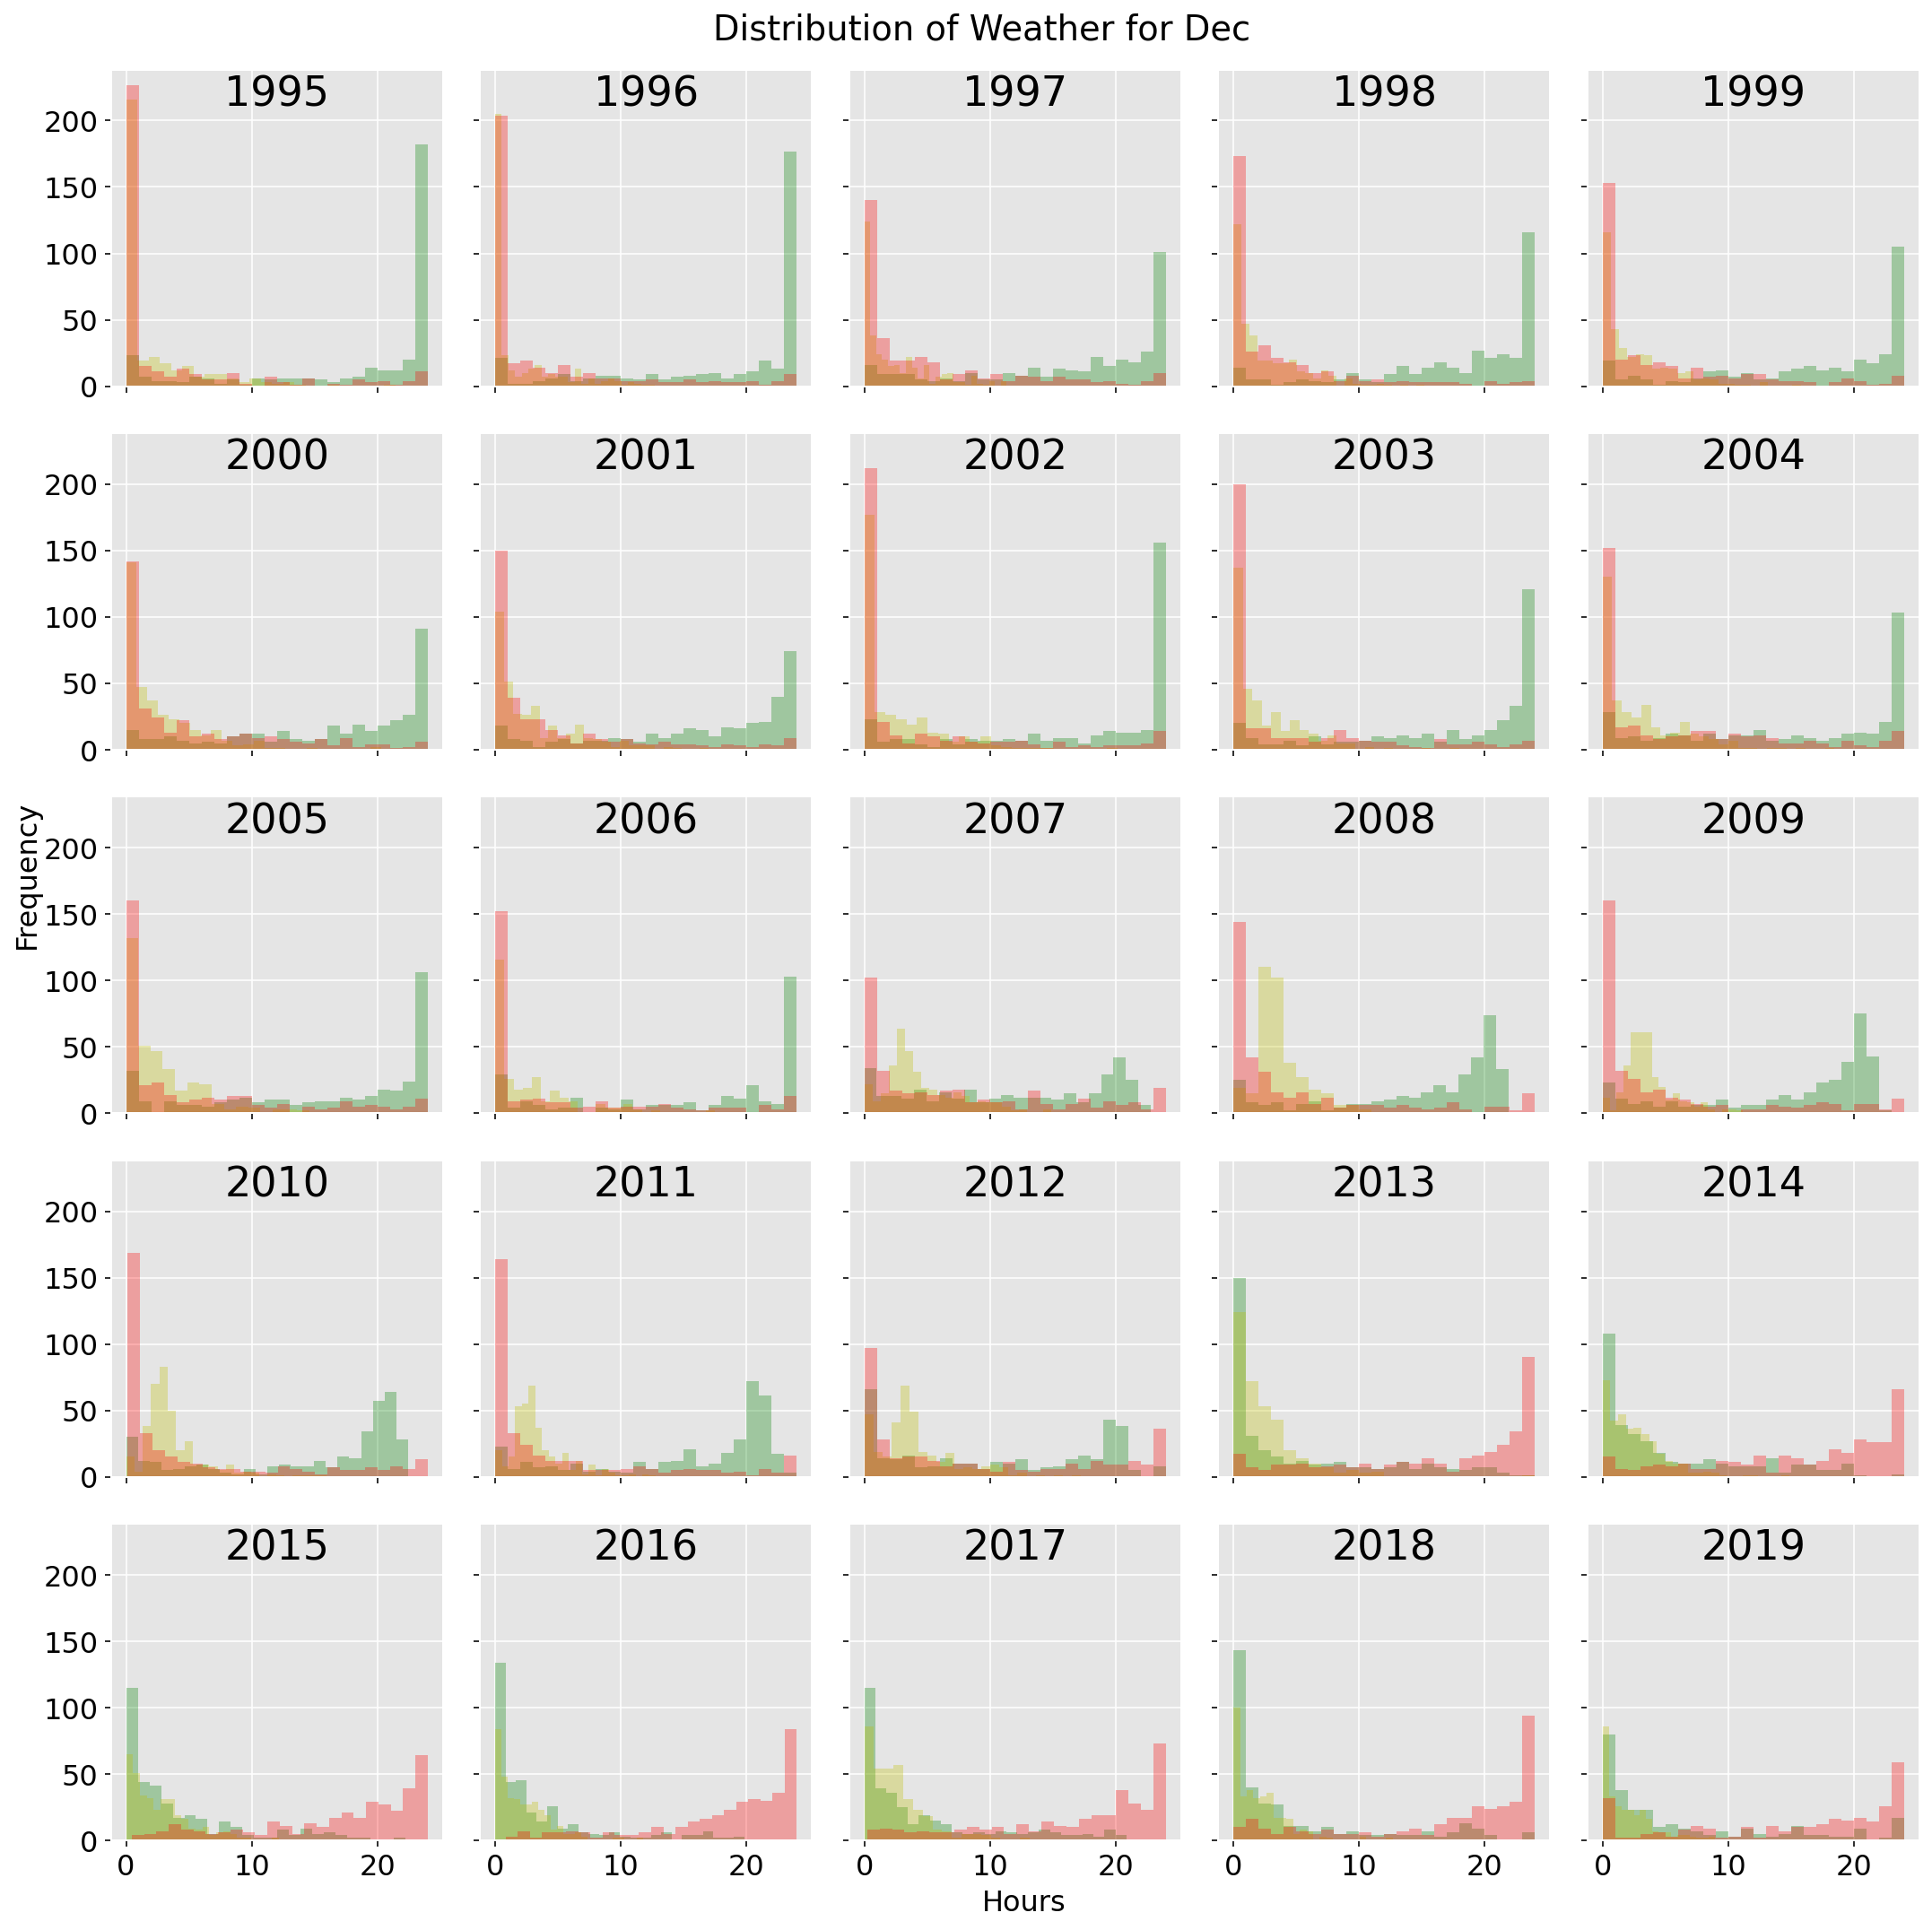

In [132]:
fig,axs = plt.subplots(5,5,figsize=(15,15),sharex=True,sharey=True)
for i,ax in enumerate(axs.flatten()):
    df[(df['year']==yrs[i])].hist('Green',ax=ax,color='g',bins=24, alpha=0.3)
    df[(df['year']==yrs[i])].hist('Yellow',ax=ax,color='y',bins=24, alpha=0.3)
    df[(df['year']==yrs[i])].hist('Red',ax=ax,color='r',bins=24, alpha=0.3)
    ax.set_title(f'{yrs[i]}',y=1,pad=-20)
fig.suptitle(f'Distribution of Weather for {month}')
fig.text(.5,0,'Hours')
fig.text(0,0.5,'Frequency',rotation='vertical')
fig.tight_layout();
